In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import operator
from utils import buildNetwork, load_cifar
#import urllib.request

In [2]:
# Let's start a Session
sess = tf.Session()

In [3]:
batch_size = 1
HEIGHT = 32
WIDTH = 32
CHANNELS = 3
NUM_CLASSES = 10

In [4]:
data_path = "data/CIFAR-10/"

train_samples, train_labels, val_samples, val_labels = load_cifar(data_path)

In [5]:
# TODO add placeholder for inputs
inputs = tf.placeholder(tf.float32,name='input',shape=[batch_size,WIDTH,HEIGHT,CHANNELS])

logits = buildNetwork(inputs, batch_size)

## Task: Restore the previously stored checkpoint

In [6]:
# TODO restore the saved checkpoints ./checkpoints/model.ckpt
saver = tf.train.Saver()
saver.restore(sess, "./checkpoints/model.ckpt")



INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt


## Task: Transform logits to probabilities

In [7]:
# TODO add an appropriate op to convert the logits into probabilities
probs = tf.nn.softmax(logits)

## Task:  Inference. Display results

[[ 0.00617359  0.00138411  0.0312091   0.48961058  0.02951463  0.34422135
   0.0260436   0.06015336  0.0039923   0.00769731]]
0.999999936554
[[  6.06978685e-02   1.37802595e-02   5.59126865e-03   2.09430279e-03
    2.05022190e-03   6.47759356e-04   1.35531998e-03   5.84634778e-04
    9.11093295e-01   2.10510264e-03]]
1.00000003271
[[ 0.24170035  0.00781307  0.05015537  0.01732004  0.06701592  0.00679083
   0.00406309  0.01210233  0.58045465  0.01258436]]
1.00000001024
[[ 0.55012774  0.02359006  0.05401831  0.00503849  0.01151506  0.00106987
   0.00538092  0.0010851   0.34382918  0.00434526]]
1.00000000186
[[  2.18384434e-04   1.15448318e-04   2.50826646e-02   8.62016436e-03
    1.25948964e-02   2.00825650e-03   9.50977087e-01   2.90922617e-04
    3.14432655e-05   6.07211805e-05]]
0.999999988628


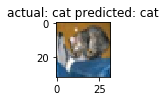

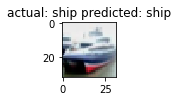

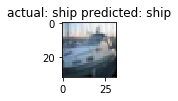

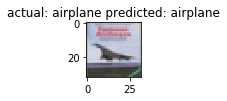

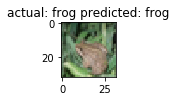

In [8]:
label_to_name = ['airplane', 'automobile', 'bird', 'cat', 'deer' , 'dog', 'frog', 'horse', 'ship', 'truck']

# TODO plot the first five *validation* images 
for index in range(5):
    feed_dict = {inputs: [val_samples[index]]}
    classification = sess.run(probs, feed_dict)
    print(classification)
    print(sum(classification[0]))
    idx = max(enumerate(classification[0]), key=operator.itemgetter(1))[0]
    plt.figure(figsize=(1,1))
    plt.title('actual: '+label_to_name[val_labels[index]]+' predicted: '+ label_to_name[idx])
    plt.imshow(val_samples[index])



In [9]:
# TODO for each image, print the predicted class and the probability vector for all classes

for index in range(val_samples.shape[0]):
    feed_dict = {inputs: [val_samples[index]]}
    classification = sess.run(probs, feed_dict)
    idx = max(enumerate(classification[0]), key=operator.itemgetter(1))[0]
    #plt.figure(figsize=(1,1))
    print('actual: '+label_to_name[val_labels[index]]+' predicted: '+ label_to_name[idx])
    for i in range(10):
        print (label_to_name[i]+': '+str(classification[0][i]))
    print('--------------')

actual: cat predicted: cat
airplane: 0.00617359
automobile: 0.00138411
bird: 0.0312091
cat: 0.489611
deer: 0.0295146
dog: 0.344221
frog: 0.0260436
horse: 0.0601534
ship: 0.0039923
truck: 0.00769731
--------------
actual: ship predicted: ship
airplane: 0.0606979
automobile: 0.0137803
bird: 0.00559127
cat: 0.0020943
deer: 0.00205022
dog: 0.000647759
frog: 0.00135532
horse: 0.000584635
ship: 0.911093
truck: 0.0021051
--------------
actual: ship predicted: ship
airplane: 0.2417
automobile: 0.00781307
bird: 0.0501554
cat: 0.01732
deer: 0.0670159
dog: 0.00679083
frog: 0.00406309
horse: 0.0121023
ship: 0.580455
truck: 0.0125844
--------------
actual: airplane predicted: airplane
airplane: 0.550128
automobile: 0.0235901
bird: 0.0540183
cat: 0.00503849
deer: 0.0115151
dog: 0.00106987
frog: 0.00538092
horse: 0.0010851
ship: 0.343829
truck: 0.00434526
--------------
actual: frog predicted: frog
airplane: 0.000218384
automobile: 0.000115448
bird: 0.0250827
cat: 0.00862016
deer: 0.0125949
dog: 0.00

actual: horse predicted: frog
airplane: 0.0165022
automobile: 0.0194251
bird: 0.0792764
cat: 0.242573
deer: 0.0609009
dog: 0.130463
frog: 0.262598
horse: 0.0317266
ship: 0.15001
truck: 0.00652462
--------------
actual: deer predicted: cat
airplane: 0.00852541
automobile: 0.00247253
bird: 0.0598496
cat: 0.446751
deer: 0.0556901
dog: 0.169004
frog: 0.209096
horse: 0.0240569
ship: 0.0198071
truck: 0.00474725
--------------
actual: frog predicted: cat
airplane: 0.0100009
automobile: 0.00148774
bird: 0.0474559
cat: 0.468172
deer: 0.0448958
dog: 0.318463
frog: 0.0712611
horse: 0.0282963
ship: 0.00669172
truck: 0.00327552
--------------
actual: horse predicted: horse
airplane: 0.000283897
automobile: 8.84913e-05
bird: 0.0118232
cat: 0.000545234
deer: 0.239464
dog: 0.00504339
frog: 0.000158676
horse: 0.742284
ship: 0.000191048
truck: 0.000117873
--------------
actual: cat predicted: cat
airplane: 0.00770106
automobile: 0.000954161
bird: 0.102759
cat: 0.397533
deer: 0.0318206
dog: 0.372866
frog

actual: bird predicted: bird
airplane: 0.00871615
automobile: 0.000578335
bird: 0.428375
cat: 0.16473
deer: 0.0423531
dog: 0.0672519
frog: 0.280229
horse: 0.00367941
ship: 0.00361169
truck: 0.000476584
--------------
actual: automobile predicted: automobile
airplane: 0.0136942
automobile: 0.86299
bird: 0.00263186
cat: 0.00273431
deer: 0.000400271
dog: 0.00138908
frog: 0.0031407
horse: 0.000642984
ship: 0.0150777
truck: 0.0972984
--------------
actual: cat predicted: cat
airplane: 0.0551104
automobile: 0.00498046
bird: 0.0895591
cat: 0.378429
deer: 0.0667337
dog: 0.203189
frog: 0.0160538
horse: 0.165027
ship: 0.00913391
truck: 0.0117839
--------------
actual: airplane predicted: airplane
airplane: 0.823781
automobile: 0.000492826
bird: 0.077603
cat: 0.00903238
deer: 0.0681429
dog: 0.00339648
frog: 0.0014096
horse: 0.00311617
ship: 0.0123153
truck: 0.000710557
--------------
actual: deer predicted: deer
airplane: 0.0152963
automobile: 0.000734906
bird: 0.0278411
cat: 0.112527
deer: 0.555

actual: truck predicted: truck
airplane: 0.012272
automobile: 0.0116712
bird: 0.000281997
cat: 0.0014823
deer: 0.00105047
dog: 0.000450422
frog: 0.000119729
horse: 0.00495256
ship: 0.00217271
truck: 0.965547
--------------
actual: truck predicted: truck
airplane: 0.00807433
automobile: 0.0135959
bird: 0.00035426
cat: 0.00281747
deer: 0.000443595
dog: 0.000627211
frog: 0.000202439
horse: 0.0011167
ship: 0.00217443
truck: 0.970594
--------------
actual: cat predicted: ship
airplane: 0.0106946
automobile: 0.00314675
bird: 0.0163085
cat: 0.258338
deer: 0.0230002
dog: 0.233386
frog: 0.0559935
horse: 0.0091648
ship: 0.376257
truck: 0.0137105
--------------
actual: horse predicted: horse
airplane: 0.0154568
automobile: 0.00387087
bird: 0.0943202
cat: 0.0637038
deer: 0.159188
dog: 0.106733
frog: 0.011329
horse: 0.520623
ship: 0.0157434
truck: 0.00903256
--------------
actual: dog predicted: dog
airplane: 0.000889834
automobile: 0.000261033
bird: 0.0143994
cat: 0.459003
deer: 0.0108402
dog: 0.4

actual: airplane predicted: airplane
airplane: 0.996413
automobile: 5.32908e-06
bird: 0.00337775
cat: 1.31481e-05
deer: 4.92984e-05
dog: 2.2367e-06
frog: 1.98487e-06
horse: 9.40496e-07
ship: 0.000131812
truck: 4.70757e-06
--------------
actual: deer predicted: deer
airplane: 0.000301322
automobile: 2.87054e-05
bird: 0.0257757
cat: 0.00533295
deer: 0.951508
dog: 0.00539796
frog: 0.00558028
horse: 0.00577451
ship: 0.000214284
truck: 8.62786e-05
--------------
actual: airplane predicted: deer
airplane: 0.172095
automobile: 0.0131552
bird: 0.0915414
cat: 0.0624719
deer: 0.315289
dog: 0.0328749
frog: 0.0119528
horse: 0.223523
ship: 0.0116277
truck: 0.0654693
--------------
actual: dog predicted: cat
airplane: 0.0416383
automobile: 0.00109742
bird: 0.0428753
cat: 0.478793
deer: 0.0205192
dog: 0.332983
frog: 0.0513218
horse: 0.0245165
ship: 0.00203439
truck: 0.00422078
--------------
actual: dog predicted: cat
airplane: 0.0803077
automobile: 0.000904372
bird: 0.322357
cat: 0.337518
deer: 0.04

cat: 0.000509337
deer: 0.000978272
dog: 9.598e-05
frog: 0.000138563
horse: 4.55968e-05
ship: 0.0275333
truck: 0.00015848
--------------
actual: airplane predicted: airplane
airplane: 0.87953
automobile: 3.42352e-05
bird: 0.1155
cat: 0.000105038
deer: 0.00193006
dog: 3.39264e-05
frog: 7.59711e-05
horse: 2.85475e-05
ship: 0.00272475
truck: 3.63396e-05
--------------
actual: frog predicted: frog
airplane: 0.000367833
automobile: 0.000429259
bird: 0.0184064
cat: 0.0201447
deer: 0.0119886
dog: 0.00557483
frog: 0.942195
horse: 0.000597616
ship: 9.80516e-05
truck: 0.000197788
--------------
actual: frog predicted: frog
airplane: 0.000496966
automobile: 0.000612017
bird: 0.0210457
cat: 0.0557497
deer: 0.0240636
dog: 0.0212491
frog: 0.873271
horse: 0.0030028
ship: 0.000135769
truck: 0.000373814
--------------
actual: frog predicted: frog
airplane: 0.000875144
automobile: 0.00038698
bird: 0.0325782
cat: 0.0840667
deer: 0.0487125
dog: 0.0272735
frog: 0.802351
horse: 0.00309058
ship: 0.000211693
t

actual: ship predicted: ship
airplane: 0.120763
automobile: 0.249207
bird: 0.0364698
cat: 0.016573
deer: 0.0105222
dog: 0.00570578
frog: 0.0164959
horse: 0.00621428
ship: 0.512226
truck: 0.0258227
--------------
actual: airplane predicted: airplane
airplane: 0.789477
automobile: 0.00106619
bird: 0.104536
cat: 0.0113415
deer: 0.0671041
dog: 0.00453706
frog: 0.00337898
horse: 0.00602507
ship: 0.0108169
truck: 0.00171781
--------------
actual: truck predicted: truck
airplane: 0.00598262
automobile: 0.0184323
bird: 0.00969134
cat: 0.0300771
deer: 0.00486881
dog: 0.0153069
frog: 0.00272015
horse: 0.0172866
ship: 0.0131899
truck: 0.882444
--------------
actual: dog predicted: dog
airplane: 0.000238168
automobile: 6.0511e-05
bird: 0.00614587
cat: 0.120843
deer: 0.0023264
dog: 0.854337
frog: 0.00155433
horse: 0.0140087
ship: 0.000258466
truck: 0.00022729
--------------
actual: ship predicted: ship
airplane: 0.0159423
automobile: 0.000741066
bird: 0.00132129
cat: 0.00205683
deer: 0.0012741
dog:

automobile: 0.00253189
bird: 0.515365
cat: 0.0864076
deer: 0.0814974
dog: 0.0819914
frog: 0.0317328
horse: 0.182494
ship: 0.00172128
truck: 0.00279235
--------------
actual: deer predicted: deer
airplane: 0.0067503
automobile: 0.000501636
bird: 0.0914294
cat: 0.107431
deer: 0.696992
dog: 0.0356677
frog: 0.0431214
horse: 0.0137636
ship: 0.00305649
truck: 0.00128715
--------------
actual: dog predicted: deer
airplane: 0.0179296
automobile: 0.000893105
bird: 0.161968
cat: 0.259624
deer: 0.293673
dog: 0.148648
frog: 0.039085
horse: 0.070865
ship: 0.00479655
truck: 0.00251721
--------------
actual: airplane predicted: airplane
airplane: 0.508095
automobile: 0.00559562
bird: 0.0292728
cat: 0.00439897
deer: 0.00598404
dog: 0.000960241
frog: 0.00195094
horse: 0.000569749
ship: 0.440301
truck: 0.00287138
--------------
actual: airplane predicted: airplane
airplane: 0.669971
automobile: 0.00375813
bird: 0.12695
cat: 0.0606259
deer: 0.0440032
dog: 0.0349209
frog: 0.00501837
horse: 0.0370996
ship:

truck: 0.271446
--------------
actual: frog predicted: frog
airplane: 7.10621e-05
automobile: 0.000141345
bird: 0.00890747
cat: 0.00556222
deer: 0.00828375
dog: 0.00143771
frog: 0.97531
horse: 0.000221799
ship: 1.17938e-05
truck: 5.24219e-05
--------------
actual: ship predicted: ship
airplane: 0.0669877
automobile: 0.00110273
bird: 0.00404139
cat: 0.00227376
deer: 0.00294373
dog: 0.000638103
frog: 0.000635655
horse: 0.000270164
ship: 0.918375
truck: 0.00273217
--------------
actual: dog predicted: dog
airplane: 0.00431392
automobile: 0.00313172
bird: 0.0606053
cat: 0.287199
deer: 0.0144991
dog: 0.541749
frog: 0.0282935
horse: 0.0498204
ship: 0.00707005
truck: 0.00331845
--------------
actual: dog predicted: dog
airplane: 0.00155639
automobile: 0.000721937
bird: 0.00902429
cat: 0.406209
deer: 0.0124821
dog: 0.512163
frog: 0.0220484
horse: 0.0291465
ship: 0.00131173
truck: 0.00533645
--------------
actual: truck predicted: truck
airplane: 0.14815
automobile: 0.0105454
bird: 0.0397763
ca

actual: horse predicted: horse
airplane: 0.0228168
automobile: 0.00121111
bird: 0.0386391
cat: 0.12154
deer: 0.173129
dog: 0.201626
frog: 0.00716363
horse: 0.427047
ship: 0.00320416
truck: 0.0036227
--------------
actual: frog predicted: frog
airplane: 0.00228421
automobile: 0.00056188
bird: 0.0225931
cat: 0.040497
deer: 0.00364121
dog: 0.00436191
frog: 0.923466
horse: 0.00127806
ship: 8.73817e-05
truck: 0.00122904
--------------
actual: horse predicted: horse
airplane: 0.000538045
automobile: 0.000309623
bird: 0.00673918
cat: 0.00942744
deer: 0.0295666
dog: 0.0295893
frog: 0.00149635
horse: 0.921558
ship: 7.71387e-05
truck: 0.000698855
--------------
actual: dog predicted: dog
airplane: 0.00153818
automobile: 8.10267e-05
bird: 0.0676004
cat: 0.140742
deer: 0.0104531
dog: 0.750245
frog: 0.00723051
horse: 0.0214403
ship: 0.000536956
truck: 0.000131745
--------------
actual: truck predicted: truck
airplane: 0.0710854
automobile: 0.00977473
bird: 0.0126402
cat: 0.0272926
deer: 0.0892802
d

dog: 0.00611316
frog: 0.00712136
horse: 0.0019586
ship: 0.00417878
truck: 0.000416752
--------------
actual: automobile predicted: automobile
airplane: 0.00221434
automobile: 0.973332
bird: 0.000123879
cat: 0.000201612
deer: 1.84435e-05
dog: 6.24664e-05
frog: 0.000236762
horse: 2.28299e-05
ship: 0.0133901
truck: 0.010397
--------------
actual: frog predicted: frog
airplane: 0.000370587
automobile: 0.00105945
bird: 0.00928539
cat: 0.0400391
deer: 0.00822529
dog: 0.0140509
frog: 0.925307
horse: 0.000932789
ship: 0.00044225
truck: 0.000286982
--------------
actual: deer predicted: deer
airplane: 0.0709051
automobile: 0.0031778
bird: 0.0748936
cat: 0.257185
deer: 0.337056
dog: 0.0853896
frog: 0.0861878
horse: 0.0683541
ship: 0.0094066
truck: 0.00744493
--------------
actual: cat predicted: deer
airplane: 0.133551
automobile: 0.00121032
bird: 0.207908
cat: 0.193215
deer: 0.23055
dog: 0.132659
frog: 0.0171185
horse: 0.0765858
ship: 0.00463144
truck: 0.00257047
--------------
actual: cat pred

dog: 0.292964
frog: 0.0134956
horse: 0.102775
ship: 0.00496069
truck: 0.0309297
--------------
actual: ship predicted: airplane
airplane: 0.64148
automobile: 0.00622718
bird: 0.0737617
cat: 0.0122698
deer: 0.0155302
dog: 0.00352444
frog: 0.0042602
horse: 0.00241098
ship: 0.235523
truck: 0.00501265
--------------
actual: truck predicted: truck
airplane: 0.00375508
automobile: 0.086251
bird: 0.000242525
cat: 0.00150858
deer: 0.00020436
dog: 0.00122528
frog: 0.0001306
horse: 0.00292999
ship: 0.00110669
truck: 0.902646
--------------
actual: airplane predicted: airplane
airplane: 0.914635
automobile: 0.00414698
bird: 0.0047079
cat: 0.000530373
deer: 0.00371001
dog: 0.000101883
frog: 0.000103732
horse: 0.000294472
ship: 0.064308
truck: 0.00746176
--------------
actual: automobile predicted: ship
airplane: 0.0238132
automobile: 0.223698
bird: 0.00453595
cat: 0.0244517
deer: 0.0059179
dog: 0.00760092
frog: 0.0112033
horse: 0.00380278
ship: 0.433264
truck: 0.261712
--------------
actual: cat p

deer: 0.0694471
dog: 0.0213439
frog: 0.0203361
horse: 0.0169012
ship: 0.118489
truck: 0.056573
--------------
actual: automobile predicted: automobile
airplane: 0.0182712
automobile: 0.580538
bird: 0.00692099
cat: 0.00839839
deer: 0.00279874
dog: 0.0054442
frog: 0.00398782
horse: 0.00703103
ship: 0.0194273
truck: 0.347183
--------------
actual: cat predicted: dog
airplane: 0.0283438
automobile: 0.00453076
bird: 0.140347
cat: 0.33347
deer: 0.0273916
dog: 0.349748
frog: 0.0567681
horse: 0.040243
ship: 0.0157203
truck: 0.00343791
--------------
actual: frog predicted: frog
airplane: 0.00671514
automobile: 0.000922566
bird: 0.103711
cat: 0.0832141
deer: 0.34704
dog: 0.0224883
frog: 0.423765
horse: 0.0070341
ship: 0.00277717
truck: 0.00233293
--------------
actual: dog predicted: cat
airplane: 0.00605534
automobile: 0.00125052
bird: 0.0231061
cat: 0.529581
deer: 0.0178362
dog: 0.356903
frog: 0.0175249
horse: 0.0311426
ship: 0.00622576
truck: 0.0103738
--------------
actual: deer predicted: 

ship: 0.00849853
truck: 0.00410159
--------------
actual: truck predicted: ship
airplane: 0.309006
automobile: 0.0437515
bird: 0.00578652
cat: 0.0103236
deer: 0.0155529
dog: 0.00276192
frog: 0.000864876
horse: 0.00864319
ship: 0.315221
truck: 0.288089
--------------
actual: frog predicted: bird
airplane: 0.0240348
automobile: 0.00531331
bird: 0.424758
cat: 0.118811
deer: 0.165166
dog: 0.128301
frog: 0.0825144
horse: 0.0395328
ship: 0.00519331
truck: 0.00637554
--------------
actual: ship predicted: ship
airplane: 0.0827835
automobile: 0.0032634
bird: 0.00935114
cat: 0.00202606
deer: 0.00201472
dog: 0.000586561
frog: 0.00117773
horse: 0.000401534
ship: 0.896146
truck: 0.00224926
--------------
actual: cat predicted: airplane
airplane: 0.65172
automobile: 0.00153211
bird: 0.236907
cat: 0.0230857
deer: 0.0398908
dog: 0.00698013
frog: 0.00759339
horse: 0.005698
ship: 0.0242091
truck: 0.00238434
--------------
actual: airplane predicted: airplane
airplane: 0.776852
automobile: 0.00342914
bi

frog: 0.000271356
horse: 0.0144072
ship: 0.00252546
truck: 0.0178834
--------------
actual: bird predicted: bird
airplane: 0.0316197
automobile: 0.0126276
bird: 0.413189
cat: 0.0647713
deer: 0.0464123
dog: 0.0168578
frog: 0.387983
horse: 0.00592331
ship: 0.016009
truck: 0.00460658
--------------
actual: deer predicted: deer
airplane: 0.000759741
automobile: 6.24486e-05
bird: 0.0559966
cat: 0.0146024
deer: 0.886601
dog: 0.0134809
frog: 0.0210938
horse: 0.00690846
ship: 0.000352389
truck: 0.000142233
--------------
actual: horse predicted: dog
airplane: 0.00326675
automobile: 0.000565021
bird: 0.0256787
cat: 0.38812
deer: 0.0318927
dog: 0.473004
frog: 0.0331374
horse: 0.0414106
ship: 0.00163207
truck: 0.00129286
--------------
actual: truck predicted: automobile
airplane: 0.05265
automobile: 0.41176
bird: 0.0263004
cat: 0.0584627
deer: 0.00783316
dog: 0.0369226
frog: 0.0130553
horse: 0.020997
ship: 0.0780847
truck: 0.293934
--------------
actual: ship predicted: ship
airplane: 0.246768
a

airplane: 0.00242981
automobile: 0.000629105
bird: 0.0686902
cat: 0.060758
deer: 0.123272
dog: 0.0153088
frog: 0.725676
horse: 0.00152569
ship: 0.00116502
truck: 0.000544853
--------------
actual: ship predicted: ship
airplane: 0.0193474
automobile: 0.000388815
bird: 0.00305483
cat: 0.00263125
deer: 0.00439468
dog: 0.00119729
frog: 0.000463612
horse: 0.000631271
ship: 0.966198
truck: 0.00169257
--------------
actual: ship predicted: ship
airplane: 0.0242529
automobile: 0.0161405
bird: 0.00887535
cat: 0.00577501
deer: 0.00315745
dog: 0.00261162
frog: 0.00389165
horse: 0.00221971
ship: 0.928188
truck: 0.00488781
--------------
actual: dog predicted: dog
airplane: 0.012014
automobile: 0.00065222
bird: 0.0907636
cat: 0.26462
deer: 0.249912
dog: 0.267248
frog: 0.0266416
horse: 0.0824746
ship: 0.00370042
truck: 0.00197384
--------------
actual: cat predicted: cat
airplane: 0.000914622
automobile: 0.00010871
bird: 0.0161589
cat: 0.572354
deer: 0.0157545
dog: 0.342558
frog: 0.0425559
horse: 0.

actual: truck predicted: truck
airplane: 0.115697
automobile: 0.0163035
bird: 0.011241
cat: 0.0242055
deer: 0.0178557
dog: 0.00608345
frog: 0.0020368
horse: 0.0215009
ship: 0.047121
truck: 0.737956
--------------
actual: truck predicted: truck
airplane: 0.00504122
automobile: 0.0345014
bird: 0.0106172
cat: 0.00750933
deer: 0.00131795
dog: 0.00497749
frog: 0.00150907
horse: 0.00740323
ship: 0.00330513
truck: 0.923818
--------------
actual: deer predicted: deer
airplane: 0.0025433
automobile: 0.000734038
bird: 0.0577294
cat: 0.0233338
deer: 0.757649
dog: 0.0285631
frog: 0.0170954
horse: 0.110486
ship: 0.000938677
truck: 0.000926724
--------------
actual: bird predicted: frog
airplane: 0.00264004
automobile: 0.000726717
bird: 0.176244
cat: 0.0857474
deer: 0.137225
dog: 0.0501136
frog: 0.539289
horse: 0.00724843
ship: 0.000429867
truck: 0.000336691
--------------
actual: automobile predicted: automobile
airplane: 0.0145985
automobile: 0.929427
bird: 0.00119749
cat: 0.00129094
deer: 0.00030

dog: 0.00136704
frog: 0.000664219
horse: 0.0103235
ship: 0.0552952
truck: 0.0131988
--------------
actual: frog predicted: frog
airplane: 0.000892287
automobile: 0.00075181
bird: 0.0336481
cat: 0.0251791
deer: 0.0124672
dog: 0.00625441
frog: 0.919023
horse: 0.00125333
ship: 0.000177905
truck: 0.00035322
--------------
actual: frog predicted: frog
airplane: 5.46694e-05
automobile: 8.29193e-05
bird: 0.00929553
cat: 0.00379929
deer: 0.00563355
dog: 0.000911214
frog: 0.980013
horse: 0.000174949
ship: 6.51443e-06
truck: 2.82831e-05
--------------
actual: cat predicted: dog
airplane: 0.000400962
automobile: 0.000326832
bird: 0.00575171
cat: 0.448827
deer: 0.00279725
dog: 0.501655
frog: 0.0333167
horse: 0.00590251
ship: 0.000273526
truck: 0.000748554
--------------
actual: cat predicted: cat
airplane: 0.0244502
automobile: 0.00162713
bird: 0.0117284
cat: 0.422872
deer: 0.00812555
dog: 0.421304
frog: 0.00460859
horse: 0.0191337
ship: 0.0531952
truck: 0.0329548
--------------
actual: frog predi

cat: 0.0144073
deer: 0.00357011
dog: 0.00264065
frog: 0.972954
horse: 0.000162196
ship: 2.03502e-05
truck: 8.17964e-05
--------------
actual: airplane predicted: ship
airplane: 0.277587
automobile: 0.000869341
bird: 0.005665
cat: 0.000664433
deer: 0.00395555
dog: 0.000144807
frog: 0.00018457
horse: 0.000123841
ship: 0.709187
truck: 0.00161826
--------------
actual: ship predicted: ship
airplane: 0.0245425
automobile: 0.000538107
bird: 0.00118748
cat: 0.000536437
deer: 0.000978314
dog: 0.000213064
frog: 0.000126036
horse: 0.000149427
ship: 0.971077
truck: 0.000651154
--------------
actual: frog predicted: cat
airplane: 0.0100143
automobile: 0.0030574
bird: 0.0500418
cat: 0.487427
deer: 0.0549918
dog: 0.13091
frog: 0.225361
horse: 0.0283932
ship: 0.00489822
truck: 0.00490538
--------------
actual: airplane predicted: airplane
airplane: 0.563402
automobile: 0.00446192
bird: 0.0926171
cat: 0.0345787
deer: 0.0708461
dog: 0.0109269
frog: 0.0182723
horse: 0.00499655
ship: 0.193866
truck: 0.00

actual: airplane predicted: airplane
airplane: 0.86537
automobile: 0.00835972
bird: 0.0158954
cat: 0.00878952
deer: 0.0177562
dog: 0.0026904
frog: 0.0011622
horse: 0.00496284
ship: 0.0639062
truck: 0.0111076
--------------
actual: ship predicted: ship
airplane: 0.010175
automobile: 0.00111322
bird: 0.0023673
cat: 0.0051341
deer: 0.00437411
dog: 0.00201171
frog: 0.00111585
horse: 0.000864626
ship: 0.966325
truck: 0.00651899
--------------
actual: frog predicted: frog
airplane: 0.000906971
automobile: 0.000338026
bird: 0.085234
cat: 0.0131626
deer: 0.0300831
dog: 0.00405182
frog: 0.865447
horse: 0.000542062
ship: 0.000123255
truck: 0.00011079
--------------
actual: truck predicted: truck
airplane: 0.0201096
automobile: 0.239929
bird: 0.00308233
cat: 0.0173198
deer: 0.00150566
dog: 0.00950759
frog: 0.00207465
horse: 0.00480878
ship: 0.0962126
truck: 0.60545
--------------
actual: automobile predicted: ship
airplane: 0.168131
automobile: 0.27049
bird: 0.0842595
cat: 0.0762374
deer: 0.01252

actual: ship predicted: ship
airplane: 0.21926
automobile: 0.00968518
bird: 0.0115148
cat: 0.00126454
deer: 0.00263995
dog: 0.000295677
frog: 0.000970678
horse: 0.000284693
ship: 0.752386
truck: 0.00169814
--------------
actual: dog predicted: dog
airplane: 0.00126543
automobile: 0.00310592
bird: 0.0186206
cat: 0.197372
deer: 0.00231142
dog: 0.733812
frog: 0.0167502
horse: 0.0218244
ship: 0.00342024
truck: 0.00151741
--------------
actual: horse predicted: horse
airplane: 0.000703594
automobile: 0.000217535
bird: 0.011628
cat: 0.00353623
deer: 0.0596068
dog: 0.0304386
frog: 0.00033605
horse: 0.892876
ship: 0.00023175
truck: 0.000425044
--------------
actual: ship predicted: ship
airplane: 0.0698373
automobile: 0.0717127
bird: 0.0200871
cat: 0.00650865
deer: 0.00355347
dog: 0.00201478
frog: 0.00797555
horse: 0.00149685
ship: 0.809291
truck: 0.00752291
--------------
actual: deer predicted: cat
airplane: 0.163403
automobile: 0.00352889
bird: 0.240195
cat: 0.261195
deer: 0.0779677
dog: 0.

--------------
actual: cat predicted: dog
airplane: 0.00180868
automobile: 0.000184205
bird: 0.0489488
cat: 0.434246
deer: 0.0247533
dog: 0.44589
frog: 0.0255366
horse: 0.0162233
ship: 0.00162256
truck: 0.000786087
--------------
actual: cat predicted: cat
airplane: 0.0164069
automobile: 0.000881824
bird: 0.0860903
cat: 0.459737
deer: 0.119394
dog: 0.223019
frog: 0.0165227
horse: 0.0617175
ship: 0.0116598
truck: 0.004571
--------------
actual: dog predicted: cat
airplane: 0.0094452
automobile: 0.0237655
bird: 0.0613685
cat: 0.386095
deer: 0.0117914
dog: 0.377815
frog: 0.0772793
horse: 0.038533
ship: 0.00457558
truck: 0.00933188
--------------
actual: bird predicted: cat
airplane: 0.0174749
automobile: 0.00156528
bird: 0.298953
cat: 0.320402
deer: 0.114631
dog: 0.122707
frog: 0.0608357
horse: 0.0542652
ship: 0.00615349
truck: 0.00301264
--------------
actual: bird predicted: bird
airplane: 0.12939
automobile: 0.00312201
bird: 0.763821
cat: 0.0210601
deer: 0.0310115
dog: 0.0156355
frog: 

automobile: 0.57143
bird: 0.0086562
cat: 0.00622344
deer: 0.00788889
dog: 0.001819
frog: 0.00313137
horse: 0.00535452
ship: 0.0477999
truck: 0.192923
--------------
actual: deer predicted: deer
airplane: 0.00110129
automobile: 0.000336953
bird: 0.0694467
cat: 0.0535819
deer: 0.57666
dog: 0.0437246
frog: 0.222394
horse: 0.0318588
ship: 0.000269322
truck: 0.000626462
--------------
actual: dog predicted: bird
airplane: 0.00515818
automobile: 0.000234283
bird: 0.410602
cat: 0.17088
deer: 0.122063
dog: 0.23788
frog: 0.0385355
horse: 0.012139
ship: 0.00207492
truck: 0.000433418
--------------
actual: frog predicted: frog
airplane: 0.000382196
automobile: 0.000383869
bird: 0.00706245
cat: 0.050119
deer: 0.00788592
dog: 0.00806134
frog: 0.92525
horse: 0.000427878
ship: 0.000187157
truck: 0.000239751
--------------
actual: dog predicted: dog
airplane: 0.00152613
automobile: 0.0010263
bird: 0.0261405
cat: 0.407141
deer: 0.0163891
dog: 0.438567
frog: 0.0616249
horse: 0.0447571
ship: 0.000674129


actual: automobile predicted: automobile
airplane: 0.00525488
automobile: 0.972754
bird: 0.000440196
cat: 0.000297768
deer: 0.00012659
dog: 8.81643e-05
frog: 0.00040404
horse: 0.000122595
ship: 0.00515545
truck: 0.0153559
--------------
actual: airplane predicted: airplane
airplane: 0.953888
automobile: 9.27987e-05
bird: 0.0361441
cat: 0.00039013
deer: 0.00261544
dog: 9.29527e-05
frog: 0.000165652
horse: 5.41301e-05
ship: 0.00649272
truck: 6.43086e-05
--------------
actual: horse predicted: bird
airplane: 0.151668
automobile: 0.00451223
bird: 0.369605
cat: 0.0721535
deer: 0.199202
dog: 0.0338677
frog: 0.0180228
horse: 0.052164
ship: 0.0896718
truck: 0.00913365
--------------
actual: bird predicted: airplane
airplane: 0.807946
automobile: 0.000177078
bird: 0.160616
cat: 0.00318987
deer: 0.0181489
dog: 0.00118904
frog: 0.000881121
horse: 0.000654782
ship: 0.00692499
truck: 0.000272805
--------------
actual: dog predicted: cat
airplane: 0.0121838
automobile: 0.000619333
bird: 0.136412
cat

ship: 0.00146762
truck: 0.00105487
--------------
actual: airplane predicted: airplane
airplane: 0.783624
automobile: 0.00521375
bird: 0.0912783
cat: 0.00904796
deer: 0.0300031
dog: 0.00253084
frog: 0.00430346
horse: 0.00322238
ship: 0.0665472
truck: 0.00422883
--------------
actual: ship predicted: ship
airplane: 0.0409813
automobile: 0.00133336
bird: 0.00238967
cat: 0.000715026
deer: 0.00123078
dog: 0.000187414
frog: 0.000366994
horse: 9.58495e-05
ship: 0.951203
truck: 0.00149654
--------------
actual: deer predicted: deer
airplane: 0.0106733
automobile: 0.000568521
bird: 0.11289
cat: 0.0195363
deer: 0.762457
dog: 0.0186
frog: 0.00426195
horse: 0.029211
ship: 0.0397033
truck: 0.00209807
--------------
actual: frog predicted: frog
airplane: 6.20084e-05
automobile: 0.000123363
bird: 0.00723667
cat: 0.00338625
deer: 0.0039884
dog: 0.000648851
frog: 0.984348
horse: 0.000146668
ship: 9.18784e-06
truck: 5.06369e-05
--------------
actual: bird predicted: bird
airplane: 0.0073961
automobile:

--------------
actual: bird predicted: ship
airplane: 0.140237
automobile: 0.0104946
bird: 0.0259487
cat: 0.019047
deer: 0.047217
dog: 0.0054293
frog: 0.00185667
horse: 0.0281133
ship: 0.500027
truck: 0.22163
--------------
actual: ship predicted: ship
airplane: 0.0232815
automobile: 0.000354532
bird: 0.0011015
cat: 0.00110185
deer: 0.0010731
dog: 0.000352328
frog: 0.000110127
horse: 0.000162579
ship: 0.969638
truck: 0.00282412
--------------
actual: automobile predicted: ship
airplane: 0.268614
automobile: 0.230171
bird: 0.0648368
cat: 0.0107351
deer: 0.020713
dog: 0.00354131
frog: 0.0151777
horse: 0.00740806
ship: 0.359745
truck: 0.0190575
--------------
actual: ship predicted: ship
airplane: 0.040084
automobile: 0.000991076
bird: 0.0135452
cat: 0.0114764
deer: 0.170872
dog: 0.00606746
frog: 0.00266673
horse: 0.00673217
ship: 0.743648
truck: 0.00391699
--------------
actual: automobile predicted: automobile
airplane: 0.302981
automobile: 0.505972
bird: 0.00320543
cat: 0.00249417
deer

actual: automobile predicted: automobile
airplane: 0.0966332
automobile: 0.586778
bird: 0.0450391
cat: 0.0359806
deer: 0.0232512
dog: 0.0168514
frog: 0.0332824
horse: 0.0289135
ship: 0.0543883
truck: 0.0788821
--------------
actual: deer predicted: deer
airplane: 0.00847536
automobile: 0.00252128
bird: 0.0282553
cat: 0.0262167
deer: 0.612877
dog: 0.0226048
frog: 0.00509479
horse: 0.248154
ship: 0.00709311
truck: 0.038708
--------------
actual: dog predicted: cat
airplane: 0.0300993
automobile: 0.00197949
bird: 0.0530615
cat: 0.352066
deer: 0.0909378
dog: 0.291876
frog: 0.0427762
horse: 0.131592
ship: 0.00307775
truck: 0.0025338
--------------
actual: frog predicted: cat
airplane: 0.0029704
automobile: 0.00222774
bird: 0.0414732
cat: 0.33368
deer: 0.142769
dog: 0.189384
frog: 0.239553
horse: 0.0348477
ship: 0.00289087
truck: 0.0102044
--------------
actual: airplane predicted: airplane
airplane: 0.807127
automobile: 0.00780696
bird: 0.00469605
cat: 0.00172489
deer: 0.00533659
dog: 0.000

deer: 0.460052
dog: 0.0313128
frog: 0.0112578
horse: 0.33876
ship: 0.00401116
truck: 0.00405588
--------------
actual: truck predicted: truck
airplane: 0.326809
automobile: 0.0559304
bird: 0.0057502
cat: 0.0292521
deer: 0.00405749
dog: 0.00509942
frog: 0.006058
horse: 0.00332566
ship: 0.0457529
truck: 0.517965
--------------
actual: truck predicted: truck
airplane: 0.229768
automobile: 0.0349808
bird: 0.0111709
cat: 0.0240912
deer: 0.0373629
dog: 0.0103752
frog: 0.00154966
horse: 0.134127
ship: 0.00655326
truck: 0.510021
--------------
actual: automobile predicted: automobile
airplane: 0.0436212
automobile: 0.733614
bird: 0.00545364
cat: 0.00601572
deer: 0.0063689
dog: 0.00229071
frog: 0.00548539
horse: 0.00903246
ship: 0.015309
truck: 0.17281
--------------
actual: ship predicted: airplane
airplane: 0.49864
automobile: 0.00484351
bird: 0.0597449
cat: 0.0300732
deer: 0.0226362
dog: 0.00984687
frog: 0.00488461
horse: 0.00617919
ship: 0.35544
truck: 0.0077112
--------------
actual: autom

airplane: 0.0273762
automobile: 0.000311076
bird: 0.000190168
cat: 2.86317e-05
deer: 4.30628e-05
dog: 6.6356e-06
frog: 8.84521e-06
horse: 4.06183e-06
ship: 0.97191
truck: 0.000121691
--------------
actual: truck predicted: truck
airplane: 0.0011622
automobile: 0.0835164
bird: 0.000146959
cat: 0.000495949
deer: 5.45355e-05
dog: 0.000279187
frog: 8.27461e-05
horse: 0.000197101
ship: 0.00346063
truck: 0.910604
--------------
actual: deer predicted: ship
airplane: 0.305358
automobile: 0.0063646
bird: 0.0381982
cat: 0.0739536
deer: 0.07801
dog: 0.0286759
frog: 0.00457905
horse: 0.0352009
ship: 0.384074
truck: 0.0455864
--------------
actual: airplane predicted: airplane
airplane: 0.951863
automobile: 5.50431e-05
bird: 0.0427629
cat: 0.00161462
deer: 0.001992
dog: 0.000661281
frog: 0.00010324
horse: 0.000368553
ship: 0.000489132
truck: 9.05665e-05
--------------
actual: truck predicted: truck
airplane: 0.0145366
automobile: 0.0346059
bird: 0.00127009
cat: 0.0123523
deer: 0.0020117
dog: 0.003

dog: 0.00710761
frog: 0.929702
horse: 0.00057144
ship: 0.00013224
truck: 0.000171487
--------------
actual: horse predicted: horse
airplane: 0.00374283
automobile: 0.000411007
bird: 0.00244228
cat: 0.00576815
deer: 0.0296656
dog: 0.0108879
frog: 0.00046026
horse: 0.941553
ship: 0.000167813
truck: 0.00490106
--------------
actual: horse predicted: horse
airplane: 0.0299869
automobile: 0.00521307
bird: 0.0246883
cat: 0.134005
deer: 0.0518548
dog: 0.165408
frog: 0.00509442
horse: 0.562426
ship: 0.0085375
truck: 0.0127863
--------------
actual: bird predicted: dog
airplane: 0.0820445
automobile: 0.00543307
bird: 0.0915958
cat: 0.30172
deer: 0.0300498
dog: 0.313524
frog: 0.0204086
horse: 0.130992
ship: 0.0178943
truck: 0.00633767
--------------
actual: frog predicted: frog
airplane: 0.00135265
automobile: 0.00044905
bird: 0.0494275
cat: 0.138167
deer: 0.271491
dog: 0.0551523
frog: 0.47222
horse: 0.0108085
ship: 0.000393753
truck: 0.000538477
--------------
actual: bird predicted: bird
airpl

ship: 0.00334967
truck: 0.306682
--------------
actual: horse predicted: dog
airplane: 0.036001
automobile: 0.00270402
bird: 0.143226
cat: 0.274611
deer: 0.0632389
dog: 0.295898
frog: 0.0125038
horse: 0.14254
ship: 0.0177592
truck: 0.0115191
--------------
actual: frog predicted: frog
airplane: 0.00107811
automobile: 0.000343428
bird: 0.0927605
cat: 0.0131122
deer: 0.155327
dog: 0.00469656
frog: 0.73085
horse: 0.0014081
ship: 0.000193707
truck: 0.000230983
--------------
actual: dog predicted: cat
airplane: 0.00686956
automobile: 0.000558143
bird: 0.0624874
cat: 0.453456
deer: 0.113127
dog: 0.251183
frog: 0.086213
horse: 0.0198454
ship: 0.00503904
truck: 0.00122181
--------------
actual: airplane predicted: airplane
airplane: 0.889785
automobile: 0.000283943
bird: 0.0986421
cat: 0.00166667
deer: 0.00513223
dog: 0.000597484
frog: 0.000459108
horse: 0.00056529
ship: 0.00249491
truck: 0.000373026
--------------
actual: ship predicted: ship
airplane: 0.0352489
automobile: 0.0807514
bird: 0

actual: bird predicted: bird
airplane: 0.0802857
automobile: 0.00592936
bird: 0.625749
cat: 0.103886
deer: 0.017162
dog: 0.0916086
frog: 0.0128346
horse: 0.047991
ship: 0.0120085
truck: 0.00254495
--------------
actual: cat predicted: cat
airplane: 0.00653843
automobile: 0.000341863
bird: 0.146365
cat: 0.335739
deer: 0.205297
dog: 0.206511
frog: 0.0777007
horse: 0.0182725
ship: 0.00251909
truck: 0.000715605
--------------
actual: horse predicted: horse
airplane: 0.00513421
automobile: 0.00274394
bird: 0.0167523
cat: 0.00638518
deer: 0.115741
dog: 0.0121058
frog: 0.00118083
horse: 0.834995
ship: 0.000504953
truck: 0.00445671
--------------
actual: airplane predicted: airplane
airplane: 0.923134
automobile: 0.00781479
bird: 0.0214931
cat: 0.00232498
deer: 0.0118912
dog: 0.000687594
frog: 0.000495029
horse: 0.00297593
ship: 0.0219016
truck: 0.00728209
--------------
actual: automobile predicted: automobile
airplane: 0.042896
automobile: 0.844545
bird: 0.0062462
cat: 0.00234083
deer: 0.001

dog: 0.0650736
frog: 0.0150131
horse: 0.228931
ship: 0.0226122
truck: 0.122121
--------------
actual: ship predicted: airplane
airplane: 0.749753
automobile: 0.00574156
bird: 0.0150308
cat: 0.00377746
deer: 0.00808738
dog: 0.000779776
frog: 0.00120903
horse: 0.00072069
ship: 0.207883
truck: 0.00701743
--------------
actual: frog predicted: cat
airplane: 0.0311152
automobile: 0.0127127
bird: 0.176465
cat: 0.366105
deer: 0.0633508
dog: 0.14726
frog: 0.0649755
horse: 0.104527
ship: 0.0146486
truck: 0.0188401
--------------
actual: dog predicted: cat
airplane: 0.0366862
automobile: 0.000747208
bird: 0.302489
cat: 0.374351
deer: 0.0594059
dog: 0.149403
frog: 0.0366786
horse: 0.023327
ship: 0.014916
truck: 0.00199523
--------------
actual: horse predicted: airplane
airplane: 0.407486
automobile: 0.0237854
bird: 0.0673523
cat: 0.0188196
deer: 0.057549
dog: 0.0078657
frog: 0.00618042
horse: 0.0168804
ship: 0.37943
truck: 0.0146512
--------------
actual: bird predicted: bird
airplane: 0.0066222

airplane: 0.0051604
automobile: 0.0297407
bird: 0.0242237
cat: 0.213427
deer: 0.035932
dog: 0.0583497
frog: 0.592039
horse: 0.0105801
ship: 0.00332341
truck: 0.0272232
--------------
actual: dog predicted: cat
airplane: 0.00289734
automobile: 0.000327225
bird: 0.0510123
cat: 0.494318
deer: 0.065349
dog: 0.29377
frog: 0.0128385
horse: 0.0758796
ship: 0.00136602
truck: 0.00224221
--------------
actual: deer predicted: deer
airplane: 0.0309676
automobile: 0.000830291
bird: 0.142988
cat: 0.108154
deer: 0.535254
dog: 0.0756866
frog: 0.00959926
horse: 0.0715451
ship: 0.0216442
truck: 0.00333051
--------------
actual: dog predicted: cat
airplane: 0.00240843
automobile: 0.000303876
bird: 0.0172475
cat: 0.523914
deer: 0.0280357
dog: 0.361817
frog: 0.0470884
horse: 0.0173504
ship: 0.00115597
truck: 0.000678005
--------------
actual: horse predicted: horse
airplane: 0.0205484
automobile: 0.00236776
bird: 0.00882943
cat: 0.100751
deer: 0.0354474
dog: 0.106118
frog: 0.00771392
horse: 0.714027
ship:

actual: automobile predicted: automobile
airplane: 0.148997
automobile: 0.510261
bird: 0.00346952
cat: 0.00352244
deer: 0.00845082
dog: 0.00100247
frog: 0.00142039
horse: 0.00449589
ship: 0.0443272
truck: 0.274052
--------------
actual: ship predicted: ship
airplane: 0.0098565
automobile: 0.000553147
bird: 0.0010801
cat: 0.00158144
deer: 0.00129577
dog: 0.000598778
frog: 0.000261899
horse: 0.000247836
ship: 0.98145
truck: 0.00307439
--------------
actual: bird predicted: bird
airplane: 0.0118012
automobile: 0.00162366
bird: 0.350076
cat: 0.120098
deer: 0.200233
dog: 0.0596606
frog: 0.242475
horse: 0.00970266
ship: 0.00328307
truck: 0.00104758
--------------
actual: bird predicted: deer
airplane: 0.000532223
automobile: 0.000222434
bird: 0.0277256
cat: 0.00813191
deer: 0.817877
dog: 0.0170597
frog: 0.00714516
horse: 0.120285
ship: 0.000410838
truck: 0.000610105
--------------
actual: horse predicted: deer
airplane: 0.0811143
automobile: 0.0184848
bird: 0.160899
cat: 0.0297189
deer: 0.54

airplane: 0.956876
automobile: 0.000828554
bird: 0.0197838
cat: 0.00160332
deer: 0.00370797
dog: 0.000351401
frog: 0.000662296
horse: 0.000268291
ship: 0.0149833
truck: 0.000934984
--------------
actual: automobile predicted: automobile
airplane: 0.291746
automobile: 0.339434
bird: 0.0438122
cat: 0.0308823
deer: 0.021971
dog: 0.0163118
frog: 0.00973555
horse: 0.044475
ship: 0.0859632
truck: 0.115669
--------------
actual: truck predicted: automobile
airplane: 0.0414497
automobile: 0.498307
bird: 0.013528
cat: 0.0671323
deer: 0.00492317
dog: 0.0246115
frog: 0.0413049
horse: 0.00792351
ship: 0.00827135
truck: 0.292549
--------------
actual: bird predicted: deer
airplane: 0.0161149
automobile: 0.000928397
bird: 0.226414
cat: 0.118603
deer: 0.447814
dog: 0.0793999
frog: 0.064335
horse: 0.0435837
ship: 0.00159618
truck: 0.00121082
--------------
actual: deer predicted: frog
airplane: 0.000172856
automobile: 0.00027141
bird: 0.0229422
cat: 0.00504802
deer: 0.0123987
dog: 0.00198227
frog: 0.9

actual: dog predicted: frog
airplane: 0.00130648
automobile: 0.00391606
bird: 0.0177838
cat: 0.355694
deer: 0.0109924
dog: 0.195077
frog: 0.404721
horse: 0.00654762
ship: 0.00136984
truck: 0.00259186
--------------
actual: truck predicted: truck
airplane: 0.0153084
automobile: 0.00925756
bird: 0.00266646
cat: 0.00559766
deer: 0.00285479
dog: 0.00162292
frog: 0.000400852
horse: 0.00406274
ship: 0.0370412
truck: 0.921187
--------------
actual: bird predicted: bird
airplane: 0.153781
automobile: 0.000323141
bird: 0.821929
cat: 0.00524127
deer: 0.00745365
dog: 0.00247445
frog: 0.00204711
horse: 0.00177216
ship: 0.00451173
truck: 0.000465907
--------------
actual: truck predicted: truck
airplane: 0.00589318
automobile: 0.0585976
bird: 0.00148
cat: 0.00339285
deer: 0.000815909
dog: 0.00165842
frog: 0.000535412
horse: 0.00241981
ship: 0.0106992
truck: 0.914508
--------------
actual: deer predicted: cat
airplane: 0.00445962
automobile: 0.00266285
bird: 0.0487105
cat: 0.305771
deer: 0.129752
do

actual: airplane predicted: ship
airplane: 0.126818
automobile: 0.0117334
bird: 0.0318131
cat: 0.0242928
deer: 0.0209013
dog: 0.00853104
frog: 0.0141636
horse: 0.00452252
ship: 0.749348
truck: 0.0078763
--------------
actual: airplane predicted: airplane
airplane: 0.980147
automobile: 0.00180306
bird: 0.00322045
cat: 0.000235336
deer: 0.00171251
dog: 5.64499e-05
frog: 2.52275e-05
horse: 0.000496733
ship: 0.00678964
truck: 0.00551379
--------------
actual: horse predicted: horse
airplane: 0.00724144
automobile: 0.00236259
bird: 0.0165487
cat: 0.0900107
deer: 0.177828
dog: 0.0671323
frog: 0.00955328
horse: 0.607115
ship: 0.00217392
truck: 0.0200338
--------------
actual: frog predicted: dog
airplane: 0.00709752
automobile: 0.000291152
bird: 0.0363568
cat: 0.425167
deer: 0.0466258
dog: 0.433501
frog: 0.0181079
horse: 0.028458
ship: 0.00322195
truck: 0.00117199
--------------
actual: cat predicted: cat
airplane: 0.00116489
automobile: 0.000500809
bird: 0.050669
cat: 0.455018
deer: 0.024068

actual: frog predicted: deer
airplane: 0.00298277
automobile: 0.00102069
bird: 0.0442381
cat: 0.0644728
deer: 0.59153
dog: 0.0384673
frog: 0.23038
horse: 0.0238499
ship: 0.00191355
truck: 0.00114554
--------------
actual: horse predicted: deer
airplane: 0.00339015
automobile: 0.00130392
bird: 0.0990311
cat: 0.0217792
deer: 0.628454
dog: 0.0241709
frog: 0.00924326
horse: 0.205959
ship: 0.0031362
truck: 0.00353164
--------------
actual: bird predicted: frog
airplane: 0.00530131
automobile: 0.000715133
bird: 0.357894
cat: 0.0655615
deer: 0.144128
dog: 0.0292719
frog: 0.391203
horse: 0.0044186
ship: 0.000978794
truck: 0.000528098
--------------
actual: frog predicted: bird
airplane: 0.00851757
automobile: 0.000655824
bird: 0.603438
cat: 0.0362919
deer: 0.142304
dog: 0.025596
frog: 0.176586
horse: 0.00533436
ship: 0.000919814
truck: 0.000356402
--------------
actual: cat predicted: cat
airplane: 0.188219
automobile: 0.00265596
bird: 0.142163
cat: 0.346952
deer: 0.0386156
dog: 0.194523
frog:

actual: deer predicted: ship
airplane: 0.0832782
automobile: 0.00244838
bird: 0.0597621
cat: 0.0618738
deer: 0.157344
dog: 0.0251159
frog: 0.00645263
horse: 0.0297452
ship: 0.544729
truck: 0.0292511
--------------
actual: dog predicted: dog
airplane: 0.00637018
automobile: 0.00296647
bird: 0.0693538
cat: 0.341895
deer: 0.00775736
dog: 0.461542
frog: 0.00791283
horse: 0.0681947
ship: 0.0204876
truck: 0.01352
--------------
actual: airplane predicted: airplane
airplane: 0.99732
automobile: 9.01552e-05
bird: 0.00132735
cat: 6.5064e-05
deer: 6.53117e-05
dog: 9.638e-06
frog: 6.59873e-06
horse: 4.47517e-06
ship: 0.00105616
truck: 5.54016e-05
--------------
actual: ship predicted: ship
airplane: 0.0127715
automobile: 0.00208247
bird: 0.00247041
cat: 0.00321261
deer: 0.00237487
dog: 0.00125192
frog: 0.00112511
horse: 0.000623564
ship: 0.970083
truck: 0.00400489
--------------
actual: airplane predicted: airplane
airplane: 0.825689
automobile: 0.00259964
bird: 0.0468153
cat: 0.00938301
deer: 0.

actual: ship predicted: ship
airplane: 0.0346306
automobile: 0.000817636
bird: 0.00539981
cat: 0.00248094
deer: 0.00636148
dog: 0.000903804
frog: 0.000967458
horse: 0.000510805
ship: 0.946486
truck: 0.00144181
--------------
actual: truck predicted: airplane
airplane: 0.780755
automobile: 0.00734129
bird: 0.0132621
cat: 0.0121301
deer: 0.0227922
dog: 0.00366527
frog: 0.00108093
horse: 0.0318959
ship: 0.0177279
truck: 0.10935
--------------
actual: truck predicted: automobile
airplane: 0.0602904
automobile: 0.402229
bird: 0.0167076
cat: 0.0582052
deer: 0.00954508
dog: 0.0254274
frog: 0.0134066
horse: 0.0186181
ship: 0.103137
truck: 0.292433
--------------
actual: airplane predicted: airplane
airplane: 0.68178
automobile: 0.0222676
bird: 0.00949973
cat: 0.00119133
deer: 0.00158519
dog: 0.000189105
frog: 0.00053871
horse: 0.000189707
ship: 0.26424
truck: 0.0185191
--------------
actual: frog predicted: bird
airplane: 0.004851
automobile: 0.00167948
bird: 0.590572
cat: 0.0245802
deer: 0.06

actual: truck predicted: airplane
airplane: 0.790644
automobile: 0.00648097
bird: 0.0136447
cat: 0.00314653
deer: 0.0131138
dog: 0.000708695
frog: 0.000405222
horse: 0.00454956
ship: 0.0592612
truck: 0.108045
--------------
actual: ship predicted: ship
airplane: 0.0201828
automobile: 0.00409936
bird: 0.00506512
cat: 0.000552316
deer: 0.000197913
dog: 0.000209752
frog: 0.000390354
horse: 0.000216098
ship: 0.968362
truck: 0.000724034
--------------
actual: truck predicted: automobile
airplane: 0.031482
automobile: 0.445795
bird: 0.011002
cat: 0.043343
deer: 0.00300545
dog: 0.0264786
frog: 0.0126968
horse: 0.0211588
ship: 0.00570269
truck: 0.399336
--------------
actual: dog predicted: cat
airplane: 0.221495
automobile: 0.00224666
bird: 0.105163
cat: 0.284791
deer: 0.129817
dog: 0.1557
frog: 0.0276367
horse: 0.0542995
ship: 0.0139179
truck: 0.00493178
--------------
actual: truck predicted: ship
airplane: 0.0598543
automobile: 0.00780665
bird: 0.0265517
cat: 0.0292577
deer: 0.0295393
dog:

actual: bird predicted: bird
airplane: 0.013754
automobile: 0.00516453
bird: 0.228297
cat: 0.213632
deer: 0.145323
dog: 0.131162
frog: 0.166816
horse: 0.0835209
ship: 0.00768696
truck: 0.00464447
--------------
actual: truck predicted: truck
airplane: 0.0086011
automobile: 0.0133988
bird: 0.00690791
cat: 0.0387032
deer: 0.00574581
dog: 0.0133193
frog: 0.00304056
horse: 0.0114158
ship: 0.0153437
truck: 0.883524
--------------
actual: ship predicted: ship
airplane: 0.00904167
automobile: 0.000585778
bird: 0.000415557
cat: 0.000703753
deer: 0.000646603
dog: 0.000230161
frog: 0.000130892
horse: 8.27225e-05
ship: 0.984975
truck: 0.00318831
--------------
actual: deer predicted: deer
airplane: 0.0234017
automobile: 0.00201156
bird: 0.0731963
cat: 0.176993
deer: 0.388192
dog: 0.126405
frog: 0.00820574
horse: 0.151325
ship: 0.0363302
truck: 0.0139391
--------------
actual: horse predicted: horse
airplane: 0.0577546
automobile: 0.00572397
bird: 0.0517171
cat: 0.174985
deer: 0.0910799
dog: 0.092

deer: 0.734127
dog: 0.031707
frog: 0.00258679
horse: 0.171029
ship: 0.00103946
truck: 0.000786172
--------------
actual: cat predicted: cat
airplane: 0.0267781
automobile: 0.0116864
bird: 0.0617594
cat: 0.406674
deer: 0.0897297
dog: 0.141595
frog: 0.0807195
horse: 0.045919
ship: 0.0278438
truck: 0.107295
--------------
actual: automobile predicted: automobile
airplane: 0.0565147
automobile: 0.7069
bird: 0.0532035
cat: 0.0277742
deer: 0.0165824
dog: 0.0162938
frog: 0.0125579
horse: 0.0402507
ship: 0.0291316
truck: 0.0407917
--------------
actual: deer predicted: bird
airplane: 0.00188974
automobile: 8.57316e-05
bird: 0.636775
cat: 0.0228666
deer: 0.268707
dog: 0.0171525
frog: 0.0503616
horse: 0.00182747
ship: 0.000253463
truck: 8.05669e-05
--------------
actual: dog predicted: cat
airplane: 0.0237124
automobile: 0.00292247
bird: 0.04014
cat: 0.365267
deer: 0.145326
dog: 0.228291
frog: 0.0209911
horse: 0.0968254
ship: 0.0418617
truck: 0.0346626
--------------
actual: bird predicted: bird

actual: cat predicted: cat
airplane: 0.0303813
automobile: 0.000804716
bird: 0.108184
cat: 0.419592
deer: 0.0486537
dog: 0.320173
frog: 0.0384811
horse: 0.0251159
ship: 0.00642038
truck: 0.00219293
--------------
actual: cat predicted: cat
airplane: 0.00670507
automobile: 0.000787642
bird: 0.0446679
cat: 0.520099
deer: 0.0165919
dog: 0.335703
frog: 0.0514454
horse: 0.0200024
ship: 0.0019096
truck: 0.00208768
--------------
actual: frog predicted: bird
airplane: 0.0516523
automobile: 0.00313509
bird: 0.287974
cat: 0.198324
deer: 0.0824632
dog: 0.0696537
frog: 0.247654
horse: 0.00505806
ship: 0.0504505
truck: 0.0036352
--------------
actual: horse predicted: horse
airplane: 0.00464619
automobile: 0.00149678
bird: 0.0151139
cat: 0.0160507
deer: 0.0471451
dog: 0.0268337
frog: 0.00277388
horse: 0.88277
ship: 0.000523096
truck: 0.00264651
--------------
actual: deer predicted: deer
airplane: 0.00072269
automobile: 4.84362e-05
bird: 0.0595866
cat: 0.00508431
deer: 0.916672
dog: 0.00470445
fro

automobile: 0.00230319
bird: 0.419025
cat: 0.0617617
deer: 0.0596088
dog: 0.0170641
frog: 0.081447
horse: 0.00433747
ship: 0.0179852
truck: 0.00208934
--------------
actual: dog predicted: cat
airplane: 0.0159592
automobile: 0.00312307
bird: 0.0848051
cat: 0.288649
deer: 0.160342
dog: 0.259819
frog: 0.0263438
horse: 0.119472
ship: 0.0262084
truck: 0.0152775
--------------
actual: deer predicted: dog
airplane: 0.00201875
automobile: 0.000145042
bird: 0.0821856
cat: 0.41936
deer: 0.0157975
dog: 0.441011
frog: 0.022008
horse: 0.0163123
ship: 0.000672962
truck: 0.000488322
--------------
actual: cat predicted: cat
airplane: 0.00185233
automobile: 0.00123673
bird: 0.0352814
cat: 0.366745
deer: 0.0733523
dog: 0.32099
frog: 0.171842
horse: 0.0244614
ship: 0.00213026
truck: 0.00210888
--------------
actual: ship predicted: ship
airplane: 0.0676343
automobile: 0.0143774
bird: 0.0544491
cat: 0.0435846
deer: 0.239445
dog: 0.0125783
frog: 0.0306243
horse: 0.019105
ship: 0.424111
truck: 0.0940905
-

truck: 0.00108742
--------------
actual: deer predicted: deer
airplane: 0.000910616
automobile: 5.62998e-05
bird: 0.0110173
cat: 0.0024885
deer: 0.943517
dog: 0.00449059
frog: 0.000962815
horse: 0.0361153
ship: 0.000348611
truck: 9.27179e-05
--------------
actual: cat predicted: cat
airplane: 0.143636
automobile: 0.0839821
bird: 0.188416
cat: 0.27851
deer: 0.0163411
dog: 0.153193
frog: 0.0620477
horse: 0.0363317
ship: 0.020988
truck: 0.0165535
--------------
actual: horse predicted: horse
airplane: 0.0019066
automobile: 0.00051552
bird: 0.00168288
cat: 0.00883862
deer: 0.0451797
dog: 0.0136776
frog: 0.00082629
horse: 0.923571
ship: 0.000216413
truck: 0.00358517
--------------
actual: horse predicted: bird
airplane: 0.0578757
automobile: 0.00335249
bird: 0.256848
cat: 0.1509
deer: 0.232043
dog: 0.0818623
frog: 0.0202633
horse: 0.171171
ship: 0.0135752
truck: 0.0121092
--------------
actual: airplane predicted: airplane
airplane: 0.65161
automobile: 0.0117251
bird: 0.114406
cat: 0.056543

dog: 0.253961
frog: 0.0378252
horse: 0.0757278
ship: 0.0459165
truck: 0.00874967
--------------
actual: ship predicted: ship
airplane: 0.0153957
automobile: 0.000273197
bird: 0.000682253
cat: 0.000297556
deer: 0.000422135
dog: 9.18373e-05
frog: 8.74525e-05
horse: 4.12895e-05
ship: 0.982234
truck: 0.000474294
--------------
actual: automobile predicted: airplane
airplane: 0.534646
automobile: 0.358372
bird: 0.00987166
cat: 0.00413546
deer: 0.013865
dog: 0.000840598
frog: 0.00239596
horse: 0.00291958
ship: 0.0265937
truck: 0.0463598
--------------
actual: bird predicted: bird
airplane: 0.0123008
automobile: 0.0014954
bird: 0.818116
cat: 0.0309738
deer: 0.0530675
dog: 0.0210218
frog: 0.0462897
horse: 0.0142019
ship: 0.00151698
truck: 0.00101601
--------------
actual: cat predicted: cat
airplane: 0.0126574
automobile: 0.000511816
bird: 0.135387
cat: 0.546964
deer: 0.0142674
dog: 0.205885
frog: 0.00713752
horse: 0.0708825
ship: 0.00254346
truck: 0.00376378
--------------
actual: bird predic

truck: 0.000119437
--------------
actual: frog predicted: frog
airplane: 0.00454855
automobile: 0.00194532
bird: 0.0380533
cat: 0.112314
deer: 0.133877
dog: 0.0238817
frog: 0.664953
horse: 0.0094594
ship: 0.00171601
truck: 0.00925237
--------------
actual: truck predicted: truck
airplane: 0.131442
automobile: 0.260761
bird: 0.00403642
cat: 0.0103397
deer: 0.0031526
dog: 0.00242625
frog: 0.00171439
horse: 0.00276287
ship: 0.0540308
truck: 0.529334
--------------
actual: horse predicted: dog
airplane: 0.00636739
automobile: 0.00166229
bird: 0.145093
cat: 0.201007
deer: 0.165267
dog: 0.284378
frog: 0.022562
horse: 0.165042
ship: 0.00579689
truck: 0.00282441
--------------
actual: horse predicted: dog
airplane: 0.00238446
automobile: 0.000703544
bird: 0.0169232
cat: 0.227582
deer: 0.00224511
dog: 0.71481
frog: 0.00820527
horse: 0.0187558
ship: 0.00714232
truck: 0.00124777
--------------
actual: dog predicted: dog
airplane: 0.00373889
automobile: 0.00122412
bird: 0.00955948
cat: 0.287339
de

actual: dog predicted: dog
airplane: 0.00025294
automobile: 8.52465e-05
bird: 0.00256559
cat: 0.156879
deer: 0.0010967
dog: 0.823313
frog: 0.0014109
horse: 0.0140109
ship: 0.000179965
truck: 0.000206317
--------------
actual: cat predicted: cat
airplane: 0.00415955
automobile: 0.000822818
bird: 0.0182244
cat: 0.526224
deer: 0.0196005
dog: 0.342214
frog: 0.0685739
horse: 0.0124714
ship: 0.00438081
truck: 0.00332876
--------------
actual: bird predicted: bird
airplane: 0.100081
automobile: 0.00187978
bird: 0.616067
cat: 0.110715
deer: 0.0110937
dog: 0.0624487
frog: 0.0468602
horse: 0.00653088
ship: 0.0422526
truck: 0.00207187
--------------
actual: bird predicted: bird
airplane: 0.0270595
automobile: 0.00149251
bird: 0.692445
cat: 0.0622247
deer: 0.0816207
dog: 0.0318921
frog: 0.0684663
horse: 0.0319594
ship: 0.00126001
truck: 0.00157957
--------------
actual: cat predicted: airplane
airplane: 0.786336
automobile: 0.00170067
bird: 0.119868
cat: 0.0280977
deer: 0.0095993
dog: 0.0134552
fr

actual: dog predicted: cat
airplane: 0.00824217
automobile: 0.000419941
bird: 0.0603287
cat: 0.562635
deer: 0.0224666
dog: 0.285749
frog: 0.011087
horse: 0.045546
ship: 0.00195655
truck: 0.00156935
--------------
actual: dog predicted: frog
airplane: 0.010133
automobile: 0.00266661
bird: 0.0718991
cat: 0.221279
deer: 0.0267884
dog: 0.0853416
frog: 0.559539
horse: 0.00384379
ship: 0.0153769
truck: 0.0031328
--------------
actual: deer predicted: deer
airplane: 0.000875271
automobile: 7.08383e-05
bird: 0.0705217
cat: 0.0212903
deer: 0.818966
dog: 0.04136
frog: 0.00778105
horse: 0.0387308
ship: 0.000250739
truck: 0.00015326
--------------
actual: cat predicted: cat
airplane: 0.0350682
automobile: 0.0068923
bird: 0.0943101
cat: 0.265166
deer: 0.0922382
dog: 0.142522
frog: 0.0104789
horse: 0.178716
ship: 0.0791102
truck: 0.0954971
--------------
actual: deer predicted: airplane
airplane: 0.579685
automobile: 0.00496975
bird: 0.0832149
cat: 0.00883784
deer: 0.118962
dog: 0.00259819
frog: 0.0

deer: 0.0093203
dog: 0.0366927
frog: 0.0140104
horse: 0.0202816
ship: 0.671515
truck: 0.0333054
--------------
actual: deer predicted: deer
airplane: 0.012006
automobile: 0.00107267
bird: 0.159722
cat: 0.0452379
deer: 0.698601
dog: 0.0209273
frog: 0.0365816
horse: 0.0207894
ship: 0.00327567
truck: 0.00178689
--------------
actual: horse predicted: deer
airplane: 0.00267644
automobile: 0.000847864
bird: 0.0409656
cat: 0.186837
deer: 0.381591
dog: 0.168662
frog: 0.0311352
horse: 0.181853
ship: 0.0019885
truck: 0.00344373
--------------
actual: dog predicted: dog
airplane: 0.000154915
automobile: 0.000127974
bird: 0.00372309
cat: 0.125951
deer: 0.00049876
dog: 0.856939
frog: 0.00147793
horse: 0.0106081
ship: 9.96936e-05
truck: 0.000419495
--------------
actual: ship predicted: ship
airplane: 0.0124904
automobile: 0.000156653
bird: 0.000107644
cat: 5.85442e-05
deer: 5.62624e-05
dog: 1.49071e-05
frog: 8.79983e-06
horse: 7.91819e-06
ship: 0.986595
truck: 0.000503467
--------------
actual: fr

airplane: 0.708367
automobile: 0.0108054
bird: 0.0426579
cat: 0.0139902
deer: 0.077484
dog: 0.00807883
frog: 0.00207176
horse: 0.0972585
ship: 0.0215538
truck: 0.0177329
--------------
actual: airplane predicted: airplane
airplane: 0.368524
automobile: 0.00861304
bird: 0.0743928
cat: 0.1366
deer: 0.151069
dog: 0.0691092
frog: 0.0185759
horse: 0.120333
ship: 0.0358197
truck: 0.0169631
--------------
actual: deer predicted: deer
airplane: 0.000312081
automobile: 1.99452e-05
bird: 0.0406163
cat: 0.00504412
deer: 0.930808
dog: 0.00860717
frog: 0.00534151
horse: 0.00909724
ship: 0.000103563
truck: 4.98945e-05
--------------
actual: truck predicted: truck
airplane: 0.0137787
automobile: 0.101597
bird: 0.0027985
cat: 0.0191888
deer: 0.00724461
dog: 0.00462826
frog: 0.0257227
horse: 0.00926622
ship: 0.00265109
truck: 0.813124
--------------
actual: airplane predicted: airplane
airplane: 0.751119
automobile: 0.00139698
bird: 0.0779405
cat: 0.00594905
deer: 0.0113373
dog: 0.00180871
frog: 0.0029

airplane: 0.000593187
automobile: 0.975974
bird: 8.84918e-05
cat: 8.05394e-05
deer: 5.06189e-06
dog: 4.18133e-05
frog: 0.000112949
horse: 1.67391e-05
ship: 0.00240945
truck: 0.0206772
--------------
actual: truck predicted: airplane
airplane: 0.889761
automobile: 0.00801131
bird: 0.00490678
cat: 0.0010697
deer: 0.00843369
dog: 0.000291907
frog: 0.000129901
horse: 0.0031987
ship: 0.0354987
truck: 0.0486982
--------------
actual: ship predicted: ship
airplane: 0.00769209
automobile: 0.000110242
bird: 0.000342403
cat: 0.000243615
deer: 0.000368803
dog: 8.41544e-05
frog: 5.3851e-05
horse: 2.58404e-05
ship: 0.990717
truck: 0.000362412
--------------
actual: truck predicted: truck
airplane: 0.000303034
automobile: 0.00331895
bird: 1.83169e-05
cat: 7.97131e-05
deer: 3.10259e-05
dog: 3.39474e-05
frog: 5.7845e-06
horse: 0.000243692
ship: 0.000160042
truck: 0.995806
--------------
actual: truck predicted: truck
airplane: 0.00459661
automobile: 0.012082
bird: 0.0010012
cat: 0.00309056
deer: 0.000

horse: 0.000365564
ship: 0.000506942
truck: 0.00049769
--------------
actual: truck predicted: truck
airplane: 0.016965
automobile: 0.0140353
bird: 0.00248273
cat: 0.0167524
deer: 0.00710013
dog: 0.00467709
frog: 0.0030394
horse: 0.019429
ship: 0.0031888
truck: 0.91233
--------------
actual: frog predicted: cat
airplane: 0.00142774
automobile: 0.000879936
bird: 0.033862
cat: 0.423917
deer: 0.0157777
dog: 0.13037
frog: 0.383707
horse: 0.00762339
ship: 0.000839492
truck: 0.00159565
--------------
actual: automobile predicted: automobile
airplane: 0.00211696
automobile: 0.675275
bird: 0.000445771
cat: 0.0021568
deer: 0.000167469
dog: 0.00112118
frog: 0.00085552
horse: 0.000754335
ship: 0.000520571
truck: 0.316586
--------------
actual: deer predicted: deer
airplane: 0.0299557
automobile: 0.00252171
bird: 0.1712
cat: 0.221589
deer: 0.271499
dog: 0.12248
frog: 0.013999
horse: 0.140114
ship: 0.0160617
truck: 0.0105808
--------------
actual: horse predicted: horse
airplane: 0.00114634
automob

bird: 0.0141669
cat: 0.00784848
deer: 0.0526102
dog: 0.0177111
frog: 0.000840535
horse: 0.884528
ship: 0.00101378
truck: 0.00351822
--------------
actual: cat predicted: dog
airplane: 0.00590231
automobile: 0.000646486
bird: 0.106016
cat: 0.250424
deer: 0.0923493
dog: 0.430737
frog: 0.0177001
horse: 0.0885951
ship: 0.00417366
truck: 0.00345636
--------------
actual: dog predicted: dog
airplane: 0.000179708
automobile: 0.000109967
bird: 0.0142487
cat: 0.0886586
deer: 0.0013489
dog: 0.877944
frog: 0.00378076
horse: 0.0132093
ship: 0.000402092
truck: 0.000117888
--------------
actual: horse predicted: horse
airplane: 0.000416498
automobile: 0.000101166
bird: 0.00224349
cat: 0.000730097
deer: 0.0385442
dog: 0.00415386
frog: 0.00012344
horse: 0.953445
ship: 3.22976e-05
truck: 0.00021027
--------------
actual: ship predicted: ship
airplane: 0.00482895
automobile: 4.63882e-06
bird: 1.51923e-05
cat: 2.93208e-06
deer: 9.61618e-06
dog: 5.51818e-07
frog: 4.09384e-07
horse: 1.70381e-07
ship: 0.995

actual: cat predicted: frog
airplane: 0.00636293
automobile: 0.019758
bird: 0.0352177
cat: 0.099911
deer: 0.209418
dog: 0.0313574
frog: 0.515504
horse: 0.0378975
ship: 0.00533204
truck: 0.0392414
--------------
actual: frog predicted: ship
airplane: 0.084942
automobile: 0.0267958
bird: 0.064287
cat: 0.11174
deer: 0.0620401
dog: 0.0487681
frog: 0.055135
horse: 0.0235815
ship: 0.495837
truck: 0.0268739
--------------
actual: deer predicted: deer
airplane: 0.0023599
automobile: 0.00026269
bird: 0.0466019
cat: 0.00967664
deer: 0.897677
dog: 0.00876138
frog: 0.0103284
horse: 0.0232891
ship: 0.00064809
truck: 0.00039526
--------------
actual: horse predicted: deer
airplane: 0.00476949
automobile: 0.00110547
bird: 0.121159
cat: 0.118361
deer: 0.485868
dog: 0.105242
frog: 0.0689536
horse: 0.0883949
ship: 0.00221244
truck: 0.00393386
--------------
actual: bird predicted: bird
airplane: 0.00632006
automobile: 0.000727823
bird: 0.561578
cat: 0.0654406
deer: 0.17287
dog: 0.0971356
frog: 0.0802901

deer: 0.0182553
dog: 0.403884
frog: 0.0404284
horse: 0.0138542
ship: 0.001197
truck: 0.000908077
--------------
actual: bird predicted: deer
airplane: 0.00224597
automobile: 0.000338425
bird: 0.269929
cat: 0.0502692
deer: 0.544665
dog: 0.0569545
frog: 0.0320444
horse: 0.0421853
ship: 0.000892311
truck: 0.000475485
--------------
actual: ship predicted: ship
airplane: 0.00118892
automobile: 4.41605e-06
bird: 1.11672e-05
cat: 5.89654e-06
deer: 1.32554e-05
dog: 1.53277e-06
frog: 6.04356e-07
horse: 3.45789e-07
ship: 0.998722
truck: 5.14812e-05
--------------
actual: horse predicted: dog
airplane: 0.00579858
automobile: 0.00664917
bird: 0.0201088
cat: 0.220315
deer: 0.0120655
dog: 0.453139
frog: 0.00452233
horse: 0.225919
ship: 0.00529562
truck: 0.0461871
--------------
actual: ship predicted: ship
airplane: 0.0211072
automobile: 0.00150318
bird: 0.00281382
cat: 0.0025313
deer: 0.00388101
dog: 0.00102679
frog: 0.000670911
horse: 0.000835185
ship: 0.96252
truck: 0.00311097
--------------
act

ship: 0.0379098
truck: 0.0068231
--------------
actual: bird predicted: cat
airplane: 0.00744072
automobile: 0.000926317
bird: 0.0812868
cat: 0.504171
deer: 0.070574
dog: 0.19964
frog: 0.0920525
horse: 0.0388174
ship: 0.00333372
truck: 0.00175795
--------------
actual: airplane predicted: airplane
airplane: 0.950748
automobile: 0.00583891
bird: 0.00390207
cat: 0.000312836
deer: 0.00403393
dog: 7.80429e-05
frog: 6.73776e-05
horse: 0.000833341
ship: 0.0211546
truck: 0.0130308
--------------
actual: frog predicted: cat
airplane: 0.00827159
automobile: 0.00231688
bird: 0.0381106
cat: 0.462095
deer: 0.0094768
dog: 0.190884
frog: 0.271994
horse: 0.0136495
ship: 0.000802952
truck: 0.00239953
--------------
actual: deer predicted: bird
airplane: 0.00443673
automobile: 0.000128636
bird: 0.795153
cat: 0.0283785
deer: 0.102928
dog: 0.0468932
frog: 0.0146685
horse: 0.00689526
ship: 0.000382877
truck: 0.000135013
--------------
actual: airplane predicted: airplane
airplane: 0.38765
automobile: 0.00

automobile: 0.0217386
bird: 0.154853
cat: 0.0272647
deer: 0.0845913
dog: 0.0137855
frog: 0.00955089
horse: 0.0306269
ship: 0.0153341
truck: 0.0110506
--------------
actual: deer predicted: cat
airplane: 0.0785782
automobile: 0.0180841
bird: 0.142147
cat: 0.225046
deer: 0.16199
dog: 0.0771193
frog: 0.140055
horse: 0.0455022
ship: 0.0987271
truck: 0.0127512
--------------
actual: airplane predicted: airplane
airplane: 0.938644
automobile: 0.000222729
bird: 0.0452001
cat: 0.00128754
deer: 0.00702621
dog: 0.000491833
frog: 0.000315267
horse: 0.000464016
ship: 0.00608464
truck: 0.000263318
--------------
actual: automobile predicted: automobile
airplane: 0.0482678
automobile: 0.47924
bird: 0.034916
cat: 0.105975
deer: 0.0296814
dog: 0.0546476
frog: 0.0600565
horse: 0.0606127
ship: 0.0326204
truck: 0.0939826
--------------
actual: truck predicted: airplane
airplane: 0.569818
automobile: 0.141989
bird: 0.0863122
cat: 0.0252632
deer: 0.0275152
dog: 0.00940603
frog: 0.00932823
horse: 0.0191036


cat: 0.364521
deer: 0.065312
dog: 0.155047
frog: 0.0833784
horse: 0.0538336
ship: 0.0526468
truck: 0.0440681
--------------
actual: dog predicted: dog
airplane: 0.00357847
automobile: 0.0020762
bird: 0.0221542
cat: 0.195262
deer: 0.00984537
dog: 0.640119
frog: 0.00353201
horse: 0.106158
ship: 0.00490906
truck: 0.0123654
--------------
actual: deer predicted: deer
airplane: 0.00142827
automobile: 0.000143062
bird: 0.184137
cat: 0.0182555
deer: 0.693341
dog: 0.0182236
frog: 0.0747099
horse: 0.0094605
ship: 0.000155784
truck: 0.000144643
--------------
actual: automobile predicted: truck
airplane: 0.0169519
automobile: 0.063193
bird: 0.00188187
cat: 0.00771053
deer: 0.00390781
dog: 0.00284767
frog: 0.00141663
horse: 0.00714802
ship: 0.0110996
truck: 0.883843
--------------
actual: horse predicted: dog
airplane: 0.000327541
automobile: 9.1641e-05
bird: 0.015934
cat: 0.161368
deer: 0.00151894
dog: 0.796095
frog: 0.00375677
horse: 0.0199776
ship: 0.000781612
truck: 0.000148027
--------------

bird: 0.54502
cat: 0.0526972
deer: 0.0984572
dog: 0.0199855
frog: 0.0207638
horse: 0.0167262
ship: 0.0178979
truck: 0.00410759
--------------
actual: automobile predicted: automobile
airplane: 0.106013
automobile: 0.326958
bird: 0.00994578
cat: 0.0149182
deer: 0.0154832
dog: 0.00495528
frog: 0.00328613
horse: 0.0174604
ship: 0.179194
truck: 0.321786
--------------
actual: airplane predicted: airplane
airplane: 0.479015
automobile: 0.00365289
bird: 0.102168
cat: 0.112431
deer: 0.141236
dog: 0.0574724
frog: 0.0194729
horse: 0.066834
ship: 0.00997059
truck: 0.0077468
--------------
actual: deer predicted: deer
airplane: 0.139404
automobile: 0.000874558
bird: 0.14675
cat: 0.084983
deer: 0.507094
dog: 0.0525078
frog: 0.0162114
horse: 0.0481328
ship: 0.00295259
truck: 0.00109071
--------------
actual: dog predicted: cat
airplane: 0.0161901
automobile: 0.00369628
bird: 0.0345457
cat: 0.367132
deer: 0.110409
dog: 0.188351
frog: 0.0214392
horse: 0.108265
ship: 0.0558649
truck: 0.0941072
-------

actual: automobile predicted: automobile
airplane: 0.00296304
automobile: 0.86994
bird: 0.00128608
cat: 0.00725777
deer: 0.000100338
dog: 0.00591734
frog: 0.0019118
horse: 0.000653605
ship: 0.00585969
truck: 0.10411
--------------
actual: airplane predicted: airplane
airplane: 0.97543
automobile: 0.000288584
bird: 0.0100427
cat: 0.000502398
deer: 0.00126274
dog: 9.98809e-05
frog: 0.000135356
horse: 5.7796e-05
ship: 0.0119002
truck: 0.000280197
--------------
actual: airplane predicted: airplane
airplane: 0.580659
automobile: 0.0138042
bird: 0.253722
cat: 0.0388072
deer: 0.00779431
dog: 0.0226771
frog: 0.00705961
horse: 0.00970584
ship: 0.0548933
truck: 0.0108768
--------------
actual: bird predicted: bird
airplane: 0.00673382
automobile: 0.000164267
bird: 0.770661
cat: 0.00935037
deer: 0.178742
dog: 0.00783042
frog: 0.0231009
horse: 0.0029054
ship: 0.000388861
truck: 0.000123234
--------------
actual: cat predicted: deer
airplane: 0.00246761
automobile: 0.00065873
bird: 0.0919441
cat: 

--------------
actual: bird predicted: bird
airplane: 0.00205288
automobile: 0.000166979
bird: 0.706033
cat: 0.0788573
deer: 0.0788175
dog: 0.0995551
frog: 0.0232121
horse: 0.0107107
ship: 0.000321665
truck: 0.000272575
--------------
actual: truck predicted: truck
airplane: 0.0166427
automobile: 0.0159885
bird: 0.00130696
cat: 0.0018116
deer: 0.000365046
dog: 0.000679257
frog: 0.000156161
horse: 0.00209674
ship: 0.00365692
truck: 0.957296
--------------
actual: horse predicted: horse
airplane: 0.024746
automobile: 0.0217715
bird: 0.0315842
cat: 0.0229222
deer: 0.0588557
dog: 0.0309252
frog: 0.00439996
horse: 0.792899
ship: 0.00184622
truck: 0.0100505
--------------
actual: airplane predicted: airplane
airplane: 0.917383
automobile: 0.000691739
bird: 0.0241149
cat: 0.00180313
deer: 0.00327417
dog: 0.000456761
frog: 0.000355084
horse: 0.000309154
ship: 0.0510431
truck: 0.000568938
--------------
actual: bird predicted: bird
airplane: 0.029816
automobile: 0.00260382
bird: 0.490758
cat: 0

bird: 0.0280443
cat: 0.407538
deer: 0.0364508
dog: 0.232016
frog: 0.270372
horse: 0.0120121
ship: 0.00395817
truck: 0.00120533
--------------
actual: dog predicted: dog
airplane: 0.000914649
automobile: 0.000239404
bird: 0.0105458
cat: 0.365103
deer: 0.0042382
dog: 0.589993
frog: 0.0134744
horse: 0.0124429
ship: 0.00242468
truck: 0.000624069
--------------
actual: cat predicted: dog
airplane: 0.00445698
automobile: 0.00174255
bird: 0.0406834
cat: 0.326773
deer: 0.0386109
dog: 0.330725
frog: 0.0104452
horse: 0.228952
ship: 0.00344784
truck: 0.0141629
--------------
actual: truck predicted: truck
airplane: 0.0271201
automobile: 0.0313753
bird: 0.0124669
cat: 0.0409774
deer: 0.030245
dog: 0.0132632
frog: 0.00531292
horse: 0.0392037
ship: 0.0298687
truck: 0.770167
--------------
actual: bird predicted: bird
airplane: 0.380936
automobile: 0.000189303
bird: 0.573615
cat: 0.00439726
deer: 0.0257595
dog: 0.00142983
frog: 0.0112598
horse: 0.000591384
ship: 0.00159651
truck: 0.000225116
--------

--------------
actual: bird predicted: bird
airplane: 0.19797
automobile: 0.000313441
bird: 0.714649
cat: 0.0222158
deer: 0.0349423
dog: 0.0133897
frog: 0.00262931
horse: 0.0108443
ship: 0.00246405
truck: 0.000581269
--------------
actual: truck predicted: cat
airplane: 0.0611548
automobile: 0.0207415
bird: 0.149464
cat: 0.296745
deer: 0.0352558
dog: 0.192835
frog: 0.0217755
horse: 0.0557629
ship: 0.0862081
truck: 0.0800583
--------------
actual: ship predicted: ship
airplane: 0.0635656
automobile: 0.0541322
bird: 0.0134681
cat: 0.0105374
deer: 0.0134552
dog: 0.00329879
frog: 0.0113333
horse: 0.00283089
ship: 0.813356
truck: 0.0140227
--------------
actual: automobile predicted: automobile
airplane: 0.0140206
automobile: 0.754153
bird: 0.0413716
cat: 0.0296294
deer: 0.00453693
dog: 0.0206868
frog: 0.0497668
horse: 0.0106637
ship: 0.0268222
truck: 0.0483491
--------------
actual: truck predicted: truck
airplane: 0.02239
automobile: 0.318131
bird: 0.0151396
cat: 0.0272259
deer: 0.0291167

actual: truck predicted: truck
airplane: 0.0666294
automobile: 0.00413062
bird: 0.00273163
cat: 0.00700336
deer: 0.00365612
dog: 0.00180541
frog: 0.000189577
horse: 0.00991275
ship: 0.0589112
truck: 0.84503
--------------
actual: ship predicted: ship
airplane: 0.107651
automobile: 0.000696194
bird: 0.00970587
cat: 0.00241433
deer: 0.00440238
dog: 0.000699638
frog: 0.000896182
horse: 0.000244055
ship: 0.871933
truck: 0.00135778
--------------
actual: horse predicted: horse
airplane: 0.011859
automobile: 0.00208668
bird: 0.0722354
cat: 0.017799
deer: 0.202777
dog: 0.0463066
frog: 0.00311759
horse: 0.63868
ship: 0.00222753
truck: 0.0029103
--------------
actual: deer predicted: deer
airplane: 0.000805521
automobile: 2.98836e-05
bird: 0.049542
cat: 0.0211498
deer: 0.892451
dog: 0.0152782
frog: 0.0153708
horse: 0.00498514
ship: 0.000303162
truck: 8.44334e-05
--------------
actual: deer predicted: deer
airplane: 0.0026271
automobile: 0.000342408
bird: 0.117856
cat: 0.0249953
deer: 0.760879
d

frog: 0.000372323
horse: 0.949887
ship: 0.00016651
truck: 0.00113033
--------------
actual: truck predicted: cat
airplane: 0.182737
automobile: 0.0541741
bird: 0.0672416
cat: 0.229978
deer: 0.0519623
dog: 0.113361
frog: 0.059683
horse: 0.0451187
ship: 0.101104
truck: 0.0946401
--------------
actual: ship predicted: ship
airplane: 0.00729768
automobile: 0.000676926
bird: 0.00110301
cat: 0.000521634
deer: 0.000383901
dog: 0.000207954
frog: 0.000344442
horse: 9.10663e-05
ship: 0.988913
truck: 0.000460472
--------------
actual: horse predicted: horse
airplane: 0.00710323
automobile: 0.00344152
bird: 0.0177925
cat: 0.0271922
deer: 0.0854157
dog: 0.0472852
frog: 0.00255009
horse: 0.802208
ship: 0.00104096
truck: 0.00597049
--------------
actual: automobile predicted: airplane
airplane: 0.355862
automobile: 0.220056
bird: 0.0428394
cat: 0.0481961
deer: 0.0907982
dog: 0.0228945
frog: 0.0148979
horse: 0.102113
ship: 0.0424667
truck: 0.0598754
--------------
actual: cat predicted: frog
airplane:

airplane: 0.00793335
automobile: 0.0012333
bird: 0.139473
cat: 0.0508717
deer: 0.684444
dog: 0.0300037
frog: 0.0582104
horse: 0.0229005
ship: 0.00364454
truck: 0.00128575
--------------
actual: cat predicted: cat
airplane: 0.00878762
automobile: 0.00125079
bird: 0.0852875
cat: 0.547748
deer: 0.0115265
dog: 0.267432
frog: 0.028593
horse: 0.0408991
ship: 0.00239021
truck: 0.00608569
--------------
actual: frog predicted: frog
airplane: 0.000110818
automobile: 0.000134281
bird: 0.0252321
cat: 0.0215816
deer: 0.0295912
dog: 0.00821621
frog: 0.914183
horse: 0.000847418
ship: 3.46045e-05
truck: 6.88982e-05
--------------
actual: bird predicted: bird
airplane: 0.00747816
automobile: 0.000117227
bird: 0.9506
cat: 0.00461589
deer: 0.0165202
dog: 0.00383461
frog: 0.0158388
horse: 0.000659359
ship: 0.000280046
truck: 5.54391e-05
--------------
actual: bird predicted: bird
airplane: 0.0152635
automobile: 0.00104019
bird: 0.51115
cat: 0.23085
deer: 0.0138873
dog: 0.171884
frog: 0.0101055
horse: 0.0

automobile: 0.000295878
bird: 0.00620269
cat: 0.32534
deer: 0.00643086
dog: 0.635199
frog: 0.00664667
horse: 0.0140277
ship: 0.00344283
truck: 0.000991195
--------------
actual: horse predicted: horse
airplane: 0.00567228
automobile: 0.00159471
bird: 0.0773182
cat: 0.0423681
deer: 0.149461
dog: 0.0620449
frog: 0.00652527
horse: 0.650905
ship: 0.00125197
truck: 0.00285847
--------------
actual: dog predicted: cat
airplane: 0.0351707
automobile: 0.00976641
bird: 0.0433184
cat: 0.330225
deer: 0.0419409
dog: 0.193473
frog: 0.0195042
horse: 0.0467521
ship: 0.193509
truck: 0.0863408
--------------
actual: deer predicted: deer
airplane: 0.00281856
automobile: 0.000109124
bird: 0.412799
cat: 0.0297106
deer: 0.433729
dog: 0.0182004
frog: 0.0988811
horse: 0.00332701
ship: 0.000302437
truck: 0.000122288
--------------
actual: truck predicted: truck
airplane: 0.0539307
automobile: 0.0209244
bird: 0.0166888
cat: 0.0707601
deer: 0.0134223
dog: 0.021775
frog: 0.00397231
horse: 0.0292002
ship: 0.11259

actual: bird predicted: bird
airplane: 0.0100158
automobile: 0.000643368
bird: 0.560736
cat: 0.0256704
deer: 0.339059
dog: 0.0245492
frog: 0.0132829
horse: 0.0219496
ship: 0.00319134
truck: 0.000901998
--------------
actual: cat predicted: bird
airplane: 0.00234365
automobile: 0.0011748
bird: 0.280632
cat: 0.139403
deer: 0.140232
dog: 0.239473
frog: 0.135939
horse: 0.0584731
ship: 0.00134302
truck: 0.000986422
--------------
actual: cat predicted: frog
airplane: 0.017244
automobile: 0.00308823
bird: 0.173883
cat: 0.276981
deer: 0.0172553
dog: 0.057784
frog: 0.433121
horse: 0.00681077
ship: 0.00937424
truck: 0.00445818
--------------
actual: truck predicted: truck
airplane: 0.0132985
automobile: 0.021658
bird: 0.0205054
cat: 0.202554
deer: 0.0477515
dog: 0.0671883
frog: 0.0352863
horse: 0.0412775
ship: 0.0246083
truck: 0.525872
--------------
actual: frog predicted: frog
airplane: 0.00094401
automobile: 0.000367682
bird: 0.0276547
cat: 0.0959132
deer: 0.051519
dog: 0.0258966
frog: 0.794

airplane: 0.0071391
automobile: 0.00238574
bird: 0.154746
cat: 0.0147242
deer: 0.0347675
dog: 0.00354563
frog: 0.779236
horse: 0.000638221
ship: 0.00159239
truck: 0.00122553
--------------
actual: deer predicted: deer
airplane: 0.000859805
automobile: 8.24973e-05
bird: 0.0177065
cat: 0.00306862
deer: 0.684552
dog: 0.0134166
frog: 0.00055454
horse: 0.279141
ship: 0.000421074
truck: 0.000198009
--------------
actual: automobile predicted: automobile
airplane: 0.0698176
automobile: 0.807239
bird: 0.0094842
cat: 0.00371535
deer: 0.00554532
dog: 0.00173007
frog: 0.00356052
horse: 0.0112333
ship: 0.018123
truck: 0.0695516
--------------
actual: automobile predicted: ship
airplane: 0.119043
automobile: 0.26444
bird: 0.028881
cat: 0.0319309
deer: 0.0231572
dog: 0.0129028
frog: 0.0167384
horse: 0.026845
ship: 0.269527
truck: 0.206535
--------------
actual: bird predicted: bird
airplane: 0.0333994
automobile: 0.00226924
bird: 0.339901
cat: 0.176889
deer: 0.237993
dog: 0.0867787
frog: 0.051253
ho

actual: deer predicted: horse
airplane: 0.106891
automobile: 0.00472805
bird: 0.151315
cat: 0.0624842
deer: 0.255928
dog: 0.0424367
frog: 0.0108045
horse: 0.34103
ship: 0.00947236
truck: 0.0149101
--------------
actual: frog predicted: frog
airplane: 0.00077696
automobile: 0.0011092
bird: 0.0169047
cat: 0.0460598
deer: 0.0102197
dog: 0.011771
frog: 0.91053
horse: 0.00185505
ship: 0.000179816
truck: 0.000594035
--------------
actual: bird predicted: deer
airplane: 0.0081122
automobile: 0.000573093
bird: 0.187708
cat: 0.137356
deer: 0.526365
dog: 0.0647577
frog: 0.0402469
horse: 0.0295024
ship: 0.00397184
truck: 0.00140686
--------------
actual: frog predicted: frog
airplane: 0.00426136
automobile: 0.00674006
bird: 0.0317741
cat: 0.105031
deer: 0.0155897
dog: 0.03666
frog: 0.784741
horse: 0.00405512
ship: 0.00975736
truck: 0.0013906
--------------
actual: cat predicted: cat
airplane: 0.00682164
automobile: 0.00128654
bird: 0.0613105
cat: 0.433874
deer: 0.0971804
dog: 0.240373
frog: 0.119

actual: automobile predicted: airplane
airplane: 0.658523
automobile: 0.0253845
bird: 0.0135366
cat: 0.0386049
deer: 0.0203119
dog: 0.012638
frog: 0.00273013
horse: 0.0180853
ship: 0.131453
truck: 0.0787324
--------------
actual: dog predicted: cat
airplane: 0.0069211
automobile: 0.000494163
bird: 0.0389227
cat: 0.447499
deer: 0.0151715
dog: 0.429507
frog: 0.0287894
horse: 0.0286444
ship: 0.00278893
truck: 0.00126124
--------------
actual: deer predicted: deer
airplane: 0.000936675
automobile: 9.76497e-05
bird: 0.0255208
cat: 0.00213246
deer: 0.624895
dog: 0.0121993
frog: 0.000637344
horse: 0.33297
ship: 0.000445085
truck: 0.00016583
--------------
actual: dog predicted: dog
airplane: 0.000416602
automobile: 0.000489162
bird: 0.00461491
cat: 0.209973
deer: 0.00116283
dog: 0.766323
frog: 0.00742064
horse: 0.00852936
ship: 0.000612128
truck: 0.00045789
--------------
actual: truck predicted: truck
airplane: 0.0050655
automobile: 0.00684218
bird: 0.000241252
cat: 0.0011215
deer: 0.0003668

truck: 0.0018049
--------------
actual: deer predicted: deer
airplane: 0.00267711
automobile: 0.000202054
bird: 0.175235
cat: 0.0143152
deer: 0.757382
dog: 0.0124343
frog: 0.0188017
horse: 0.0180166
ship: 0.000549135
truck: 0.000386214
--------------
actual: automobile predicted: automobile
airplane: 0.194246
automobile: 0.376777
bird: 0.0113874
cat: 0.0210633
deer: 0.00430354
dog: 0.00580568
frog: 0.00340935
horse: 0.00452801
ship: 0.168489
truck: 0.20999
--------------
actual: automobile predicted: automobile
airplane: 0.0798925
automobile: 0.496146
bird: 0.00398062
cat: 0.00212058
deer: 0.00124494
dog: 0.000559308
frog: 0.00169189
horse: 0.00125543
ship: 0.383501
truck: 0.0296073
--------------
actual: truck predicted: truck
airplane: 0.0326905
automobile: 0.0232749
bird: 0.00880303
cat: 0.0441643
deer: 0.0217094
dog: 0.0110809
frog: 0.00571102
horse: 0.0160719
ship: 0.0732982
truck: 0.763196
--------------
actual: horse predicted: deer
airplane: 0.00990683
automobile: 0.000371682
b

airplane: 0.00736476
automobile: 0.00143315
bird: 0.0340249
cat: 0.446241
deer: 0.0190573
dog: 0.406323
frog: 0.0583514
horse: 0.0228532
ship: 0.00277559
truck: 0.00157526
--------------
actual: deer predicted: deer
airplane: 0.00175358
automobile: 0.000138896
bird: 0.154372
cat: 0.0324575
deer: 0.714129
dog: 0.0222338
frog: 0.062338
horse: 0.0119605
ship: 0.000372555
truck: 0.000243853
--------------
actual: automobile predicted: automobile
airplane: 0.0152727
automobile: 0.259358
bird: 0.035366
cat: 0.257008
deer: 0.0118444
dog: 0.189192
frog: 0.0787069
horse: 0.0278638
ship: 0.0460991
truck: 0.0792893
--------------
actual: bird predicted: bird
airplane: 0.00668303
automobile: 0.00228421
bird: 0.294882
cat: 0.249658
deer: 0.0783683
dog: 0.140207
frog: 0.19832
horse: 0.026805
ship: 0.00137388
truck: 0.00141859
--------------
actual: truck predicted: cat
airplane: 0.00760367
automobile: 0.00516699
bird: 0.026997
cat: 0.43034
deer: 0.03348
dog: 0.0797192
frog: 0.248791
horse: 0.0140869

actual: deer predicted: deer
airplane: 0.000919286
automobile: 0.000240267
bird: 0.0735973
cat: 0.0240017
deer: 0.759224
dog: 0.0426108
frog: 0.0134584
horse: 0.0844564
ship: 0.000890411
truck: 0.000601297
--------------
actual: ship predicted: ship
airplane: 0.355369
automobile: 0.0215764
bird: 0.0509652
cat: 0.0182731
deer: 0.0268368
dog: 0.00518468
frog: 0.00449603
horse: 0.00767835
ship: 0.474708
truck: 0.0349128
--------------
actual: cat predicted: cat
airplane: 0.0250129
automobile: 0.00247698
bird: 0.110627
cat: 0.358375
deer: 0.249457
dog: 0.116468
frog: 0.0263415
horse: 0.098256
ship: 0.00641288
truck: 0.00657413
--------------
actual: ship predicted: ship
airplane: 0.0221485
automobile: 0.00255816
bird: 0.00113764
cat: 0.000140739
deer: 8.67314e-05
dog: 3.68818e-05
frog: 0.000118821
horse: 2.92828e-05
ship: 0.973408
truck: 0.000335362
--------------
actual: ship predicted: ship
airplane: 0.0229785
automobile: 0.00298935
bird: 0.00436733
cat: 0.00181854
deer: 0.00133802
dog: 

ship: 0.00372636
truck: 0.00402313
--------------
actual: cat predicted: cat
airplane: 0.000819071
automobile: 0.000455987
bird: 0.060838
cat: 0.31899
deer: 0.148664
dog: 0.219548
frog: 0.227434
horse: 0.0212414
ship: 0.000317259
truck: 0.00169198
--------------
actual: bird predicted: bird
airplane: 0.35874
automobile: 0.000355994
bird: 0.494187
cat: 0.0601561
deer: 0.0322226
dog: 0.0291328
frog: 0.00729996
horse: 0.00844749
ship: 0.00889688
truck: 0.000560982
--------------
actual: cat predicted: bird
airplane: 0.00648376
automobile: 0.00129542
bird: 0.246447
cat: 0.173394
deer: 0.229845
dog: 0.178596
frog: 0.1106
horse: 0.0482211
ship: 0.00404216
truck: 0.00107551
--------------
actual: airplane predicted: airplane
airplane: 0.258768
automobile: 0.0142314
bird: 0.0891251
cat: 0.172249
deer: 0.219671
dog: 0.0592565
frog: 0.0307381
horse: 0.0861144
ship: 0.0309025
truck: 0.0389438
--------------
actual: automobile predicted: truck
airplane: 0.0916781
automobile: 0.392311
bird: 0.00531

horse: 0.00404703
ship: 0.000962716
truck: 0.000803044
--------------
actual: deer predicted: deer
airplane: 0.00067449
automobile: 8.08716e-05
bird: 0.0193003
cat: 0.00861004
deer: 0.930228
dog: 0.0128579
frog: 0.00653885
horse: 0.0207623
ship: 0.000774959
truck: 0.000172307
--------------
actual: cat predicted: bird
airplane: 0.027506
automobile: 0.00238733
bird: 0.335112
cat: 0.192215
deer: 0.25265
dog: 0.0966612
frog: 0.0502196
horse: 0.0299481
ship: 0.00956488
truck: 0.00373572
--------------
actual: airplane predicted: cat
airplane: 0.0284611
automobile: 0.00458872
bird: 0.0523951
cat: 0.512007
deer: 0.0884895
dog: 0.163388
frog: 0.0375706
horse: 0.065903
ship: 0.016619
truck: 0.0305783
--------------
actual: automobile predicted: automobile
airplane: 0.345768
automobile: 0.41765
bird: 0.0479756
cat: 0.0350768
deer: 0.00743801
dog: 0.0110924
frog: 0.0151353
horse: 0.0108712
ship: 0.0669126
truck: 0.0420805
--------------
actual: deer predicted: deer
airplane: 0.0114607
automobile

actual: deer predicted: dog
airplane: 0.000990507
automobile: 0.000182816
bird: 0.0315544
cat: 0.43805
deer: 0.00587185
dog: 0.48523
frog: 0.0174943
horse: 0.0194077
ship: 0.00050848
truck: 0.000709948
--------------
actual: frog predicted: frog
airplane: 0.000760725
automobile: 0.000426148
bird: 0.0110487
cat: 0.0521358
deer: 0.00209188
dog: 0.00610118
frog: 0.926473
horse: 0.000327984
ship: 0.000101615
truck: 0.000532659
--------------
actual: automobile predicted: automobile
airplane: 0.0011065
automobile: 0.980283
bird: 7.19345e-05
cat: 1.7391e-05
deer: 2.72496e-06
dog: 4.92203e-06
frog: 6.97647e-05
horse: 2.57501e-06
ship: 0.0165103
truck: 0.00193061
--------------
actual: horse predicted: horse
airplane: 0.0107823
automobile: 0.00105064
bird: 0.106218
cat: 0.105579
deer: 0.0747278
dog: 0.281168
frog: 0.00498846
horse: 0.412267
ship: 0.00160878
truck: 0.00161008
--------------
actual: cat predicted: cat
airplane: 0.00932482
automobile: 0.00429139
bird: 0.103584
cat: 0.479301
deer:

actual: cat predicted: cat
airplane: 0.0030464
automobile: 0.000792242
bird: 0.0299844
cat: 0.4366
deer: 0.0468606
dog: 0.386918
frog: 0.066083
horse: 0.0221327
ship: 0.00516887
truck: 0.0024141
--------------
actual: truck predicted: truck
airplane: 0.00256546
automobile: 0.00841536
bird: 0.0021336
cat: 0.00264805
deer: 0.000514151
dog: 0.00138547
frog: 0.000273758
horse: 0.00367933
ship: 0.00106627
truck: 0.977319
--------------
actual: ship predicted: airplane
airplane: 0.553008
automobile: 0.00171244
bird: 0.0200072
cat: 0.000419577
deer: 0.00135279
dog: 8.35334e-05
frog: 0.00016233
horse: 8.55384e-05
ship: 0.422132
truck: 0.001036
--------------
actual: automobile predicted: cat
airplane: 0.119024
automobile: 0.121023
bird: 0.0944906
cat: 0.190184
deer: 0.0531457
dog: 0.0753637
frog: 0.0439678
horse: 0.0509169
ship: 0.0840026
truck: 0.167882
--------------
actual: frog predicted: cat
airplane: 0.0219603
automobile: 0.0106926
bird: 0.0779552
cat: 0.441413
deer: 0.107448
dog: 0.1657

frog: 5.37181e-05
horse: 2.64104e-06
ship: 0.000861486
truck: 0.00240716
--------------
actual: frog predicted: frog
airplane: 0.00230051
automobile: 0.000882968
bird: 0.0218682
cat: 0.0180783
deer: 0.00181556
dog: 0.00183891
frog: 0.952214
horse: 0.000162518
ship: 0.000318777
truck: 0.000520249
--------------
actual: bird predicted: bird
airplane: 0.00627679
automobile: 0.00076493
bird: 0.3379
cat: 0.187251
deer: 0.261569
dog: 0.0810471
frog: 0.104133
horse: 0.0183783
ship: 0.00160224
truck: 0.00107699
--------------
actual: cat predicted: ship
airplane: 0.135114
automobile: 0.0105397
bird: 0.018712
cat: 0.0591708
deer: 0.0198432
dog: 0.0242062
frog: 0.0098933
horse: 0.00961003
ship: 0.682938
truck: 0.0299727
--------------
actual: dog predicted: dog
airplane: 0.00206402
automobile: 0.000622955
bird: 0.0106362
cat: 0.0872049
deer: 0.00205779
dog: 0.859766
frog: 0.00468954
horse: 0.0317938
ship: 0.000679415
truck: 0.000485727
--------------
actual: frog predicted: frog
airplane: 0.0008

actual: deer predicted: deer
airplane: 0.0137405
automobile: 0.00504747
bird: 0.232075
cat: 0.0796678
deer: 0.33656
dog: 0.0294248
frog: 0.267282
horse: 0.0113926
ship: 0.0154374
truck: 0.00937235
--------------
actual: bird predicted: frog
airplane: 0.00477137
automobile: 0.00105547
bird: 0.118825
cat: 0.240296
deer: 0.137206
dog: 0.0983218
frog: 0.386453
horse: 0.00966447
ship: 0.00205268
truck: 0.001354
--------------
actual: deer predicted: deer
airplane: 0.0858062
automobile: 0.00153286
bird: 0.0592932
cat: 0.106887
deer: 0.492325
dog: 0.0676777
frog: 0.00978183
horse: 0.0427763
ship: 0.12717
truck: 0.00674954
--------------
actual: truck predicted: truck
airplane: 0.0383107
automobile: 0.0142378
bird: 0.0288276
cat: 0.0717966
deer: 0.041475
dog: 0.0478322
frog: 0.00250763
horse: 0.263609
ship: 0.0475993
truck: 0.443804
--------------
actual: truck predicted: airplane
airplane: 0.369358
automobile: 0.0508711
bird: 0.0155705
cat: 0.021754
deer: 0.0116929
dog: 0.00697453
frog: 0.002

bird: 0.0119557
cat: 0.010487
deer: 0.00105894
dog: 0.00163023
frog: 0.972457
horse: 0.000179855
ship: 0.000119695
truck: 0.000435556
--------------
actual: horse predicted: deer
airplane: 0.0124798
automobile: 0.000877403
bird: 0.148373
cat: 0.04292
deer: 0.683899
dog: 0.0296713
frog: 0.0202652
horse: 0.0482451
ship: 0.01192
truck: 0.00134904
--------------
actual: automobile predicted: automobile
airplane: 0.0193874
automobile: 0.770842
bird: 0.0185285
cat: 0.0342273
deer: 0.00331184
dog: 0.020351
frog: 0.0305795
horse: 0.00933658
ship: 0.0336053
truck: 0.0598303
--------------
actual: frog predicted: frog
airplane: 0.00943684
automobile: 0.00184133
bird: 0.13985
cat: 0.162899
deer: 0.0989428
dog: 0.024726
frog: 0.547173
horse: 0.00562487
ship: 0.00466831
truck: 0.00483883
--------------
actual: automobile predicted: automobile
airplane: 0.0713444
automobile: 0.492599
bird: 0.0405145
cat: 0.0351227
deer: 0.00841885
dog: 0.0163709
frog: 0.023772
horse: 0.0116616
ship: 0.252205
truck: 

actual: dog predicted: dog
airplane: 0.00275391
automobile: 0.000636913
bird: 0.022399
cat: 0.196413
deer: 0.00557837
dog: 0.730696
frog: 0.0136206
horse: 0.0242424
ship: 0.00274483
truck: 0.000915132
--------------
actual: dog predicted: cat
airplane: 0.00678935
automobile: 0.000542049
bird: 0.0659471
cat: 0.404658
deer: 0.192892
dog: 0.245344
frog: 0.0299142
horse: 0.0493218
ship: 0.00272422
truck: 0.00186721
--------------
actual: cat predicted: bird
airplane: 0.0223958
automobile: 0.00314219
bird: 0.437932
cat: 0.250704
deer: 0.0396949
dog: 0.139123
frog: 0.0356279
horse: 0.0552065
ship: 0.0118853
truck: 0.00428882
--------------
actual: airplane predicted: airplane
airplane: 0.298457
automobile: 0.0153288
bird: 0.162174
cat: 0.050122
deer: 0.232732
dog: 0.0175782
frog: 0.0506154
horse: 0.0298488
ship: 0.133534
truck: 0.00960906
--------------
actual: cat predicted: cat
airplane: 0.0470181
automobile: 0.0200689
bird: 0.0621149
cat: 0.395727
deer: 0.0638361
dog: 0.179384
frog: 0.049

airplane: 0.688828
automobile: 0.065455
bird: 0.0186321
cat: 0.0101863
deer: 0.0139068
dog: 0.00255395
frog: 0.00274092
horse: 0.00368918
ship: 0.157804
truck: 0.0362035
--------------
actual: cat predicted: dog
airplane: 0.00465356
automobile: 0.000357219
bird: 0.0226144
cat: 0.327917
deer: 0.0268192
dog: 0.522333
frog: 0.0118318
horse: 0.0807068
ship: 0.00130283
truck: 0.00146395
--------------
actual: frog predicted: cat
airplane: 0.00268558
automobile: 0.0082699
bird: 0.0620418
cat: 0.374526
deer: 0.0189564
dog: 0.265881
frog: 0.234064
horse: 0.0248734
ship: 0.0062657
truck: 0.0024353
--------------
actual: horse predicted: dog
airplane: 0.00382208
automobile: 0.000627032
bird: 0.0219562
cat: 0.404022
deer: 0.00957029
dog: 0.464243
frog: 0.00483922
horse: 0.0863011
ship: 0.00220886
truck: 0.00241117
--------------
actual: deer predicted: bird
airplane: 0.0028618
automobile: 0.000332004
bird: 0.490313
cat: 0.0884961
deer: 0.243352
dog: 0.118604
frog: 0.0217057
horse: 0.0320103
ship:

actual: bird predicted: bird
airplane: 0.360202
automobile: 0.000304248
bird: 0.613029
cat: 0.00375551
deer: 0.00515581
dog: 0.00100549
frog: 0.0123427
horse: 0.000276242
ship: 0.00369298
truck: 0.000236142
--------------
actual: cat predicted: dog
airplane: 0.000611006
automobile: 8.54986e-05
bird: 0.00454158
cat: 0.37225
deer: 0.00697786
dog: 0.597526
frog: 0.00966574
horse: 0.00736838
ship: 0.000565922
truck: 0.000408699
--------------
actual: ship predicted: airplane
airplane: 0.51882
automobile: 0.00304076
bird: 0.0241309
cat: 0.00581278
deer: 0.00714477
dog: 0.00148251
frog: 0.00172814
horse: 0.000675233
ship: 0.432478
truck: 0.00468694
--------------
actual: dog predicted: dog
airplane: 0.00031216
automobile: 7.86607e-05
bird: 0.0106885
cat: 0.32184
deer: 0.00755518
dog: 0.634191
frog: 0.0117663
horse: 0.0131873
ship: 0.000196394
truck: 0.000184436
--------------
actual: airplane predicted: airplane
airplane: 0.938517
automobile: 0.00170729
bird: 0.0203172
cat: 0.00164443
deer: 

ship: 0.00392771
truck: 0.00231454
--------------
actual: dog predicted: dog
airplane: 0.00111803
automobile: 0.000216774
bird: 0.0287583
cat: 0.291544
deer: 0.0189362
dog: 0.616794
frog: 0.0250686
horse: 0.0157426
ship: 0.0013462
truck: 0.00047567
--------------
actual: airplane predicted: airplane
airplane: 0.628238
automobile: 0.00085214
bird: 0.161185
cat: 0.0178696
deer: 0.0479588
dog: 0.00764925
frog: 0.00671384
horse: 0.00239149
ship: 0.126136
truck: 0.00100631
--------------
actual: ship predicted: ship
airplane: 0.0202371
automobile: 0.000827162
bird: 0.00184099
cat: 0.00201219
deer: 0.00214266
dog: 0.00063616
frog: 0.000397366
horse: 0.000278392
ship: 0.96761
truck: 0.0040174
--------------
actual: automobile predicted: automobile
airplane: 0.0636073
automobile: 0.440844
bird: 0.0366032
cat: 0.0307102
deer: 0.00864341
dog: 0.00613533
frog: 0.254262
horse: 0.00193958
ship: 0.103289
truck: 0.0539655
--------------
actual: horse predicted: horse
airplane: 0.0112471
automobile: 0

--------------
actual: dog predicted: dog
airplane: 0.0177752
automobile: 0.00397821
bird: 0.0634529
cat: 0.260459
deer: 0.0305554
dog: 0.37
frog: 0.0278933
horse: 0.210438
ship: 0.0127825
truck: 0.00266544
--------------
actual: frog predicted: frog
airplane: 8.30381e-05
automobile: 0.000248569
bird: 0.0106958
cat: 0.020862
deer: 0.0141457
dog: 0.00816065
frog: 0.944452
horse: 0.00119372
ship: 1.58172e-05
truck: 0.000143043
--------------
actual: horse predicted: dog
airplane: 0.0048299
automobile: 0.00225252
bird: 0.172761
cat: 0.239417
deer: 0.0993124
dog: 0.279534
frog: 0.08421
horse: 0.109742
ship: 0.00639504
truck: 0.00154681
--------------
actual: bird predicted: bird
airplane: 0.0251382
automobile: 0.00279375
bird: 0.583904
cat: 0.170604
deer: 0.0703209
dog: 0.0736941
frog: 0.0367895
horse: 0.0157847
ship: 0.0138725
truck: 0.00709834
--------------
actual: dog predicted: airplane
airplane: 0.277852
automobile: 0.00418649
bird: 0.197405
cat: 0.24862
deer: 0.037557
dog: 0.120484


bird: 0.0305913
cat: 0.0180829
deer: 0.908508
dog: 0.0116712
frog: 0.0123428
horse: 0.0141739
ship: 0.00179266
truck: 0.00100817
--------------
actual: frog predicted: frog
airplane: 0.00345291
automobile: 0.000382432
bird: 0.25073
cat: 0.0395236
deer: 0.284467
dog: 0.018125
frog: 0.396029
horse: 0.00663557
ship: 0.000303388
truck: 0.000351245
--------------
actual: airplane predicted: airplane
airplane: 0.952676
automobile: 0.00852981
bird: 0.00262016
cat: 0.000487561
deer: 0.00565575
dog: 0.000129437
frog: 5.38058e-05
horse: 0.0017461
ship: 0.0102499
truck: 0.0178519
--------------
actual: cat predicted: cat
airplane: 0.00559777
automobile: 0.00183362
bird: 0.0206932
cat: 0.510754
deer: 0.0244337
dog: 0.350966
frog: 0.0179972
horse: 0.0350148
ship: 0.0078985
truck: 0.0248119
--------------
actual: horse predicted: bird
airplane: 0.0738277
automobile: 0.00229209
bird: 0.248783
cat: 0.241155
deer: 0.113672
dog: 0.121375
frog: 0.0362527
horse: 0.0439735
ship: 0.113092
truck: 0.00557764


actual: frog predicted: frog
airplane: 0.00312359
automobile: 0.00249949
bird: 0.0114909
cat: 0.223739
deer: 0.00810082
dog: 0.0636846
frog: 0.679984
horse: 0.00412685
ship: 0.00049301
truck: 0.00275795
--------------
actual: cat predicted: cat
airplane: 0.0134473
automobile: 0.00326312
bird: 0.0415081
cat: 0.47736
deer: 0.00782837
dog: 0.389199
frog: 0.0304446
horse: 0.0314623
ship: 0.00253672
truck: 0.00295074
--------------
actual: automobile predicted: ship
airplane: 0.177113
automobile: 0.180578
bird: 0.0027177
cat: 0.00546159
deer: 0.00279183
dog: 0.00119255
frog: 0.00181154
horse: 0.00114508
ship: 0.554296
truck: 0.072892
--------------
actual: truck predicted: truck
airplane: 0.0450242
automobile: 0.197702
bird: 0.00324812
cat: 0.00254434
deer: 0.00498281
dog: 0.000905639
frog: 0.000772833
horse: 0.00801759
ship: 0.0048415
truck: 0.731961
--------------
actual: frog predicted: cat
airplane: 0.000551067
automobile: 0.000204601
bird: 0.00941127
cat: 0.453101
deer: 0.0148706
dog: 

automobile: 0.838721
bird: 0.00223943
cat: 0.00391452
deer: 0.00174054
dog: 0.0013207
frog: 0.00171132
horse: 0.00317648
ship: 0.0126035
truck: 0.0812433
--------------
actual: bird predicted: bird
airplane: 0.00583627
automobile: 9.79508e-05
bird: 0.707121
cat: 0.00912247
deer: 0.239126
dog: 0.00584249
frog: 0.0309931
horse: 0.0014469
ship: 0.00033926
truck: 7.36416e-05
--------------
actual: automobile predicted: automobile
airplane: 0.0276911
automobile: 0.868197
bird: 0.00126195
cat: 0.00238363
deer: 0.000487911
dog: 0.000726653
frog: 0.00146855
horse: 0.000594101
ship: 0.0221678
truck: 0.0750211
--------------
actual: horse predicted: horse
airplane: 0.015504
automobile: 0.00446618
bird: 0.0914967
cat: 0.0809262
deer: 0.0202822
dog: 0.22457
frog: 0.00433953
horse: 0.548017
ship: 0.0054974
truck: 0.0049014
--------------
actual: horse predicted: horse
airplane: 0.069593
automobile: 0.00863465
bird: 0.118902
cat: 0.15723
deer: 0.0783311
dog: 0.0872896
frog: 0.02128
horse: 0.362956
s

airplane: 0.020201
automobile: 0.0499476
bird: 0.024573
cat: 0.0444677
deer: 0.00496847
dog: 0.0158634
frog: 0.00829997
horse: 0.0101317
ship: 0.0281736
truck: 0.793373
--------------
actual: deer predicted: horse
airplane: 0.00635955
automobile: 0.000898146
bird: 0.0616401
cat: 0.0130542
deer: 0.263406
dog: 0.0305844
frog: 0.00149665
horse: 0.618568
ship: 0.0020163
truck: 0.00197685
--------------
actual: airplane predicted: airplane
airplane: 0.410053
automobile: 0.0171056
bird: 0.127907
cat: 0.0684871
deer: 0.0561992
dog: 0.0198478
frog: 0.028975
horse: 0.0104496
ship: 0.250162
truck: 0.0108143
--------------
actual: ship predicted: ship
airplane: 0.0463052
automobile: 0.00235253
bird: 0.00612077
cat: 0.0129892
deer: 0.00956613
dog: 0.00584658
frog: 0.00181293
horse: 0.00339978
ship: 0.901675
truck: 0.00993216
--------------
actual: airplane predicted: airplane
airplane: 0.906722
automobile: 0.00188166
bird: 0.0462668
cat: 0.00276568
deer: 0.0107383
dog: 0.00073917
frog: 0.000904171

actual: ship predicted: ship
airplane: 0.0458666
automobile: 0.00135038
bird: 0.0333808
cat: 0.0486711
deer: 0.0537118
dog: 0.0311509
frog: 0.00399744
horse: 0.0208474
ship: 0.752287
truck: 0.00873638
--------------
actual: cat predicted: dog
airplane: 0.000741611
automobile: 0.000144165
bird: 0.014796
cat: 0.36683
deer: 0.00314331
dog: 0.589062
frog: 0.00464528
horse: 0.0193116
ship: 0.00078012
truck: 0.000545973
--------------
actual: bird predicted: frog
airplane: 0.00223155
automobile: 0.000607469
bird: 0.104474
cat: 0.169378
deer: 0.159217
dog: 0.0719525
frog: 0.482042
horse: 0.00821646
ship: 0.00114661
truck: 0.000734123
--------------
actual: deer predicted: deer
airplane: 0.00103225
automobile: 0.000193375
bird: 0.0510275
cat: 0.0634801
deer: 0.658383
dog: 0.0411939
frog: 0.172427
horse: 0.011464
ship: 0.000456653
truck: 0.000341914
--------------
actual: horse predicted: airplane
airplane: 0.449128
automobile: 0.0045274
bird: 0.0939377
cat: 0.0732436
deer: 0.25793
dog: 0.03055

actual: airplane predicted: truck
airplane: 0.379831
automobile: 0.0966628
bird: 0.00356879
cat: 0.00401081
deer: 0.0060744
dog: 0.000939373
frog: 0.000583353
horse: 0.00345742
ship: 0.0705159
truck: 0.434356
--------------
actual: deer predicted: deer
airplane: 0.0283183
automobile: 0.00786917
bird: 0.190088
cat: 0.0936196
deer: 0.378379
dog: 0.0439344
frog: 0.200223
horse: 0.0432073
ship: 0.00711382
truck: 0.00724783
--------------
actual: automobile predicted: automobile
airplane: 0.0505989
automobile: 0.818443
bird: 0.00577829
cat: 0.00641929
deer: 0.0020013
dog: 0.00215797
frog: 0.00625252
horse: 0.00230003
ship: 0.0375467
truck: 0.0685018
--------------
actual: airplane predicted: airplane
airplane: 0.777415
automobile: 0.00474087
bird: 0.0075848
cat: 0.00115763
deer: 0.00895405
dog: 0.000235381
frog: 0.000155911
horse: 0.000877449
ship: 0.15653
truck: 0.0423494
--------------
actual: automobile predicted: cat
airplane: 0.0376727
automobile: 0.043963
bird: 0.0171961
cat: 0.382532

frog: 0.00185904
horse: 0.02125
ship: 0.0377077
truck: 0.827661
--------------
actual: cat predicted: dog
airplane: 0.000553165
automobile: 0.000254983
bird: 0.0588476
cat: 0.181529
deer: 0.0239916
dog: 0.687102
frog: 0.0246781
horse: 0.02132
ship: 0.00128098
truck: 0.000442782
--------------
actual: frog predicted: frog
airplane: 0.00368604
automobile: 0.00106465
bird: 0.02603
cat: 0.31538
deer: 0.0302908
dog: 0.172297
frog: 0.43626
horse: 0.00403159
ship: 0.00970299
truck: 0.00125735
--------------
actual: horse predicted: horse
airplane: 0.063276
automobile: 0.00724953
bird: 0.0741428
cat: 0.207714
deer: 0.127732
dog: 0.168529
frog: 0.0104958
horse: 0.259084
ship: 0.0356399
truck: 0.0461364
--------------
actual: frog predicted: frog
airplane: 0.000252471
automobile: 0.000345454
bird: 0.00808953
cat: 0.028443
deer: 0.00318534
dog: 0.00494886
frog: 0.954231
horse: 0.000211606
ship: 0.000149532
truck: 0.000143272
--------------
actual: airplane predicted: airplane
airplane: 0.841595
a

airplane: 0.295218
automobile: 0.00233259
bird: 0.183273
cat: 0.134087
deer: 0.240158
dog: 0.0520347
frog: 0.0220558
horse: 0.0405006
ship: 0.0250499
truck: 0.00528937
--------------
actual: cat predicted: cat
airplane: 0.00436742
automobile: 0.000727369
bird: 0.0424556
cat: 0.603056
deer: 0.0290557
dog: 0.245386
frog: 0.0357443
horse: 0.0282436
ship: 0.00658331
truck: 0.00438049
--------------
actual: bird predicted: bird
airplane: 0.0167654
automobile: 0.00238009
bird: 0.442444
cat: 0.0737924
deer: 0.21423
dog: 0.0304953
frog: 0.203603
horse: 0.00590985
ship: 0.0075172
truck: 0.00286261
--------------
actual: automobile predicted: automobile
airplane: 0.0673605
automobile: 0.887561
bird: 0.00270056
cat: 0.0012729
deer: 0.00181781
dog: 0.000407955
frog: 0.00126579
horse: 0.00194953
ship: 0.0102298
truck: 0.025434
--------------
actual: horse predicted: cat
airplane: 0.0144255
automobile: 0.00389498
bird: 0.279481
cat: 0.333323
deer: 0.0621367
dog: 0.179433
frog: 0.0450758
horse: 0.066

actual: airplane predicted: airplane
airplane: 0.603881
automobile: 0.00238995
bird: 0.0208363
cat: 0.00377062
deer: 0.0113696
dog: 0.00101446
frog: 0.000834181
horse: 0.000917073
ship: 0.352223
truck: 0.00276399
--------------
actual: cat predicted: horse
airplane: 0.0244931
automobile: 0.00197419
bird: 0.0201637
cat: 0.0210426
deer: 0.038618
dog: 0.033245
frog: 0.00113079
horse: 0.854716
ship: 0.000969202
truck: 0.00364749
--------------
actual: ship predicted: ship
airplane: 0.00105334
automobile: 0.000115838
bird: 0.000133335
cat: 0.000255179
deer: 0.000220104
dog: 0.000155433
frog: 4.06694e-05
horse: 7.89553e-05
ship: 0.997557
truck: 0.000390154
--------------
actual: horse predicted: horse
airplane: 0.00511122
automobile: 0.000446553
bird: 0.0101366
cat: 0.00526843
deer: 0.0880423
dog: 0.0162528
frog: 0.000505529
horse: 0.872467
ship: 0.000530429
truck: 0.0012396
--------------
actual: dog predicted: cat
airplane: 0.0133242
automobile: 0.00164656
bird: 0.0598294
cat: 0.503162
dee

actual: horse predicted: horse
airplane: 0.000439539
automobile: 0.000142822
bird: 0.00982635
cat: 0.00167408
deer: 0.0206478
dog: 0.011889
frog: 0.000175183
horse: 0.954903
ship: 6.63621e-05
truck: 0.000235442
--------------
actual: airplane predicted: airplane
airplane: 0.829529
automobile: 0.00788569
bird: 0.0333452
cat: 0.0317148
deer: 0.022664
dog: 0.0142128
frog: 0.00415599
horse: 0.0200387
ship: 0.0281724
truck: 0.00828162
--------------
actual: dog predicted: dog
airplane: 0.00360949
automobile: 0.000510579
bird: 0.0247805
cat: 0.149332
deer: 0.00263622
dog: 0.724038
frog: 0.00186158
horse: 0.0572906
ship: 0.0336704
truck: 0.00227093
--------------
actual: airplane predicted: horse
airplane: 0.128122
automobile: 0.0118526
bird: 0.0472045
cat: 0.0345055
deer: 0.246308
dog: 0.0195757
frog: 0.00422728
horse: 0.256726
ship: 0.081839
truck: 0.169639
--------------
actual: automobile predicted: automobile
airplane: 0.108491
automobile: 0.465516
bird: 0.00900481
cat: 0.0223463
deer: 0

horse: 0.0153523
ship: 0.0691165
truck: 0.0664527
--------------
actual: truck predicted: truck
airplane: 0.00119699
automobile: 0.0109597
bird: 0.000660157
cat: 0.00423561
deer: 0.000838585
dog: 0.00171417
frog: 0.000594737
horse: 0.00220362
ship: 0.00134023
truck: 0.976256
--------------
actual: dog predicted: airplane
airplane: 0.41158
automobile: 0.00620787
bird: 0.0878334
cat: 0.0884892
deer: 0.0908761
dog: 0.0311659
frog: 0.00731276
horse: 0.094602
ship: 0.0425823
truck: 0.13935
--------------
actual: ship predicted: bird
airplane: 0.209634
automobile: 0.0260031
bird: 0.225432
cat: 0.0801433
deer: 0.0852043
dog: 0.0140125
frog: 0.207334
horse: 0.00727539
ship: 0.104852
truck: 0.04011
--------------
actual: dog predicted: cat
airplane: 0.0661928
automobile: 0.00120622
bird: 0.0960329
cat: 0.428702
deer: 0.030468
dog: 0.236448
frog: 0.0048119
horse: 0.0905361
ship: 0.0353231
truck: 0.0102785
--------------
actual: ship predicted: ship
airplane: 0.142213
automobile: 0.00445925
bird:

actual: deer predicted: airplane
airplane: 0.739332
automobile: 0.00234548
bird: 0.0478567
cat: 0.00312463
deer: 0.0430652
dog: 0.000943261
frog: 0.00101169
horse: 0.00218622
ship: 0.155569
truck: 0.00456622
--------------
actual: dog predicted: cat
airplane: 0.0248815
automobile: 0.00333044
bird: 0.0637719
cat: 0.527821
deer: 0.0119477
dog: 0.287063
frog: 0.025562
horse: 0.0352323
ship: 0.0134432
truck: 0.00694777
--------------
actual: ship predicted: ship
airplane: 0.0368262
automobile: 0.00243672
bird: 0.0851076
cat: 0.0528903
deer: 0.149364
dog: 0.0301407
frog: 0.0261977
horse: 0.0144128
ship: 0.600006
truck: 0.00261835
--------------
actual: airplane predicted: airplane
airplane: 0.308226
automobile: 0.0156273
bird: 0.0726096
cat: 0.0695877
deer: 0.210892
dog: 0.0194761
frog: 0.0217891
horse: 0.0158457
ship: 0.240768
truck: 0.0251787
--------------
actual: dog predicted: cat
airplane: 0.00558251
automobile: 0.000894568
bird: 0.0459253
cat: 0.295836
deer: 0.235875
dog: 0.233695
fr

actual: bird predicted: bird
airplane: 0.00318411
automobile: 0.000508361
bird: 0.687945
cat: 0.0881092
deer: 0.0654458
dog: 0.0754773
frog: 0.0683578
horse: 0.00976948
ship: 0.000614882
truck: 0.000588493
--------------
actual: horse predicted: horse
airplane: 0.000985584
automobile: 0.000406362
bird: 0.0117178
cat: 0.00159586
deer: 0.127111
dog: 0.00917121
frog: 0.000513137
horse: 0.847675
ship: 0.000307852
truck: 0.000515836
--------------
actual: airplane predicted: airplane
airplane: 0.893822
automobile: 0.020702
bird: 0.00786609
cat: 0.00108003
deer: 0.0128816
dog: 0.000267386
frog: 0.000302808
horse: 0.00212132
ship: 0.0198875
truck: 0.0410693
--------------
actual: bird predicted: dog
airplane: 0.00297316
automobile: 0.000772326
bird: 0.0915784
cat: 0.165686
deer: 0.0126251
dog: 0.654208
frog: 0.0164525
horse: 0.0511889
ship: 0.0034047
truck: 0.00111096
--------------
actual: bird predicted: dog
airplane: 0.00421767
automobile: 0.00046613
bird: 0.339897
cat: 0.175758
deer: 0.03

frog: 0.00119633
horse: 0.798558
ship: 0.00108629
truck: 0.00427581
--------------
actual: truck predicted: truck
airplane: 0.00282652
automobile: 0.00955444
bird: 0.00126647
cat: 0.00250159
deer: 0.00110006
dog: 0.00125942
frog: 0.000244742
horse: 0.00583564
ship: 0.00247475
truck: 0.972936
--------------
actual: ship predicted: ship
airplane: 0.024321
automobile: 0.000201957
bird: 0.000804904
cat: 0.00079511
deer: 0.00250356
dog: 0.000350383
frog: 4.22271e-05
horse: 0.000459508
ship: 0.967474
truck: 0.00304723
--------------
actual: horse predicted: horse
airplane: 0.0029335
automobile: 0.000303302
bird: 0.00745018
cat: 0.024601
deer: 0.019919
dog: 0.0402052
frog: 0.000480951
horse: 0.89868
ship: 0.000238795
truck: 0.00518841
--------------
actual: horse predicted: horse
airplane: 0.0152684
automobile: 0.0014708
bird: 0.02658
cat: 0.133499
deer: 0.0908225
dog: 0.11102
frog: 0.00626148
horse: 0.608076
ship: 0.00183966
truck: 0.0051618
--------------
actual: cat predicted: cat
airplane

actual: horse predicted: horse
airplane: 0.0115899
automobile: 0.0017749
bird: 0.0379982
cat: 0.0665384
deer: 0.0570005
dog: 0.0836682
frog: 0.00311782
horse: 0.73021
ship: 0.00173682
truck: 0.00636583
--------------
actual: bird predicted: ship
airplane: 0.193485
automobile: 0.0163044
bird: 0.20272
cat: 0.114349
deer: 0.042697
dog: 0.0490702
frog: 0.0379686
horse: 0.0160906
ship: 0.31329
truck: 0.014025
--------------
actual: dog predicted: cat
airplane: 0.00233238
automobile: 0.00123039
bird: 0.057099
cat: 0.48073
deer: 0.0157458
dog: 0.32842
frog: 0.0859722
horse: 0.0236323
ship: 0.00226162
truck: 0.00257612
--------------
actual: ship predicted: ship
airplane: 0.0967787
automobile: 0.0103371
bird: 0.060221
cat: 0.112682
deer: 0.033366
dog: 0.0403612
frog: 0.0130543
horse: 0.0161829
ship: 0.538909
truck: 0.078107
--------------
actual: cat predicted: cat
airplane: 0.00922464
automobile: 0.00607188
bird: 0.0874517
cat: 0.442721
deer: 0.0249608
dog: 0.317362
frog: 0.0471404
horse: 0.0

horse: 0.0420965
ship: 0.00112799
truck: 0.00118958
--------------
actual: deer predicted: dog
airplane: 0.00197922
automobile: 0.000360815
bird: 0.155426
cat: 0.109501
deer: 0.240028
dog: 0.345968
frog: 0.0246753
horse: 0.121001
ship: 0.000519969
truck: 0.000540904
--------------
actual: cat predicted: frog
airplane: 0.00515807
automobile: 0.000400473
bird: 0.197662
cat: 0.164492
deer: 0.207864
dog: 0.0531871
frog: 0.365391
horse: 0.00420335
ship: 0.00119803
truck: 0.000445638
--------------
actual: automobile predicted: ship
airplane: 0.105576
automobile: 0.283611
bird: 0.0117613
cat: 0.0182941
deer: 0.00741736
dog: 0.00502468
frog: 0.00895646
horse: 0.00399129
ship: 0.467318
truck: 0.08805
--------------
actual: frog predicted: frog
airplane: 0.00402477
automobile: 0.00385647
bird: 0.0244979
cat: 0.215734
deer: 0.0257751
dog: 0.0910964
frog: 0.62194
horse: 0.00668431
ship: 0.00509121
truck: 0.00129903
--------------
actual: truck predicted: truck
airplane: 0.0014991
automobile: 0.00

actual: deer predicted: deer
airplane: 0.00650623
automobile: 0.000750513
bird: 0.104874
cat: 0.252247
deer: 0.392609
dog: 0.129594
frog: 0.0553337
horse: 0.0513099
ship: 0.00313684
truck: 0.00363955
--------------
actual: deer predicted: deer
airplane: 0.00214389
automobile: 0.000533595
bird: 0.226195
cat: 0.0800363
deer: 0.351023
dog: 0.0753884
frog: 0.238793
horse: 0.0247994
ship: 0.000628429
truck: 0.000459406
--------------
actual: deer predicted: deer
airplane: 0.035628
automobile: 0.00271529
bird: 0.0894529
cat: 0.147124
deer: 0.438228
dog: 0.0783577
frog: 0.017863
horse: 0.0490887
ship: 0.130112
truck: 0.0114306
--------------
actual: cat predicted: cat
airplane: 0.0178912
automobile: 0.00387136
bird: 0.034779
cat: 0.394631
deer: 0.037018
dog: 0.35553
frog: 0.0100799
horse: 0.101351
ship: 0.0215483
truck: 0.0232998
--------------
actual: frog predicted: frog
airplane: 6.97947e-05
automobile: 0.000154968
bird: 0.00531068
cat: 0.0110078
deer: 0.00575927
dog: 0.00247729
frog: 0.97

horse: 0.134146
ship: 0.00307232
truck: 0.00405749
--------------
actual: dog predicted: cat
airplane: 0.0269681
automobile: 0.00143316
bird: 0.101693
cat: 0.504409
deer: 0.0291635
dog: 0.259098
frog: 0.0184213
horse: 0.0474626
ship: 0.00696857
truck: 0.00438209
--------------
actual: deer predicted: deer
airplane: 0.0102811
automobile: 0.000408416
bird: 0.0985794
cat: 0.0390895
deer: 0.752789
dog: 0.0247506
frog: 0.011461
horse: 0.0564901
ship: 0.0038284
truck: 0.00232221
--------------
actual: cat predicted: cat
airplane: 0.0115293
automobile: 0.00295149
bird: 0.0218804
cat: 0.531593
deer: 0.0393648
dog: 0.276682
frog: 0.0245796
horse: 0.0559682
ship: 0.00860499
truck: 0.0268462
--------------
actual: cat predicted: cat
airplane: 0.0037134
automobile: 0.000970766
bird: 0.036026
cat: 0.479277
deer: 0.103482
dog: 0.291627
frog: 0.0165941
horse: 0.0511374
ship: 0.00814243
truck: 0.00902941
--------------
actual: truck predicted: truck
airplane: 0.0333077
automobile: 0.0194328
bird: 0.01

truck: 0.0121694
--------------
actual: deer predicted: deer
airplane: 0.00910474
automobile: 0.00275324
bird: 0.109594
cat: 0.0899274
deer: 0.537518
dog: 0.0790196
frog: 0.0797167
horse: 0.0845468
ship: 0.00561457
truck: 0.00220497
--------------
actual: ship predicted: ship
airplane: 0.160962
automobile: 0.00379094
bird: 0.025211
cat: 0.0119836
deer: 0.0178694
dog: 0.00420272
frog: 0.00300605
horse: 0.00274683
ship: 0.762429
truck: 0.00779898
--------------
actual: bird predicted: dog
airplane: 0.00447084
automobile: 0.00113907
bird: 0.0867707
cat: 0.25737
deer: 0.0598385
dog: 0.412609
frog: 0.016026
horse: 0.159136
ship: 0.00092797
truck: 0.0017109
--------------
actual: horse predicted: cat
airplane: 0.0543258
automobile: 0.0551883
bird: 0.081982
cat: 0.186873
deer: 0.137075
dog: 0.0724678
frog: 0.037962
horse: 0.105625
ship: 0.113727
truck: 0.154774
--------------
actual: frog predicted: frog
airplane: 0.00329764
automobile: 0.00135711
bird: 0.0678828
cat: 0.246694
deer: 0.0398851

ship: 0.25943
truck: 0.52959
--------------
actual: bird predicted: bird
airplane: 0.14818
automobile: 0.00337535
bird: 0.46783
cat: 0.16529
deer: 0.0288412
dog: 0.100485
frog: 0.0148985
horse: 0.0518383
ship: 0.0150985
truck: 0.00416362
--------------
actual: dog predicted: dog
airplane: 0.000735912
automobile: 0.000144192
bird: 0.0145845
cat: 0.350526
deer: 0.0162268
dog: 0.581303
frog: 0.0217636
horse: 0.0133864
ship: 0.000889075
truck: 0.000441067
--------------
actual: frog predicted: frog
airplane: 0.000293978
automobile: 0.000270335
bird: 0.0135927
cat: 0.207421
deer: 0.0801056
dog: 0.0842446
frog: 0.609508
horse: 0.00381169
ship: 0.000318266
truck: 0.000434436
--------------
actual: horse predicted: airplane
airplane: 0.40361
automobile: 0.00911001
bird: 0.0602903
cat: 0.0278045
deer: 0.0933296
dog: 0.0231917
frog: 0.00293839
horse: 0.35433
ship: 0.00590565
truck: 0.0194902
--------------
actual: automobile predicted: automobile
airplane: 0.0780845
automobile: 0.372212
bird: 0.

bird: 0.0725972
cat: 0.0430874
deer: 0.72852
dog: 0.0281412
frog: 0.00492607
horse: 0.0509799
ship: 0.00639058
truck: 0.00127108
--------------
actual: ship predicted: ship
airplane: 0.148125
automobile: 0.00101469
bird: 0.0148714
cat: 0.0018694
deer: 0.00230514
dog: 0.000493209
frog: 0.00064701
horse: 0.000265062
ship: 0.829048
truck: 0.00136046
--------------
actual: truck predicted: truck
airplane: 0.00825789
automobile: 0.0427375
bird: 0.0449161
cat: 0.136952
deer: 0.0265845
dog: 0.073847
frog: 0.0470584
horse: 0.0386262
ship: 0.00575392
truck: 0.575267
--------------
actual: airplane predicted: horse
airplane: 0.03654
automobile: 0.00395793
bird: 0.0995404
cat: 0.106336
deer: 0.303121
dog: 0.0503393
frog: 0.0157403
horse: 0.364536
ship: 0.00791989
truck: 0.0119699
--------------
actual: horse predicted: bird
airplane: 0.260905
automobile: 0.00109562
bird: 0.377048
cat: 0.0740084
deer: 0.188398
dog: 0.0402756
frog: 0.0206381
horse: 0.0179535
ship: 0.018268
truck: 0.00140946
-------

truck: 0.992196
--------------
actual: ship predicted: ship
airplane: 0.0078044
automobile: 0.00136699
bird: 0.00106218
cat: 0.000984212
deer: 0.00105784
dog: 0.000375453
frog: 0.000396562
horse: 0.000203485
ship: 0.984956
truck: 0.00179256
--------------
actual: horse predicted: horse
airplane: 0.0017564
automobile: 0.000866482
bird: 0.0149562
cat: 0.0092586
deer: 0.134687
dog: 0.0307998
frog: 0.00201985
horse: 0.804003
ship: 0.000474244
truck: 0.00117845
--------------
actual: deer predicted: cat
airplane: 0.0315241
automobile: 0.000947914
bird: 0.0538681
cat: 0.394073
deer: 0.145388
dog: 0.206772
frog: 0.0200314
horse: 0.141368
ship: 0.00258714
truck: 0.00344002
--------------
actual: ship predicted: ship
airplane: 0.00388314
automobile: 7.40978e-05
bird: 0.000240004
cat: 0.000303286
deer: 0.000298609
dog: 0.000135768
frog: 2.28957e-05
horse: 5.227e-05
ship: 0.994402
truck: 0.000588464
--------------
actual: horse predicted: cat
airplane: 0.0223533
automobile: 0.00346907
bird: 0.099

actual: bird predicted: bird
airplane: 0.069729
automobile: 0.00478041
bird: 0.575318
cat: 0.0787538
deer: 0.147414
dog: 0.038971
frog: 0.0239753
horse: 0.033464
ship: 0.021925
truck: 0.00567005
--------------
actual: frog predicted: bird
airplane: 0.00906808
automobile: 0.00245521
bird: 0.361204
cat: 0.0791316
deer: 0.272272
dog: 0.0518234
frog: 0.199472
horse: 0.0216879
ship: 0.00124882
truck: 0.00163718
--------------
actual: deer predicted: deer
airplane: 0.00179244
automobile: 0.000336357
bird: 0.0830261
cat: 0.0781521
deer: 0.633008
dog: 0.0624712
frog: 0.122942
horse: 0.0169066
ship: 0.000871925
truck: 0.000493578
--------------
actual: horse predicted: horse
airplane: 0.0260967
automobile: 0.00262075
bird: 0.0117245
cat: 0.0321379
deer: 0.149425
dog: 0.0292347
frog: 0.000695852
horse: 0.563347
ship: 0.0617872
truck: 0.122931
--------------
actual: truck predicted: truck
airplane: 0.0266243
automobile: 0.0451912
bird: 0.0103608
cat: 0.0652247
deer: 0.00484993
dog: 0.0324818
frog

deer: 0.0205348
dog: 0.00347305
frog: 5.49131e-05
horse: 0.972825
ship: 2.4956e-05
truck: 0.000217279
--------------
actual: horse predicted: horse
airplane: 8.12618e-05
automobile: 4.71067e-05
bird: 0.000623819
cat: 0.000164151
deer: 0.00395525
dog: 0.0013526
frog: 1.4508e-05
horse: 0.993686
ship: 5.87531e-06
truck: 6.90327e-05
--------------
actual: horse predicted: deer
airplane: 0.0257367
automobile: 0.0218734
bird: 0.0279285
cat: 0.0204173
deer: 0.418011
dog: 0.0157214
frog: 0.00678299
horse: 0.395565
ship: 0.0101749
truck: 0.0577887
--------------
actual: deer predicted: deer
airplane: 0.000640892
automobile: 0.000145191
bird: 0.0704228
cat: 0.02036
deer: 0.692497
dog: 0.00994598
frog: 0.200105
horse: 0.00546427
ship: 0.000150492
truck: 0.000269132
--------------
actual: airplane predicted: airplane
airplane: 0.843199
automobile: 0.00224403
bird: 0.0395847
cat: 0.0149422
deer: 0.0312403
dog: 0.00583597
frog: 0.00165306
horse: 0.00785717
ship: 0.0499467
truck: 0.00349648
---------

actual: deer predicted: cat
airplane: 0.00430441
automobile: 0.000581951
bird: 0.0304622
cat: 0.398932
deer: 0.137268
dog: 0.320857
frog: 0.0463816
horse: 0.0511502
ship: 0.00722009
truck: 0.00284162
--------------
actual: cat predicted: bird
airplane: 0.00645971
automobile: 0.00090939
bird: 0.575363
cat: 0.14511
deer: 0.0352955
dog: 0.146231
frog: 0.0714155
horse: 0.0148668
ship: 0.00346824
truck: 0.000880679
--------------
actual: horse predicted: frog
airplane: 0.00694208
automobile: 0.00411045
bird: 0.034165
cat: 0.133916
deer: 0.0946285
dog: 0.0869726
frog: 0.595233
horse: 0.0395939
ship: 0.00161458
truck: 0.00282416
--------------
actual: dog predicted: dog
airplane: 0.00565302
automobile: 0.000801282
bird: 0.144632
cat: 0.22245
deer: 0.0144508
dog: 0.555697
frog: 0.0315661
horse: 0.0193172
ship: 0.00410423
truck: 0.00132854
--------------
actual: dog predicted: cat
airplane: 0.0227504
automobile: 0.0046918
bird: 0.120521
cat: 0.321229
deer: 0.0936824
dog: 0.237195
frog: 0.080955

bird: 0.259487
cat: 0.183468
deer: 0.0931105
dog: 0.0550252
frog: 0.17996
horse: 0.022754
ship: 0.0523904
truck: 0.00818094
--------------
actual: dog predicted: cat
airplane: 0.00196163
automobile: 0.00084822
bird: 0.039835
cat: 0.406727
deer: 0.0517517
dog: 0.204774
frog: 0.278343
horse: 0.0138329
ship: 0.00111226
truck: 0.000813437
--------------
actual: frog predicted: ship
airplane: 0.04993
automobile: 0.00580778
bird: 0.0581994
cat: 0.110129
deer: 0.130285
dog: 0.0381248
frog: 0.075261
horse: 0.0127107
ship: 0.505874
truck: 0.0136786
--------------
actual: frog predicted: frog
airplane: 0.00117858
automobile: 0.00189199
bird: 0.0474824
cat: 0.0322387
deer: 0.0189258
dog: 0.0106515
frog: 0.88266
horse: 0.00223488
ship: 0.00215763
truck: 0.00057813
--------------
actual: cat predicted: dog
airplane: 0.0317228
automobile: 0.00315909
bird: 0.0863552
cat: 0.266417
deer: 0.0115001
dog: 0.316678
frog: 0.0126985
horse: 0.263114
ship: 0.00232824
truck: 0.00602656
--------------
actual: au

actual: horse predicted: horse
airplane: 0.00807813
automobile: 0.00266468
bird: 0.0837909
cat: 0.257559
deer: 0.0705432
dog: 0.21188
frog: 0.0276723
horse: 0.330597
ship: 0.00276666
truck: 0.00444835
--------------
actual: horse predicted: deer
airplane: 0.0793294
automobile: 0.0112467
bird: 0.0316978
cat: 0.1194
deer: 0.389464
dog: 0.0382794
frog: 0.039893
horse: 0.0875411
ship: 0.100347
truck: 0.102801
--------------
actual: bird predicted: bird
airplane: 0.0149494
automobile: 0.000566617
bird: 0.63303
cat: 0.035497
deer: 0.145388
dog: 0.0399685
frog: 0.00646977
horse: 0.120099
ship: 0.00163739
truck: 0.0023944
--------------
actual: frog predicted: frog
airplane: 0.000856525
automobile: 0.000577234
bird: 0.0260511
cat: 0.248716
deer: 0.0127709
dog: 0.081428
frog: 0.624079
horse: 0.00439885
ship: 0.00025735
truck: 0.000865104
--------------
actual: frog predicted: frog
airplane: 0.000708687
automobile: 0.000191241
bird: 0.0633005
cat: 0.0110776
deer: 0.0444336
dog: 0.00359283
frog: 

ship: 0.705191
truck: 0.010344
--------------
actual: truck predicted: truck
airplane: 0.00828064
automobile: 0.00813655
bird: 0.00217861
cat: 0.0196656
deer: 0.00501556
dog: 0.00349361
frog: 0.00410516
horse: 0.00403691
ship: 0.0226745
truck: 0.922413
--------------
actual: frog predicted: frog
airplane: 0.00110938
automobile: 0.000535311
bird: 0.0110708
cat: 0.184332
deer: 0.00197733
dog: 0.0533134
frog: 0.74608
horse: 0.000479663
ship: 0.00028238
truck: 0.000819386
--------------
actual: bird predicted: deer
airplane: 0.00262036
automobile: 0.000202091
bird: 0.376805
cat: 0.0129991
deer: 0.527918
dog: 0.0176858
frog: 0.0527929
horse: 0.00860032
ship: 0.000223471
truck: 0.000153204
--------------
actual: frog predicted: frog
airplane: 0.00033194
automobile: 0.000311676
bird: 0.0319684
cat: 0.0196122
deer: 0.132638
dog: 0.00976648
frog: 0.801894
horse: 0.00307639
ship: 9.70282e-05
truck: 0.000303652
--------------
actual: truck predicted: airplane
airplane: 0.259664
automobile: 0.0411

actual: horse predicted: horse
airplane: 0.00691709
automobile: 0.00105152
bird: 0.0209003
cat: 0.024585
deer: 0.0634144
dog: 0.0374497
frog: 0.00129487
horse: 0.829604
ship: 0.000759751
truck: 0.0140232
--------------
actual: deer predicted: deer
airplane: 0.0456274
automobile: 0.00210066
bird: 0.154492
cat: 0.0413212
deer: 0.561172
dog: 0.0298101
frog: 0.0136079
horse: 0.126506
ship: 0.0212144
truck: 0.00414809
--------------
actual: deer predicted: deer
airplane: 0.00263213
automobile: 0.000143416
bird: 0.0630677
cat: 0.019018
deer: 0.856129
dog: 0.0227273
frog: 0.00741358
horse: 0.027421
ship: 0.00111938
truck: 0.000328609
--------------
actual: airplane predicted: airplane
airplane: 0.979424
automobile: 0.000108456
bird: 0.00737246
cat: 0.000113906
deer: 0.000501119
dog: 2.00401e-05
frog: 4.58255e-05
horse: 9.14019e-06
ship: 0.012327
truck: 7.7675e-05
--------------
actual: airplane predicted: airplane
airplane: 0.87826
automobile: 0.0459872
bird: 0.00312686
cat: 0.000852324
deer:

actual: bird predicted: airplane
airplane: 0.481741
automobile: 0.000557519
bird: 0.464877
cat: 0.0243552
deer: 0.00410708
dog: 0.00937862
frog: 0.00281739
horse: 0.00445864
ship: 0.00655515
truck: 0.00115281
--------------
actual: airplane predicted: airplane
airplane: 0.811458
automobile: 0.0046358
bird: 0.127289
cat: 0.0162123
deer: 0.00648699
dog: 0.0110097
frog: 0.00244216
horse: 0.0100631
ship: 0.00771286
truck: 0.00268957
--------------
actual: dog predicted: cat
airplane: 0.00406384
automobile: 0.00361848
bird: 0.022351
cat: 0.411689
deer: 0.0203022
dog: 0.187379
frog: 0.328575
horse: 0.0104089
ship: 0.00739992
truck: 0.0042123
--------------
actual: horse predicted: bird
airplane: 0.0972491
automobile: 0.00177955
bird: 0.362118
cat: 0.179469
deer: 0.183189
dog: 0.0767752
frog: 0.0494151
horse: 0.0374202
ship: 0.00866327
truck: 0.00392243
--------------
actual: bird predicted: deer
airplane: 0.121984
automobile: 0.00169123
bird: 0.0528754
cat: 0.0155189
deer: 0.67047
dog: 0.011

deer: 0.00675587
dog: 0.632603
frog: 0.0284514
horse: 0.0167724
ship: 0.0016629
truck: 0.000656777
--------------
actual: ship predicted: ship
airplane: 0.0256472
automobile: 0.000787371
bird: 0.00397598
cat: 0.00255824
deer: 0.00518819
dog: 0.000892965
frog: 0.00126909
horse: 0.000406772
ship: 0.957642
truck: 0.00163236
--------------
actual: truck predicted: airplane
airplane: 0.316812
automobile: 0.0142032
bird: 0.0808984
cat: 0.268803
deer: 0.0226709
dog: 0.141985
frog: 0.0209588
horse: 0.0381576
ship: 0.0555299
truck: 0.0399808
--------------
actual: deer predicted: deer
airplane: 0.00569807
automobile: 0.000468123
bird: 0.112885
cat: 0.112548
deer: 0.440817
dog: 0.0392584
frog: 0.276134
horse: 0.0104543
ship: 0.00121144
truck: 0.000525157
--------------
actual: ship predicted: ship
airplane: 0.0745135
automobile: 0.00625192
bird: 0.0376801
cat: 0.0902621
deer: 0.0573238
dog: 0.036324
frog: 0.0127573
horse: 0.0272092
ship: 0.614166
truck: 0.0435124
--------------
actual: airplane 

deer: 0.206269
dog: 0.185544
frog: 0.0296148
horse: 0.147934
ship: 0.0271423
truck: 0.0208203
--------------
actual: cat predicted: cat
airplane: 0.00137867
automobile: 0.000108205
bird: 0.0198449
cat: 0.523749
deer: 0.0168652
dog: 0.403554
frog: 0.016692
horse: 0.0166626
ship: 0.000631147
truck: 0.000513837
--------------
actual: ship predicted: ship
airplane: 0.0353528
automobile: 0.00969916
bird: 0.0054636
cat: 0.002663
deer: 0.00142689
dog: 0.00106203
frog: 0.00115268
horse: 0.00104847
ship: 0.938115
truck: 0.00401646
--------------
actual: truck predicted: cat
airplane: 0.0625914
automobile: 0.0317799
bird: 0.0951123
cat: 0.370606
deer: 0.0344607
dog: 0.190708
frog: 0.0235288
horse: 0.0894684
ship: 0.054821
truck: 0.0469234
--------------
actual: frog predicted: frog
airplane: 0.0216711
automobile: 0.00766081
bird: 0.0510838
cat: 0.212841
deer: 0.0389056
dog: 0.0707933
frog: 0.539081
horse: 0.00810872
ship: 0.0425426
truck: 0.00731195
--------------
actual: airplane predicted: air

actual: truck predicted: ship
airplane: 0.101289
automobile: 0.00530612
bird: 0.0370715
cat: 0.021977
deer: 0.0191951
dog: 0.00531346
frog: 0.00185432
horse: 0.00813037
ship: 0.562191
truck: 0.237672
--------------
actual: deer predicted: dog
airplane: 0.00657876
automobile: 0.000703515
bird: 0.0531407
cat: 0.271907
deer: 0.10783
dog: 0.436357
frog: 0.017263
horse: 0.100938
ship: 0.00341306
truck: 0.00186858
--------------
actual: airplane predicted: airplane
airplane: 0.508079
automobile: 0.00721286
bird: 0.13114
cat: 0.0158971
deer: 0.0776343
dog: 0.00559733
frog: 0.00639716
horse: 0.00754733
ship: 0.233828
truck: 0.00666622
--------------
actual: deer predicted: frog
airplane: 0.00058876
automobile: 0.000342625
bird: 0.0319677
cat: 0.0960421
deer: 0.214278
dog: 0.0384653
frog: 0.611724
horse: 0.00567948
ship: 0.000278917
truck: 0.00063356
--------------
actual: frog predicted: frog
airplane: 0.000250837
automobile: 0.000227485
bird: 0.029302
cat: 0.137408
deer: 0.107851
dog: 0.07239

automobile: 0.00332859
bird: 0.0324008
cat: 0.245392
deer: 0.103156
dog: 0.146375
frog: 0.00952719
horse: 0.342473
ship: 0.0162959
truck: 0.0460101
--------------
actual: cat predicted: frog
airplane: 0.000997298
automobile: 0.000707538
bird: 0.0187737
cat: 0.314787
deer: 0.0176725
dog: 0.0769661
frog: 0.563718
horse: 0.00424066
ship: 0.0004772
truck: 0.00166046
--------------
actual: ship predicted: bird
airplane: 0.0781842
automobile: 0.00273874
bird: 0.244009
cat: 0.0934324
deer: 0.239707
dog: 0.0367351
frog: 0.13218
horse: 0.00517693
ship: 0.163947
truck: 0.00388935
--------------
actual: automobile predicted: airplane
airplane: 0.469059
automobile: 0.353472
bird: 0.0157939
cat: 0.00627387
deer: 0.0207224
dog: 0.00199244
frog: 0.00349917
horse: 0.00733205
ship: 0.038766
truck: 0.08309
--------------
actual: deer predicted: deer
airplane: 0.0434805
automobile: 0.0032746
bird: 0.0510326
cat: 0.0822893
deer: 0.591503
dog: 0.0375144
frog: 0.00949301
horse: 0.146863
ship: 0.0129944
truc

ship: 0.0037022
truck: 0.962366
--------------
actual: automobile predicted: automobile
airplane: 0.0166748
automobile: 0.599265
bird: 0.00300976
cat: 0.0285238
deer: 0.000727951
dog: 0.0117629
frog: 0.0105795
horse: 0.00281278
ship: 0.0106002
truck: 0.316043
--------------
actual: cat predicted: dog
airplane: 0.00354222
automobile: 0.00067057
bird: 0.135986
cat: 0.307544
deer: 0.0237957
dog: 0.417676
frog: 0.0274657
horse: 0.0810564
ship: 0.00129039
truck: 0.000973556
--------------
actual: truck predicted: truck
airplane: 0.0683973
automobile: 0.215559
bird: 0.00677508
cat: 0.018094
deer: 0.00476207
dog: 0.00778653
frog: 0.00289333
horse: 0.00790099
ship: 0.123857
truck: 0.543975
--------------
actual: ship predicted: ship
airplane: 0.0586868
automobile: 0.339337
bird: 0.0194237
cat: 0.0265224
deer: 0.00723412
dog: 0.0103007
frog: 0.0134442
horse: 0.0084312
ship: 0.444925
truck: 0.0716951
--------------
actual: cat predicted: bird
airplane: 0.108876
automobile: 0.00272554
bird: 0.261

ship: 0.045421
truck: 0.00795444
--------------
actual: airplane predicted: airplane
airplane: 0.841396
automobile: 0.012666
bird: 0.0460772
cat: 0.00399634
deer: 0.0248813
dog: 0.00118124
frog: 0.00244956
horse: 0.00534614
ship: 0.0538698
truck: 0.00813622
--------------
actual: deer predicted: deer
airplane: 0.000476847
automobile: 0.000103511
bird: 0.0357959
cat: 0.111749
deer: 0.666526
dog: 0.0726157
frog: 0.0971883
horse: 0.0148883
ship: 0.000344799
truck: 0.000311898
--------------
actual: ship predicted: ship
airplane: 0.0952931
automobile: 0.000794863
bird: 0.00300859
cat: 0.00026819
deer: 0.00033739
dog: 6.28691e-05
frog: 0.000146202
horse: 3.16692e-05
ship: 0.89958
truck: 0.000477016
--------------
actual: airplane predicted: airplane
airplane: 0.888235
automobile: 0.0115416
bird: 0.0324381
cat: 0.00244236
deer: 0.0268697
dog: 0.00103503
frog: 0.000769365
horse: 0.0091027
ship: 0.0214402
truck: 0.00612626
--------------
actual: automobile predicted: truck
airplane: 0.0126407


airplane: 0.0016443
automobile: 0.000284825
bird: 0.062473
cat: 0.30312
deer: 0.249013
dog: 0.294038
frog: 0.0427939
horse: 0.044211
ship: 0.00153807
truck: 0.000884421
--------------
actual: frog predicted: frog
airplane: 0.00300669
automobile: 0.000890316
bird: 0.0621655
cat: 0.17567
deer: 0.00861119
dog: 0.0379786
frog: 0.706436
horse: 0.00278048
ship: 0.00145228
truck: 0.00100886
--------------
actual: bird predicted: bird
airplane: 0.00495151
automobile: 0.00100634
bird: 0.759938
cat: 0.041619
deer: 0.0605053
dog: 0.0401948
frog: 0.0798134
horse: 0.0106835
ship: 0.000713967
truck: 0.000574172
--------------
actual: bird predicted: bird
airplane: 0.0517725
automobile: 0.00152178
bird: 0.723057
cat: 0.0157785
deer: 0.153041
dog: 0.00911028
frog: 0.0320776
horse: 0.00765465
ship: 0.00492991
truck: 0.00105734
--------------
actual: deer predicted: deer
airplane: 0.00127109
automobile: 8.73489e-05
bird: 0.0714056
cat: 0.0127198
deer: 0.8887
dog: 0.00984793
frog: 0.00734486
horse: 0.007

deer: 0.0139814
dog: 0.492095
frog: 0.104503
horse: 0.0385836
ship: 0.000680314
truck: 0.00075076
--------------
actual: horse predicted: horse
airplane: 0.104394
automobile: 0.00172918
bird: 0.0590921
cat: 0.0223989
deer: 0.240246
dog: 0.0253161
frog: 0.00193912
horse: 0.524411
ship: 0.00437558
truck: 0.016097
--------------
actual: airplane predicted: ship
airplane: 0.315289
automobile: 0.00336675
bird: 0.018395
cat: 0.0131133
deer: 0.0118393
dog: 0.00352618
frog: 0.00139375
horse: 0.00193385
ship: 0.621757
truck: 0.00938583
--------------
actual: truck predicted: truck
airplane: 0.0315665
automobile: 0.00936013
bird: 0.00613068
cat: 0.0519754
deer: 0.0257067
dog: 0.0171102
frog: 0.00187104
horse: 0.0430857
ship: 0.0722258
truck: 0.740968
--------------
actual: automobile predicted: automobile
airplane: 0.141509
automobile: 0.651326
bird: 0.0124087
cat: 0.0103721
deer: 0.00851213
dog: 0.00414605
frog: 0.0043568
horse: 0.0135957
ship: 0.0266245
truck: 0.127149
--------------
actual: d

actual: frog predicted: bird
airplane: 0.00473479
automobile: 0.000836442
bird: 0.440269
cat: 0.130649
deer: 0.135318
dog: 0.172313
frog: 0.0967806
horse: 0.0166752
ship: 0.0017967
truck: 0.000628909
--------------
actual: cat predicted: dog
airplane: 0.000337912
automobile: 9.45198e-05
bird: 0.00576007
cat: 0.148047
deer: 0.00289512
dog: 0.825743
frog: 0.00410088
horse: 0.0126449
ship: 0.000217656
truck: 0.000158975
--------------
actual: automobile predicted: ship
airplane: 0.0659777
automobile: 0.371248
bird: 0.0209772
cat: 0.0116722
deer: 0.0068931
dog: 0.0044022
frog: 0.00998463
horse: 0.00595042
ship: 0.47673
truck: 0.0261647
--------------
actual: bird predicted: bird
airplane: 0.00824167
automobile: 0.000462803
bird: 0.825605
cat: 0.0533054
deer: 0.0336913
dog: 0.0352859
frog: 0.0368705
horse: 0.00457773
ship: 0.00138929
truck: 0.000570308
--------------
actual: ship predicted: airplane
airplane: 0.294258
automobile: 0.0119972
bird: 0.15074
cat: 0.130587
deer: 0.0951853
dog: 0.

--------------
actual: cat predicted: deer
airplane: 0.00719639
automobile: 0.000650205
bird: 0.0391789
cat: 0.18662
deer: 0.589889
dog: 0.0878507
frog: 0.0355765
horse: 0.0456736
ship: 0.00469861
truck: 0.0026662
--------------
actual: horse predicted: horse
airplane: 0.000978893
automobile: 0.000306465
bird: 0.010135
cat: 0.00750729
deer: 0.181016
dog: 0.0189725
frog: 0.00183888
horse: 0.77843
ship: 0.00023347
truck: 0.000581281
--------------
actual: truck predicted: truck
airplane: 0.0437611
automobile: 0.0934029
bird: 0.0121616
cat: 0.0253605
deer: 0.00627784
dog: 0.0107235
frog: 0.0029386
horse: 0.0144449
ship: 0.0442951
truck: 0.746634
--------------
actual: horse predicted: deer
airplane: 0.00127679
automobile: 0.000478837
bird: 0.0391757
cat: 0.0728452
deer: 0.568473
dog: 0.107673
frog: 0.0385243
horse: 0.168741
ship: 0.00168833
truck: 0.00112347
--------------
actual: automobile predicted: ship
airplane: 0.351385
automobile: 0.143754
bird: 0.0471096
cat: 0.0109945
deer: 0.005

deer: 0.446852
dog: 0.0260364
frog: 0.0199857
horse: 0.022718
ship: 0.00371635
truck: 0.00103132
--------------
actual: automobile predicted: automobile
airplane: 0.0817706
automobile: 0.632574
bird: 0.0144742
cat: 0.0214257
deer: 0.0162887
dog: 0.00900728
frog: 0.016158
horse: 0.025092
ship: 0.0815313
truck: 0.101678
--------------
actual: dog predicted: dog
airplane: 0.0039318
automobile: 0.000773598
bird: 0.0472863
cat: 0.34595
deer: 0.0434075
dog: 0.442048
frog: 0.0593807
horse: 0.05253
ship: 0.00338194
truck: 0.00131035
--------------
actual: dog predicted: dog
airplane: 0.00020487
automobile: 0.000138596
bird: 0.0124757
cat: 0.139044
deer: 0.000257526
dog: 0.833999
frog: 0.00152833
horse: 0.0115737
ship: 0.000497323
truck: 0.000280842
--------------
actual: horse predicted: horse
airplane: 0.0515376
automobile: 0.00332086
bird: 0.0472829
cat: 0.133645
deer: 0.100191
dog: 0.156193
frog: 0.0143315
horse: 0.483876
ship: 0.00400451
truck: 0.00561841
--------------
actual: frog predic

actual: automobile predicted: automobile
airplane: 0.0470434
automobile: 0.60429
bird: 0.0264288
cat: 0.0432777
deer: 0.00666023
dog: 0.021926
frog: 0.0311245
horse: 0.021421
ship: 0.172967
truck: 0.0248623
--------------
actual: horse predicted: horse
airplane: 0.00133876
automobile: 0.000378498
bird: 0.0169411
cat: 0.0050101
deer: 0.0807572
dog: 0.0178341
frog: 0.000440025
horse: 0.87577
ship: 0.000473248
truck: 0.00105704
--------------
actual: frog predicted: frog
airplane: 0.00145202
automobile: 0.00119616
bird: 0.0198499
cat: 0.17175
deer: 0.0287073
dog: 0.0627964
frog: 0.706351
horse: 0.00535002
ship: 0.00129862
truck: 0.0012484
--------------
actual: frog predicted: frog
airplane: 0.00291676
automobile: 0.00946478
bird: 0.0438074
cat: 0.134613
deer: 0.0130319
dog: 0.0473991
frog: 0.725274
horse: 0.0136998
ship: 0.00431063
truck: 0.00548254
--------------
actual: deer predicted: deer
airplane: 0.00332442
automobile: 0.000109189
bird: 0.402225
cat: 0.021147
deer: 0.520187
dog: 0.

airplane: 0.000540956
automobile: 0.0699506
bird: 5.0141e-05
cat: 7.42954e-05
deer: 1.30665e-05
dog: 5.21876e-05
frog: 1.23019e-05
horse: 9.61858e-05
ship: 0.000475537
truck: 0.928735
--------------
actual: airplane predicted: bird
airplane: 0.016306
automobile: 0.00353407
bird: 0.450807
cat: 0.0834519
deer: 0.176942
dog: 0.0604081
frog: 0.16786
horse: 0.0325067
ship: 0.00432373
truck: 0.00386055
--------------
actual: automobile predicted: automobile
airplane: 0.0283567
automobile: 0.627603
bird: 0.0113966
cat: 0.0149056
deer: 0.001712
dog: 0.00704548
frog: 0.00710041
horse: 0.00751043
ship: 0.27385
truck: 0.0205189
--------------
actual: truck predicted: automobile
airplane: 0.0374246
automobile: 0.540161
bird: 0.00279868
cat: 0.00518445
deer: 0.00247708
dog: 0.00139205
frog: 0.00187713
horse: 0.0018876
ship: 0.00781073
truck: 0.398987
--------------
actual: deer predicted: deer
airplane: 0.00198234
automobile: 0.000387956
bird: 0.0351978
cat: 0.0109878
deer: 0.883454
dog: 0.0121344


actual: deer predicted: deer
airplane: 0.00052534
automobile: 3.74038e-05
bird: 0.079868
cat: 0.00812602
deer: 0.837641
dog: 0.0223659
frog: 0.00118961
horse: 0.0498388
ship: 0.00027462
truck: 0.000133679
--------------
actual: horse predicted: dog
airplane: 0.0176326
automobile: 0.00499467
bird: 0.100908
cat: 0.203193
deer: 0.0658743
dog: 0.279362
frog: 0.0138962
horse: 0.188717
ship: 0.10254
truck: 0.022883
--------------
actual: bird predicted: bird
airplane: 0.0101892
automobile: 0.000310585
bird: 0.472712
cat: 0.0237941
deer: 0.424638
dog: 0.0221111
frog: 0.0356723
horse: 0.00899791
ship: 0.00123732
truck: 0.000337479
--------------
actual: cat predicted: airplane
airplane: 0.278403
automobile: 0.0103772
bird: 0.125965
cat: 0.23622
deer: 0.0363301
dog: 0.172252
frog: 0.0247812
horse: 0.0672482
ship: 0.0398736
truck: 0.0085504
--------------
actual: ship predicted: ship
airplane: 0.0406994
automobile: 0.0191636
bird: 0.0525284
cat: 0.0417326
deer: 0.00795473
dog: 0.0211402
frog: 0.

horse: 0.0393918
ship: 0.01751
truck: 0.00430782
--------------
actual: dog predicted: bird
airplane: 0.00375317
automobile: 0.00206182
bird: 0.339914
cat: 0.0836014
deer: 0.158984
dog: 0.23222
frog: 0.0421112
horse: 0.133139
ship: 0.00172745
truck: 0.00248728
--------------
actual: bird predicted: bird
airplane: 0.0623787
automobile: 0.00127954
bird: 0.766868
cat: 0.0351845
deer: 0.0582673
dog: 0.0269109
frog: 0.0164913
horse: 0.0258224
ship: 0.00528768
truck: 0.00150989
--------------
actual: ship predicted: ship
airplane: 0.0938115
automobile: 0.188837
bird: 0.0259996
cat: 0.0350438
deer: 0.00917002
dog: 0.011243
frog: 0.0264655
horse: 0.0075996
ship: 0.585518
truck: 0.0163119
--------------
actual: airplane predicted: airplane
airplane: 0.793332
automobile: 0.00891117
bird: 0.0480505
cat: 0.0187127
deer: 0.0345898
dog: 0.00617697
frog: 0.00301918
horse: 0.021067
ship: 0.0307468
truck: 0.0353941
--------------
actual: bird predicted: cat
airplane: 0.110907
automobile: 0.053553
bird:

actual: horse predicted: deer
airplane: 0.017272
automobile: 0.00129846
bird: 0.0537809
cat: 0.0653051
deer: 0.470003
dog: 0.0633102
frog: 0.0104217
horse: 0.295239
ship: 0.0173021
truck: 0.00606729
--------------
actual: horse predicted: bird
airplane: 0.036266
automobile: 0.0235298
bird: 0.51243
cat: 0.0842425
deer: 0.128889
dog: 0.0534666
frog: 0.081896
horse: 0.0538143
ship: 0.0162764
truck: 0.00918949
--------------
actual: horse predicted: cat
airplane: 0.00760354
automobile: 0.00148128
bird: 0.016623
cat: 0.378255
deer: 0.0514504
dog: 0.200679
frog: 0.00885665
horse: 0.306676
ship: 0.00160738
truck: 0.0267672
--------------
actual: truck predicted: truck
airplane: 0.00267225
automobile: 0.0128428
bird: 0.00028783
cat: 0.00240255
deer: 0.000775014
dog: 0.00100515
frog: 0.000237133
horse: 0.00380183
ship: 0.00161882
truck: 0.974357
--------------
actual: deer predicted: deer
airplane: 0.00217103
automobile: 0.000222434
bird: 0.0553791
cat: 0.0203763
deer: 0.793936
dog: 0.0226168
f

cat: 0.246603
deer: 0.0818008
dog: 0.181071
frog: 0.0243622
horse: 0.0424982
ship: 0.0106446
truck: 0.00337267
--------------
actual: truck predicted: truck
airplane: 0.00437732
automobile: 0.0729628
bird: 0.00521942
cat: 0.0523995
deer: 0.00306406
dog: 0.0427005
frog: 0.00415817
horse: 0.0136346
ship: 0.0112175
truck: 0.790266
--------------
actual: bird predicted: deer
airplane: 0.00221373
automobile: 0.000346153
bird: 0.0599299
cat: 0.00886467
deer: 0.61803
dog: 0.0265075
frog: 0.00266505
horse: 0.280067
ship: 0.000865639
truck: 0.00051046
--------------
actual: frog predicted: frog
airplane: 0.00197689
automobile: 0.00126262
bird: 0.0323967
cat: 0.0877474
deer: 0.0386022
dog: 0.0217887
frog: 0.809547
horse: 0.00245312
ship: 0.00306717
truck: 0.00115851
--------------
actual: dog predicted: dog
airplane: 0.00237922
automobile: 0.00049707
bird: 0.0990855
cat: 0.204019
deer: 0.017668
dog: 0.625784
frog: 0.0122204
horse: 0.0341992
ship: 0.00290562
truck: 0.00124221
--------------
actua

truck: 0.00330307
--------------
actual: dog predicted: dog
airplane: 0.000685159
automobile: 0.000141485
bird: 0.06827
cat: 0.111971
deer: 0.0236803
dog: 0.757648
frog: 0.0138065
horse: 0.0230514
ship: 0.000501962
truck: 0.000244317
--------------
actual: bird predicted: bird
airplane: 0.00394049
automobile: 0.000512736
bird: 0.652105
cat: 0.0330085
deer: 0.140553
dog: 0.025182
frog: 0.139268
horse: 0.00445749
ship: 0.000706848
truck: 0.000264794
--------------
actual: horse predicted: cat
airplane: 0.0296941
automobile: 0.00168093
bird: 0.123771
cat: 0.352517
deer: 0.186414
dog: 0.16824
frog: 0.0700214
horse: 0.0600972
ship: 0.00513957
truck: 0.00242477
--------------
actual: cat predicted: frog
airplane: 0.00351215
automobile: 0.00102123
bird: 0.0627947
cat: 0.0538351
deer: 0.0341262
dog: 0.0116077
frog: 0.829826
horse: 0.00177346
ship: 0.000843643
truck: 0.00065972
--------------
actual: ship predicted: ship
airplane: 0.0621994
automobile: 0.000755042
bird: 0.00196448
cat: 0.000277

bird: 0.00370104
cat: 0.252159
deer: 0.000816073
dog: 0.736117
frog: 0.00129145
horse: 0.00512938
ship: 0.000243202
truck: 0.000181852
--------------
actual: frog predicted: frog
airplane: 0.00108556
automobile: 0.000746898
bird: 0.0176595
cat: 0.118631
deer: 0.0115109
dog: 0.0276536
frog: 0.820002
horse: 0.00179968
ship: 0.000415025
truck: 0.000496396
--------------
actual: airplane predicted: cat
airplane: 0.037602
automobile: 0.0317436
bird: 0.119058
cat: 0.278315
deer: 0.0759009
dog: 0.164723
frog: 0.162464
horse: 0.0460507
ship: 0.0749975
truck: 0.00914607
--------------
actual: dog predicted: cat
airplane: 0.0268737
automobile: 0.00589336
bird: 0.0449292
cat: 0.408092
deer: 0.0157253
dog: 0.395915
frog: 0.0132123
horse: 0.0557546
ship: 0.0116959
truck: 0.0219081
--------------
actual: cat predicted: ship
airplane: 0.0341821
automobile: 0.00883454
bird: 0.039059
cat: 0.0931699
deer: 0.0398014
dog: 0.0605491
frog: 0.0218579
horse: 0.021389
ship: 0.674948
truck: 0.00620886
---------

bird: 0.0815128
cat: 0.12295
deer: 0.528694
dog: 0.125697
frog: 0.0738192
horse: 0.0631495
ship: 0.000941478
truck: 0.00110187
--------------
actual: airplane predicted: airplane
airplane: 0.953551
automobile: 1.01193e-05
bird: 0.0442643
cat: 0.00134853
deer: 0.000153815
dog: 0.000350369
frog: 3.63514e-05
horse: 6.50203e-05
ship: 0.000203704
truck: 1.69004e-05
--------------
actual: airplane predicted: airplane
airplane: 0.958082
automobile: 0.000354341
bird: 0.0273482
cat: 0.00181049
deer: 0.00388399
dog: 0.000507382
frog: 0.000258209
horse: 0.000410124
ship: 0.00701439
truck: 0.00033124
--------------
actual: horse predicted: horse
airplane: 0.000889252
automobile: 8.35672e-05
bird: 0.00118551
cat: 0.000452728
deer: 0.00738837
dog: 0.00211184
frog: 2.86174e-05
horse: 0.987462
ship: 3.40895e-05
truck: 0.000364053
--------------
actual: airplane predicted: airplane
airplane: 0.86064
automobile: 0.00305135
bird: 0.0268256
cat: 0.0178387
deer: 0.0509653
dog: 0.00670188
frog: 0.00207506
h

actual: automobile predicted: automobile
airplane: 0.0369218
automobile: 0.281129
bird: 0.0618893
cat: 0.218094
deer: 0.0259921
dog: 0.097733
frog: 0.0851566
horse: 0.035889
ship: 0.110241
truck: 0.0469544
--------------
actual: automobile predicted: truck
airplane: 0.00107109
automobile: 0.307111
bird: 0.000122408
cat: 0.000644613
deer: 0.000111848
dog: 0.000266412
frog: 0.000280759
horse: 0.000306577
ship: 0.00061909
truck: 0.689466
--------------
actual: deer predicted: deer
airplane: 0.0197415
automobile: 0.00098916
bird: 0.164457
cat: 0.0675358
deer: 0.551464
dog: 0.0339372
frog: 0.0997716
horse: 0.0594326
ship: 0.00163856
truck: 0.00103293
--------------
actual: deer predicted: deer
airplane: 0.0441386
automobile: 0.000532357
bird: 0.131441
cat: 0.104158
deer: 0.605402
dog: 0.0405861
frog: 0.0444622
horse: 0.02478
ship: 0.00341941
truck: 0.00108003
--------------
actual: bird predicted: airplane
airplane: 0.411718
automobile: 0.00393622
bird: 0.365128
cat: 0.0433672
deer: 0.08870

actual: cat predicted: airplane
airplane: 0.698864
automobile: 0.00535688
bird: 0.105631
cat: 0.0141576
deer: 0.0482238
dog: 0.00388059
frog: 0.00823395
horse: 0.00339891
ship: 0.106957
truck: 0.00529658
--------------
actual: automobile predicted: automobile
airplane: 0.0677824
automobile: 0.408691
bird: 0.027563
cat: 0.0763889
deer: 0.0207098
dog: 0.0301925
frog: 0.0374991
horse: 0.0145458
ship: 0.224843
truck: 0.091785
--------------
actual: truck predicted: truck
airplane: 0.0398043
automobile: 0.0764459
bird: 0.0141487
cat: 0.0441625
deer: 0.0115247
dog: 0.0147324
frog: 0.00622932
horse: 0.0153872
ship: 0.0497005
truck: 0.727864
--------------
actual: truck predicted: truck
airplane: 0.0246452
automobile: 0.0196111
bird: 0.0119398
cat: 0.0391274
deer: 0.0105898
dog: 0.0169527
frog: 0.00257697
horse: 0.0330638
ship: 0.0260998
truck: 0.815393
--------------
actual: deer predicted: cat
airplane: 0.00738636
automobile: 0.00232148
bird: 0.0329263
cat: 0.537255
deer: 0.0244017
dog: 0.24

airplane: 0.000435482
automobile: 0.000298494
bird: 0.0342572
cat: 0.24848
deer: 0.0349545
dog: 0.219628
frog: 0.453551
horse: 0.00788052
ship: 0.000315221
truck: 0.000199672
--------------
actual: ship predicted: ship
airplane: 0.0706849
automobile: 0.00031704
bird: 0.00152747
cat: 0.000288174
deer: 0.000471974
dog: 7.37685e-05
frog: 8.51513e-05
horse: 3.07529e-05
ship: 0.926228
truck: 0.000292852
--------------
actual: bird predicted: bird
airplane: 0.00464259
automobile: 0.000263978
bird: 0.783025
cat: 0.0169636
deer: 0.122205
dog: 0.009619
frog: 0.0606327
horse: 0.00205572
ship: 0.000396845
truck: 0.000195866
--------------
actual: ship predicted: ship
airplane: 0.22205
automobile: 0.00300304
bird: 0.00886939
cat: 0.00855537
deer: 0.00913527
dog: 0.00266402
frog: 0.00123806
horse: 0.0020363
ship: 0.72907
truck: 0.0133787
--------------
actual: deer predicted: deer
airplane: 0.00195679
automobile: 0.000229621
bird: 0.199377
cat: 0.0256777
deer: 0.511486
dog: 0.0155457
frog: 0.239202

actual: deer predicted: cat
airplane: 0.0114698
automobile: 0.00324495
bird: 0.0336105
cat: 0.4111
deer: 0.0616032
dog: 0.295055
frog: 0.131023
horse: 0.0429607
ship: 0.00790591
truck: 0.00202694
--------------
actual: cat predicted: cat
airplane: 0.00291556
automobile: 0.00114303
bird: 0.017672
cat: 0.49867
deer: 0.0205656
dog: 0.338617
frog: 0.0923356
horse: 0.0216194
ship: 0.00258893
truck: 0.00387269
--------------
actual: airplane predicted: airplane
airplane: 0.922984
automobile: 0.00257308
bird: 0.00748855
cat: 0.000909582
deer: 0.00752734
dog: 0.000199249
frog: 0.000187856
horse: 0.00045852
ship: 0.0534017
truck: 0.00426982
--------------
actual: horse predicted: horse
airplane: 0.0033021
automobile: 0.000837959
bird: 0.0295478
cat: 0.0802921
deer: 0.0662257
dog: 0.123102
frog: 0.00352341
horse: 0.690745
ship: 0.000418053
truck: 0.00200589
--------------
actual: ship predicted: ship
airplane: 0.0145584
automobile: 0.000187931
bird: 0.000862433
cat: 0.000660946
deer: 0.00113382


ship: 0.00841567
truck: 0.00198237
--------------
actual: frog predicted: frog
airplane: 0.000329221
automobile: 0.00121416
bird: 0.00888063
cat: 0.0379351
deer: 0.0175953
dog: 0.0100723
frog: 0.921841
horse: 0.000922087
ship: 0.00040117
truck: 0.000808571
--------------
actual: cat predicted: cat
airplane: 0.0121229
automobile: 0.000228927
bird: 0.0458271
cat: 0.52736
deer: 0.0379669
dog: 0.317424
frog: 0.0392798
horse: 0.0174631
ship: 0.00171856
truck: 0.000608701
--------------
actual: ship predicted: ship
airplane: 0.00819756
automobile: 0.000303315
bird: 0.0010131
cat: 0.000885812
deer: 0.00156479
dog: 0.000353942
frog: 0.000270497
horse: 0.000178427
ship: 0.986384
truck: 0.000848973
--------------
actual: ship predicted: ship
airplane: 0.0171867
automobile: 0.00381242
bird: 0.0139233
cat: 0.022122
deer: 0.0188025
dog: 0.01238
frog: 0.0113186
horse: 0.00480538
ship: 0.893626
truck: 0.00202333
--------------
actual: frog predicted: frog
airplane: 0.00698741
automobile: 0.00106807
b

bird: 0.0406827
cat: 0.0421092
deer: 0.22897
dog: 0.0611096
frog: 0.00491899
horse: 0.601063
ship: 0.00285337
truck: 0.00841243
--------------
actual: ship predicted: ship
airplane: 0.0646657
automobile: 0.00492991
bird: 0.00169033
cat: 0.00448005
deer: 0.00834631
dog: 0.00111976
frog: 0.000192154
horse: 0.00295142
ship: 0.685043
truck: 0.226581
--------------
actual: deer predicted: frog
airplane: 0.00208229
automobile: 0.000351394
bird: 0.0745713
cat: 0.0935418
deer: 0.258852
dog: 0.0361021
frog: 0.526786
horse: 0.00677229
ship: 0.000478064
truck: 0.000462757
--------------
actual: frog predicted: frog
airplane: 0.00176127
automobile: 0.000242705
bird: 0.252652
cat: 0.0189495
deer: 0.347656
dog: 0.00954614
frog: 0.366066
horse: 0.00273915
ship: 0.000189017
truck: 0.000197781
--------------
actual: dog predicted: dog
airplane: 0.00179625
automobile: 0.00225175
bird: 0.0304484
cat: 0.336574
deer: 0.0156615
dog: 0.445788
frog: 0.141919
horse: 0.0211239
ship: 0.0032875
truck: 0.00114928


actual: frog predicted: frog
airplane: 0.000457091
automobile: 0.00144937
bird: 0.0102261
cat: 0.0612362
deer: 0.006257
dog: 0.0159551
frog: 0.902134
horse: 0.00117246
ship: 0.000182726
truck: 0.000929961
--------------
actual: automobile predicted: airplane
airplane: 0.77764
automobile: 0.0933395
bird: 0.0100932
cat: 0.00337666
deer: 0.0129406
dog: 0.000766235
frog: 0.000751194
horse: 0.00441854
ship: 0.014749
truck: 0.0819252
--------------
actual: automobile predicted: airplane
airplane: 0.374818
automobile: 0.229688
bird: 0.00752185
cat: 0.00535812
deer: 0.00420229
dog: 0.00104467
frog: 0.00190387
horse: 0.00117162
ship: 0.313642
truck: 0.0606497
--------------
actual: frog predicted: frog
airplane: 0.00126041
automobile: 0.00261543
bird: 0.165327
cat: 0.0760393
deer: 0.0306868
dog: 0.0641688
frog: 0.649256
horse: 0.0093691
ship: 0.000696732
truck: 0.000579869
--------------
actual: cat predicted: cat
airplane: 0.004683
automobile: 0.00384327
bird: 0.0360054
cat: 0.522573
deer: 0.0

ship: 0.00196312
truck: 0.0114198
--------------
actual: dog predicted: cat
airplane: 0.00177931
automobile: 0.000369674
bird: 0.0263554
cat: 0.506908
deer: 0.0477165
dog: 0.306028
frog: 0.0842531
horse: 0.0245358
ship: 0.00080115
truck: 0.00125348
--------------
actual: dog predicted: deer
airplane: 0.00287148
automobile: 0.000505986
bird: 0.0560411
cat: 0.0520137
deer: 0.785295
dog: 0.0382869
frog: 0.0329632
horse: 0.0278299
ship: 0.00274405
truck: 0.00144885
--------------
actual: cat predicted: frog
airplane: 0.00211174
automobile: 0.000453151
bird: 0.103588
cat: 0.127309
deer: 0.182576
dog: 0.0609443
frog: 0.513785
horse: 0.0078627
ship: 0.000938612
truck: 0.000430888
--------------
actual: ship predicted: ship
airplane: 0.208047
automobile: 0.00159775
bird: 0.0176344
cat: 0.00598747
deer: 0.00895096
dog: 0.00179506
frog: 0.00168551
horse: 0.000837702
ship: 0.749938
truck: 0.00352667
--------------
actual: automobile predicted: truck
airplane: 0.146378
automobile: 0.0455729
bird: 

frog: 0.0525379
horse: 0.0431435
ship: 0.00100281
truck: 0.000679917
--------------
actual: truck predicted: truck
airplane: 0.00930905
automobile: 0.00263513
bird: 0.000938614
cat: 0.00268707
deer: 0.000755501
dog: 0.000707796
frog: 7.98625e-05
horse: 0.00278198
ship: 0.00620632
truck: 0.973899
--------------
actual: automobile predicted: automobile
airplane: 0.0164133
automobile: 0.817604
bird: 0.00406371
cat: 0.0194937
deer: 0.00113093
dog: 0.010332
frog: 0.0119106
horse: 0.00621035
ship: 0.00799418
truck: 0.104848
--------------
actual: airplane predicted: frog
airplane: 0.0826058
automobile: 0.00431561
bird: 0.162715
cat: 0.224548
deer: 0.0610562
dog: 0.118878
frog: 0.256251
horse: 0.0114373
ship: 0.0755698
truck: 0.00262315
--------------
actual: airplane predicted: airplane
airplane: 0.968067
automobile: 0.00346207
bird: 0.00681461
cat: 0.000416709
deer: 0.00281159
dog: 8.90576e-05
frog: 0.000130779
horse: 0.000417777
ship: 0.0135713
truck: 0.00421883
--------------
actual: bird

frog: 0.737624
horse: 0.000526229
ship: 0.000974416
truck: 0.000436113
--------------
actual: airplane predicted: airplane
airplane: 0.974967
automobile: 0.00345277
bird: 0.00143351
cat: 0.000100669
deer: 0.00139473
dog: 1.81853e-05
frog: 1.63825e-05
horse: 0.000127571
ship: 0.0111312
truck: 0.007358
--------------
actual: frog predicted: frog
airplane: 0.00110178
automobile: 0.000417422
bird: 0.0642195
cat: 0.241659
deer: 0.119998
dog: 0.141654
frog: 0.422263
horse: 0.00743615
ship: 0.000781646
truck: 0.00046925
--------------
actual: automobile predicted: automobile
airplane: 0.00301724
automobile: 0.883317
bird: 0.000259838
cat: 0.000463295
deer: 0.000103843
dog: 0.000260616
frog: 0.000354065
horse: 0.000375085
ship: 0.000824352
truck: 0.111025
--------------
actual: ship predicted: ship
airplane: 0.0588215
automobile: 0.000666704
bird: 0.0277818
cat: 0.00841027
deer: 0.0197225
dog: 0.00312963
frog: 0.00112939
horse: 0.00224462
ship: 0.873195
truck: 0.00489886
--------------
actual:

ship: 0.0215459
truck: 0.0024144
--------------
actual: deer predicted: deer
airplane: 0.00111832
automobile: 8.02472e-05
bird: 0.145232
cat: 0.0185683
deer: 0.78098
dog: 0.0140295
frog: 0.0344963
horse: 0.00510845
ship: 0.000266432
truck: 0.00012033
--------------
actual: truck predicted: cat
airplane: 0.0497818
automobile: 0.0476549
bird: 0.0215999
cat: 0.311602
deer: 0.0455344
dog: 0.132739
frog: 0.263862
horse: 0.0647058
ship: 0.0111123
truck: 0.0514068
--------------
actual: airplane predicted: deer
airplane: 0.0419077
automobile: 0.00346054
bird: 0.190433
cat: 0.186247
deer: 0.368169
dog: 0.0512864
frog: 0.115314
horse: 0.0282327
ship: 0.00843721
truck: 0.00651211
--------------
actual: dog predicted: dog
airplane: 0.000420961
automobile: 0.000152948
bird: 0.0294967
cat: 0.0781387
deer: 0.00186612
dog: 0.864505
frog: 0.00488632
horse: 0.0198995
ship: 0.000508375
truck: 0.000125817
--------------
actual: dog predicted: cat
airplane: 0.0012718
automobile: 0.000217799
bird: 0.034738

--------------
actual: cat predicted: cat
airplane: 0.0521855
automobile: 0.0081393
bird: 0.164972
cat: 0.305922
deer: 0.217003
dog: 0.0942776
frog: 0.0383498
horse: 0.0760754
ship: 0.0278738
truck: 0.0152016
--------------
actual: frog predicted: frog
airplane: 0.00320917
automobile: 0.00132814
bird: 0.204736
cat: 0.0383725
deer: 0.0257524
dog: 0.016499
frog: 0.705571
horse: 0.00257863
ship: 0.00154045
truck: 0.000412247
--------------
actual: frog predicted: frog
airplane: 0.000269131
automobile: 0.000198358
bird: 0.027176
cat: 0.0094393
deer: 0.036439
dog: 0.00271282
frog: 0.923006
horse: 0.000607377
ship: 4.2864e-05
truck: 0.000109004
--------------
actual: horse predicted: dog
airplane: 0.00280042
automobile: 0.000647457
bird: 0.0498259
cat: 0.129508
deer: 0.020632
dog: 0.47358
frog: 0.00343854
horse: 0.316817
ship: 0.0014636
truck: 0.00128741
--------------
actual: automobile predicted: airplane
airplane: 0.817162
automobile: 0.0193089
bird: 0.0173257
cat: 0.00847368
deer: 0.0159

airplane: 0.000209306
automobile: 0.000286546
bird: 0.0202875
cat: 0.0200784
deer: 0.0351478
dog: 0.00743657
frog: 0.914915
horse: 0.00143626
ship: 5.23185e-05
truck: 0.000150361
--------------
actual: ship predicted: ship
airplane: 0.0358294
automobile: 0.00795871
bird: 0.00304598
cat: 0.00532611
deer: 0.00517772
dog: 0.00210177
frog: 0.000587606
horse: 0.00283437
ship: 0.886805
truck: 0.050333
--------------
actual: automobile predicted: automobile
airplane: 0.382509
automobile: 0.414003
bird: 0.00741979
cat: 0.00281936
deer: 0.00492263
dog: 0.000527943
frog: 0.00171631
horse: 0.00116597
ship: 0.0790784
truck: 0.105837
--------------
actual: truck predicted: truck
airplane: 0.0179205
automobile: 0.0426727
bird: 0.00263909
cat: 0.00246002
deer: 0.00130157
dog: 0.000889432
frog: 0.000519234
horse: 0.00350547
ship: 0.00546923
truck: 0.922623
--------------
actual: frog predicted: deer
airplane: 0.0115786
automobile: 0.00241913
bird: 0.158732
cat: 0.0613027
deer: 0.425331
dog: 0.020659
f

truck: 0.000174776
--------------
actual: frog predicted: frog
airplane: 0.00206334
automobile: 0.00100729
bird: 0.148661
cat: 0.0525091
deer: 0.271071
dog: 0.0338795
frog: 0.477288
horse: 0.0119694
ship: 0.000743041
truck: 0.000807707
--------------
actual: deer predicted: deer
airplane: 0.0191045
automobile: 0.00146857
bird: 0.132345
cat: 0.0380071
deer: 0.714649
dog: 0.0193657
frog: 0.0329302
horse: 0.0183768
ship: 0.0205496
truck: 0.00320276
--------------
actual: airplane predicted: airplane
airplane: 0.906763
automobile: 0.000997937
bird: 0.0193654
cat: 0.00186868
deer: 0.00177757
dog: 0.000378358
frog: 0.000581184
horse: 0.000133318
ship: 0.0673097
truck: 0.000824929
--------------
actual: horse predicted: airplane
airplane: 0.797156
automobile: 0.00259889
bird: 0.0304399
cat: 0.00486857
deer: 0.100364
dog: 0.0028506
frog: 0.000431649
horse: 0.0494257
ship: 0.00572769
truck: 0.00613732
--------------
actual: automobile predicted: automobile
airplane: 0.133002
automobile: 0.65781

dog: 0.00470148
frog: 0.922199
horse: 0.000618254
ship: 0.000131231
truck: 0.000215901
--------------
actual: ship predicted: ship
airplane: 0.0870116
automobile: 0.00118093
bird: 0.00410482
cat: 0.00192889
deer: 0.00281573
dog: 0.000535896
frog: 0.000472285
horse: 0.000270856
ship: 0.898188
truck: 0.0034909
--------------
actual: frog predicted: frog
airplane: 0.0717278
automobile: 0.00416096
bird: 0.218619
cat: 0.199353
deer: 0.107613
dog: 0.0455983
frog: 0.309934
horse: 0.0117898
ship: 0.0256849
truck: 0.00551981
--------------
actual: dog predicted: dog
airplane: 0.00146936
automobile: 0.000523594
bird: 0.173031
cat: 0.218035
deer: 0.154838
dog: 0.310023
frog: 0.112187
horse: 0.0285392
ship: 0.000574554
truck: 0.000778542
--------------
actual: truck predicted: truck
airplane: 0.000751787
automobile: 0.0101579
bird: 0.000107808
cat: 0.000955388
deer: 8.70256e-05
dog: 0.000384216
frog: 7.55183e-05
horse: 0.000257167
ship: 0.00222218
truck: 0.985001
--------------
actual: airplane pr

actual: bird predicted: bird
airplane: 0.0137736
automobile: 0.000404318
bird: 0.906988
cat: 0.0108626
deer: 0.00847981
dog: 0.00307883
frog: 0.0532097
horse: 0.000580217
ship: 0.00236248
truck: 0.000260891
--------------
actual: frog predicted: frog
airplane: 0.00361993
automobile: 0.000907525
bird: 0.130087
cat: 0.214969
deer: 0.0232417
dog: 0.0752085
frog: 0.547042
horse: 0.0024227
ship: 0.00177268
truck: 0.000729637
--------------
actual: dog predicted: cat
airplane: 0.154427
automobile: 0.00842074
bird: 0.0785125
cat: 0.194463
deer: 0.117076
dog: 0.154537
frog: 0.0323069
horse: 0.109842
ship: 0.114642
truck: 0.0357729
--------------
actual: truck predicted: truck
airplane: 0.00617767
automobile: 0.00901838
bird: 0.00464255
cat: 0.0266581
deer: 0.00413638
dog: 0.0157436
frog: 0.000849759
horse: 0.0298695
ship: 0.00588588
truck: 0.897018
--------------
actual: automobile predicted: cat
airplane: 0.0931375
automobile: 0.0201926
bird: 0.0793575
cat: 0.317717
deer: 0.0251878
dog: 0.254

deer: 0.439903
dog: 0.114831
frog: 0.00823661
horse: 0.0895592
ship: 0.0024593
truck: 0.000845758
--------------
actual: frog predicted: frog
airplane: 0.000152131
automobile: 0.000637147
bird: 0.00436168
cat: 0.0687047
deer: 0.0029698
dog: 0.0224194
frog: 0.89974
horse: 0.000708196
ship: 0.000156282
truck: 0.000151092
--------------
actual: cat predicted: cat
airplane: 0.0207236
automobile: 0.00295613
bird: 0.188341
cat: 0.337552
deer: 0.0412322
dog: 0.258963
frog: 0.068777
horse: 0.0679527
ship: 0.0108564
truck: 0.0026454
--------------
actual: frog predicted: airplane
airplane: 0.226973
automobile: 0.0024825
bird: 0.194748
cat: 0.189368
deer: 0.164943
dog: 0.0880384
frog: 0.0338675
horse: 0.0903786
ship: 0.00510331
truck: 0.0040977
--------------
actual: truck predicted: truck
airplane: 0.00183794
automobile: 0.00949794
bird: 0.000226982
cat: 0.000433327
deer: 7.04011e-05
dog: 0.000172362
frog: 3.17602e-05
horse: 0.000451526
ship: 0.00138508
truck: 0.985893
--------------
actual: ca

deer: 0.129968
dog: 0.0149743
frog: 0.62176
horse: 0.0070984
ship: 0.00270111
truck: 0.00122183
--------------
actual: bird predicted: bird
airplane: 0.0329343
automobile: 0.000491752
bird: 0.621592
cat: 0.0301992
deer: 0.258339
dog: 0.0237554
frog: 0.0160676
horse: 0.0117124
ship: 0.00445406
truck: 0.000454878
--------------
actual: bird predicted: bird
airplane: 0.066509
automobile: 0.000984951
bird: 0.833143
cat: 0.0305432
deer: 0.0240197
dog: 0.0135133
frog: 0.0185586
horse: 0.00660058
ship: 0.00504711
truck: 0.00108064
--------------
actual: deer predicted: cat
airplane: 0.0474362
automobile: 0.00929401
bird: 0.0969848
cat: 0.268285
deer: 0.19683
dog: 0.0997607
frog: 0.0834141
horse: 0.128303
ship: 0.0317333
truck: 0.03796
--------------
actual: airplane predicted: airplane
airplane: 0.341348
automobile: 0.00116572
bird: 0.264942
cat: 0.0516486
deer: 0.270222
dog: 0.0210667
frog: 0.0201207
horse: 0.0157601
ship: 0.0122119
truck: 0.00151336
--------------
actual: dog predicted: dee

airplane: 0.0230334
automobile: 0.0144832
bird: 0.196564
cat: 0.0552815
deer: 0.0789749
dog: 0.0178962
frog: 0.592852
horse: 0.00810906
ship: 0.00424983
truck: 0.00855567
--------------
actual: airplane predicted: airplane
airplane: 0.572719
automobile: 0.0230643
bird: 0.0374785
cat: 0.0203648
deer: 0.0193369
dog: 0.00477959
frog: 0.00728499
horse: 0.00343723
ship: 0.288429
truck: 0.0231053
--------------
actual: horse predicted: deer
airplane: 0.0941153
automobile: 0.00549656
bird: 0.0694947
cat: 0.0142854
deer: 0.599549
dog: 0.0119554
frog: 0.00404214
horse: 0.167967
ship: 0.015906
truck: 0.0171887
--------------
actual: horse predicted: horse
airplane: 0.0442996
automobile: 0.0020625
bird: 0.112369
cat: 0.0099956
deer: 0.298261
dog: 0.0173182
frog: 0.00193864
horse: 0.497812
ship: 0.00722558
truck: 0.00871822
--------------
actual: frog predicted: frog
airplane: 0.000152678
automobile: 0.000192534
bird: 0.0131026
cat: 0.0688623
deer: 0.0260349
dog: 0.0233212
frog: 0.867145
horse: 0.

--------------
actual: bird predicted: bird
airplane: 0.00245575
automobile: 0.000103613
bird: 0.755652
cat: 0.0248777
deer: 0.142672
dog: 0.0302585
frog: 0.040046
horse: 0.00368504
ship: 0.000177036
truck: 7.30048e-05
--------------
actual: ship predicted: ship
airplane: 0.00651874
automobile: 0.000358348
bird: 0.000282124
cat: 0.000186347
deer: 0.000146819
dog: 7.97483e-05
frog: 4.70139e-05
horse: 4.3628e-05
ship: 0.99186
truck: 0.000477122
--------------
actual: horse predicted: cat
airplane: 0.0322862
automobile: 0.00506403
bird: 0.186745
cat: 0.218889
deer: 0.036748
dog: 0.136244
frog: 0.00513923
horse: 0.136144
ship: 0.115058
truck: 0.127682
--------------
actual: airplane predicted: cat
airplane: 0.251732
automobile: 0.0039716
bird: 0.0751158
cat: 0.268829
deer: 0.169284
dog: 0.0830651
frog: 0.0693865
horse: 0.0422774
ship: 0.0277996
truck: 0.00853804
--------------
actual: frog predicted: frog
airplane: 0.000199277
automobile: 0.000113823
bird: 0.0327193
cat: 0.00560497
deer: 0

--------------
actual: airplane predicted: airplane
airplane: 0.73519
automobile: 0.00499385
bird: 0.0473498
cat: 0.0171756
deer: 0.0199727
dog: 0.00576481
frog: 0.00414428
horse: 0.00469408
ship: 0.155653
truck: 0.0050621
--------------
actual: truck predicted: airplane
airplane: 0.510391
automobile: 0.0626588
bird: 0.000586119
cat: 0.000837968
deer: 0.00170993
dog: 0.000186207
frog: 4.76527e-05
horse: 0.00215762
ship: 0.0282547
truck: 0.39317
--------------
actual: bird predicted: bird
airplane: 0.00700591
automobile: 0.00280764
bird: 0.388276
cat: 0.11117
deer: 0.0274389
dog: 0.368779
frog: 0.0476788
horse: 0.0431145
ship: 0.00236117
truck: 0.0013685
--------------
actual: bird predicted: deer
airplane: 0.00233103
automobile: 0.000340076
bird: 0.295544
cat: 0.0418941
deer: 0.428808
dog: 0.0227937
frog: 0.200416
horse: 0.00713896
ship: 0.000355927
truck: 0.000378178
--------------
actual: deer predicted: horse
airplane: 0.0186825
automobile: 0.00397164
bird: 0.0512466
cat: 0.142054
d

horse: 0.0212733
ship: 0.000684845
truck: 0.00131011
--------------
actual: bird predicted: cat
airplane: 0.00243856
automobile: 0.00085552
bird: 0.0271383
cat: 0.545207
deer: 0.0727963
dog: 0.237347
frog: 0.0786126
horse: 0.0237452
ship: 0.00573791
truck: 0.00612191
--------------
actual: cat predicted: cat
airplane: 0.00393921
automobile: 0.000243856
bird: 0.0365639
cat: 0.579698
deer: 0.0514418
dog: 0.276686
frog: 0.0331158
horse: 0.0156874
ship: 0.00154913
truck: 0.00107418
--------------
actual: bird predicted: deer
airplane: 0.00293277
automobile: 0.000321205
bird: 0.247549
cat: 0.0281705
deer: 0.53962
dog: 0.0299149
frog: 0.128731
horse: 0.0222201
ship: 0.000202207
truck: 0.000337374
--------------
actual: horse predicted: horse
airplane: 0.000802966
automobile: 0.000482667
bird: 0.00246893
cat: 0.00345313
deer: 0.0279747
dog: 0.0100806
frog: 0.000391606
horse: 0.951823
ship: 0.000129322
truck: 0.0023933
--------------
actual: frog predicted: bird
airplane: 0.0123402
automobile:

deer: 0.000110945
dog: 0.900888
frog: 0.000616942
horse: 0.0012913
ship: 6.3021e-05
truck: 2.47466e-05
--------------
actual: truck predicted: cat
airplane: 0.0361659
automobile: 0.0156366
bird: 0.0790363
cat: 0.383211
deer: 0.059007
dog: 0.133776
frog: 0.0473564
horse: 0.071553
ship: 0.0458664
truck: 0.128392
--------------
actual: cat predicted: dog
airplane: 0.00520248
automobile: 0.000648992
bird: 0.0332397
cat: 0.276152
deer: 0.0226382
dog: 0.592506
frog: 0.0247701
horse: 0.0330511
ship: 0.0106824
truck: 0.00110883
--------------
actual: horse predicted: airplane
airplane: 0.594812
automobile: 0.0367899
bird: 0.0384252
cat: 0.0316028
deer: 0.0730092
dog: 0.00890267
frog: 0.00481202
horse: 0.0298858
ship: 0.0449522
truck: 0.136808
--------------
actual: frog predicted: frog
airplane: 0.00012386
automobile: 0.000295161
bird: 0.00957916
cat: 0.00939237
deer: 0.00773802
dog: 0.00278749
frog: 0.969257
horse: 0.000722009
ship: 1.87736e-05
truck: 8.63799e-05
--------------
actual: airpla

actual: deer predicted: deer
airplane: 0.000764179
automobile: 0.000104734
bird: 0.0854432
cat: 0.0463045
deer: 0.742781
dog: 0.0743003
frog: 0.0279338
horse: 0.021487
ship: 0.000677887
truck: 0.000203378
--------------
actual: ship predicted: ship
airplane: 0.212074
automobile: 0.00106764
bird: 0.0046688
cat: 0.00078473
deer: 0.00113883
dog: 0.000209784
frog: 0.000305493
horse: 0.000101233
ship: 0.7791
truck: 0.000548953
--------------
actual: truck predicted: truck
airplane: 0.0642745
automobile: 0.0635775
bird: 0.00179868
cat: 0.0176826
deer: 0.0054968
dog: 0.00523889
frog: 0.00268018
horse: 0.0105694
ship: 0.0309412
truck: 0.79774
--------------
actual: airplane predicted: airplane
airplane: 0.797528
automobile: 0.00151735
bird: 0.14625
cat: 0.0105329
deer: 0.0178869
dog: 0.00257547
frog: 0.00730966
horse: 0.00101398
ship: 0.0143019
truck: 0.00108417
--------------
actual: truck predicted: automobile
airplane: 0.0403835
automobile: 0.429503
bird: 0.0800197
cat: 0.0760743
deer: 0.02

airplane: 0.126488
automobile: 0.00629767
bird: 0.156278
cat: 0.196437
deer: 0.135047
dog: 0.0412867
frog: 0.0902323
horse: 0.012711
ship: 0.200124
truck: 0.0350978
--------------
actual: frog predicted: frog
airplane: 0.000228005
automobile: 0.000275213
bird: 0.00853615
cat: 0.0638019
deer: 0.0109756
dog: 0.013193
frog: 0.901842
horse: 0.000765847
ship: 0.000128892
truck: 0.000253389
--------------
actual: dog predicted: dog
airplane: 0.00119623
automobile: 0.0021985
bird: 0.0152093
cat: 0.218553
deer: 0.00384823
dog: 0.707251
frog: 0.0100108
horse: 0.0354096
ship: 0.00116725
truck: 0.00515605
--------------
actual: automobile predicted: airplane
airplane: 0.422646
automobile: 0.3026
bird: 0.0132344
cat: 0.00522381
deer: 0.0195545
dog: 0.00150738
frog: 0.00202374
horse: 0.00642918
ship: 0.157854
truck: 0.068926
--------------
actual: ship predicted: ship
airplane: 0.141633
automobile: 0.00500301
bird: 0.0535381
cat: 0.0329921
deer: 0.0305709
dog: 0.0147525
frog: 0.0073058
horse: 0.010

deer: 0.151725
dog: 0.0330184
frog: 0.623272
horse: 0.00520619
ship: 0.00149207
truck: 0.00103377
--------------
actual: deer predicted: deer
airplane: 0.000241879
automobile: 1.87855e-05
bird: 0.02502
cat: 0.00432687
deer: 0.957005
dog: 0.00410932
frog: 0.00571649
horse: 0.00334208
ship: 0.000170066
truck: 4.91511e-05
--------------
actual: cat predicted: cat
airplane: 0.00436398
automobile: 0.00962458
bird: 0.020029
cat: 0.471477
deer: 0.0201398
dog: 0.200432
frog: 0.2425
horse: 0.0107425
ship: 0.00757737
truck: 0.0131147
--------------
actual: truck predicted: truck
airplane: 0.0239343
automobile: 0.0110824
bird: 0.00210833
cat: 0.0102582
deer: 0.00494276
dog: 0.00352213
frog: 0.000449159
horse: 0.0222966
ship: 0.0097636
truck: 0.911642
--------------
actual: deer predicted: bird
airplane: 0.00767899
automobile: 0.000116552
bird: 0.612284
cat: 0.0147554
deer: 0.333966
dog: 0.011082
frog: 0.0160194
horse: 0.00310187
ship: 0.000867907
truck: 0.000128112
--------------
actual: bird pre

truck: 0.000278775
--------------
actual: automobile predicted: automobile
airplane: 0.0204278
automobile: 0.730066
bird: 0.00420354
cat: 0.0025656
deer: 0.000687878
dog: 0.000925178
frog: 0.00247785
horse: 0.00098456
ship: 0.212172
truck: 0.0254895
--------------
actual: horse predicted: horse
airplane: 0.0649847
automobile: 0.00706436
bird: 0.0857223
cat: 0.128752
deer: 0.233583
dog: 0.164448
frog: 0.0157127
horse: 0.281023
ship: 0.00698172
truck: 0.0117282
--------------
actual: cat predicted: deer
airplane: 0.00568063
automobile: 0.00168436
bird: 0.0967486
cat: 0.214239
deer: 0.296531
dog: 0.174308
frog: 0.147875
horse: 0.0520156
ship: 0.00424346
truck: 0.00667459
--------------
actual: dog predicted: cat
airplane: 0.0625946
automobile: 0.0170586
bird: 0.16665
cat: 0.26699
deer: 0.0513667
dog: 0.196285
frog: 0.0334034
horse: 0.112772
ship: 0.0740438
truck: 0.0188364
--------------
actual: deer predicted: deer
airplane: 0.00306637
automobile: 0.00190422
bird: 0.0412181
cat: 0.064451

actual: cat predicted: dog
airplane: 0.00250852
automobile: 0.000417167
bird: 0.0195751
cat: 0.395954
deer: 0.0117859
dog: 0.51194
frog: 0.0395128
horse: 0.0161315
ship: 0.0014697
truck: 0.000705393
--------------
actual: automobile predicted: automobile
airplane: 0.123418
automobile: 0.472118
bird: 0.0153133
cat: 0.0182248
deer: 0.00763922
dog: 0.00742871
frog: 0.00557705
horse: 0.0101859
ship: 0.072993
truck: 0.267101
--------------
actual: cat predicted: cat
airplane: 0.0502177
automobile: 0.00549042
bird: 0.0969161
cat: 0.491949
deer: 0.0232212
dog: 0.193871
frog: 0.0150666
horse: 0.0937215
ship: 0.0103913
truck: 0.0191551
--------------
actual: horse predicted: dog
airplane: 0.0182928
automobile: 0.00341446
bird: 0.125733
cat: 0.292962
deer: 0.041604
dog: 0.332572
frog: 0.0257771
horse: 0.105695
ship: 0.0475763
truck: 0.00637352
--------------
actual: bird predicted: cat
airplane: 0.0056946
automobile: 0.00135103
bird: 0.0579615
cat: 0.46177
deer: 0.0379316
dog: 0.295511
frog: 0.0

automobile: 0.00166127
bird: 0.00461092
cat: 0.0100217
deer: 0.0130241
dog: 0.00381008
frog: 0.00150048
horse: 0.00242257
ship: 0.910943
truck: 0.00922774
--------------
actual: truck predicted: truck
airplane: 0.295456
automobile: 0.026059
bird: 0.0961382
cat: 0.0540366
deer: 0.0528912
dog: 0.024416
frog: 0.00499627
horse: 0.101998
ship: 0.041457
truck: 0.302551
--------------
actual: airplane predicted: airplane
airplane: 0.887834
automobile: 0.00304849
bird: 0.00670855
cat: 0.000459987
deer: 0.00470537
dog: 9.46756e-05
frog: 0.000107742
horse: 0.000264516
ship: 0.0888202
truck: 0.00795601
--------------
actual: truck predicted: truck
airplane: 0.11112
automobile: 0.0798759
bird: 0.00654476
cat: 0.0151171
deer: 0.00320717
dog: 0.00280568
frog: 0.00326253
horse: 0.0026654
ship: 0.0856682
truck: 0.689734
--------------
actual: airplane predicted: airplane
airplane: 0.962415
automobile: 0.000220117
bird: 0.022896
cat: 0.000962927
deer: 0.00608062
dog: 0.000242842
frog: 0.000225708
horse

airplane: 0.000780485
automobile: 0.000716491
bird: 0.0121884
cat: 0.0550498
deer: 0.0108816
dog: 0.0108907
frog: 0.907116
horse: 0.00132791
ship: 0.00021531
truck: 0.000833692
--------------
actual: dog predicted: cat
airplane: 0.0575417
automobile: 0.00277009
bird: 0.187747
cat: 0.40229
deer: 0.0788884
dog: 0.174798
frog: 0.0486226
horse: 0.0332288
ship: 0.00968037
truck: 0.0044321
--------------
actual: truck predicted: truck
airplane: 0.0148471
automobile: 0.0349027
bird: 0.00364545
cat: 0.00262099
deer: 0.00151805
dog: 0.00100901
frog: 0.000521695
horse: 0.00441616
ship: 0.00301812
truck: 0.933501
--------------
actual: horse predicted: horse
airplane: 0.0020464
automobile: 0.000766478
bird: 0.0285748
cat: 0.0570385
deer: 0.202519
dog: 0.124731
frog: 0.0073976
horse: 0.573363
ship: 0.00118369
truck: 0.0023798
--------------
actual: horse predicted: horse
airplane: 7.19868e-05
automobile: 2.26184e-05
bird: 0.000628721
cat: 0.0002391
deer: 0.00626946
dog: 0.00169368
frog: 1.94027e-0

automobile: 0.00222336
bird: 0.0670678
cat: 0.103535
deer: 0.664846
dog: 0.0509067
frog: 0.0343965
horse: 0.0321434
ship: 0.0218752
truck: 0.00308507
--------------
actual: ship predicted: ship
airplane: 0.0106789
automobile: 0.000529161
bird: 0.000590521
cat: 0.00018684
deer: 0.000135198
dog: 7.54931e-05
frog: 8.55492e-05
horse: 4.30798e-05
ship: 0.987502
truck: 0.000173452
--------------
actual: deer predicted: cat
airplane: 0.0961976
automobile: 0.00456316
bird: 0.196786
cat: 0.224492
deer: 0.224054
dog: 0.115026
frog: 0.0321303
horse: 0.0610881
ship: 0.0382222
truck: 0.00744058
--------------
actual: deer predicted: deer
airplane: 0.000556467
automobile: 5.2266e-05
bird: 0.0982966
cat: 0.0216683
deer: 0.800977
dog: 0.0384116
frog: 0.0103678
horse: 0.0292832
ship: 0.000234173
truck: 0.000152473
--------------
actual: frog predicted: frog
airplane: 3.7374e-05
automobile: 0.000191887
bird: 0.00306678
cat: 0.00431687
deer: 0.00127908
dog: 0.000705839
frog: 0.990281
horse: 6.88031e-05
s

airplane: 0.0391084
automobile: 0.00148902
bird: 0.117106
cat: 0.315859
deer: 0.0629338
dog: 0.115585
frog: 0.330226
horse: 0.0122255
ship: 0.00361882
truck: 0.0018486
--------------
actual: truck predicted: truck
airplane: 0.005971
automobile: 0.0086897
bird: 0.000100933
cat: 0.000330151
deer: 0.000208121
dog: 8.68258e-05
frog: 2.68977e-05
horse: 0.000767188
ship: 0.00108631
truck: 0.982733
--------------
actual: deer predicted: deer
airplane: 0.00443371
automobile: 0.000986552
bird: 0.0873806
cat: 0.00461007
deer: 0.654103
dog: 0.0110195
frog: 0.00355132
horse: 0.23111
ship: 0.00205709
truck: 0.000748444
--------------
actual: ship predicted: ship
airplane: 0.00708214
automobile: 0.000289132
bird: 0.000635822
cat: 0.00106628
deer: 0.000923986
dog: 0.000353836
frog: 9.43413e-05
horse: 0.00016199
ship: 0.983229
truck: 0.00616317
--------------
actual: automobile predicted: automobile
airplane: 0.0399024
automobile: 0.752583
bird: 0.0191253
cat: 0.0212708
deer: 0.00812017
dog: 0.0098845

truck: 0.693053
--------------
actual: truck predicted: truck
airplane: 0.0424337
automobile: 0.0434088
bird: 0.000922428
cat: 0.00316377
deer: 0.00339219
dog: 0.000996366
frog: 0.000355675
horse: 0.0106674
ship: 0.00703834
truck: 0.887621
--------------
actual: ship predicted: ship
airplane: 0.00608579
automobile: 1.62285e-05
bird: 4.81629e-05
cat: 1.1047e-05
deer: 2.33099e-05
dog: 2.82061e-06
frog: 1.58286e-06
horse: 1.21596e-06
ship: 0.993761
truck: 4.89661e-05
--------------
actual: ship predicted: cat
airplane: 0.0602144
automobile: 0.0178796
bird: 0.0386549
cat: 0.321433
deer: 0.0528269
dog: 0.144235
frog: 0.146287
horse: 0.0385078
ship: 0.153288
truck: 0.0266733
--------------
actual: frog predicted: frog
airplane: 0.000836777
automobile: 0.000918292
bird: 0.0124657
cat: 0.102551
deer: 0.0156493
dog: 0.0345919
frog: 0.829377
horse: 0.00252809
ship: 0.000530535
truck: 0.000551271
--------------
actual: cat predicted: cat
airplane: 0.0418532
automobile: 0.0241308
bird: 0.144284
ca

actual: truck predicted: truck
airplane: 0.0170171
automobile: 0.00723461
bird: 0.00752447
cat: 0.0363726
deer: 0.00841247
dog: 0.0120463
frog: 0.00159405
horse: 0.0215826
ship: 0.0464777
truck: 0.841738
--------------
actual: bird predicted: deer
airplane: 0.000523224
automobile: 5.33965e-05
bird: 0.0400712
cat: 0.0164757
deer: 0.905029
dog: 0.0114044
frog: 0.0198997
horse: 0.006035
ship: 0.000346775
truck: 0.000162076
--------------
actual: truck predicted: truck
airplane: 0.122956
automobile: 0.0207499
bird: 0.0415544
cat: 0.167339
deer: 0.0371812
dog: 0.0224752
frog: 0.186167
horse: 0.0206541
ship: 0.0204812
truck: 0.360442
--------------
actual: cat predicted: cat
airplane: 0.00477902
automobile: 0.000670319
bird: 0.0243199
cat: 0.470359
deer: 0.0285862
dog: 0.410531
frog: 0.0276871
horse: 0.0274492
ship: 0.00227719
truck: 0.00334049
--------------
actual: bird predicted: cat
airplane: 0.00204056
automobile: 0.000444423
bird: 0.208553
cat: 0.405736
deer: 0.0382584
dog: 0.239005
fr

cat: 0.0179764
deer: 0.256172
dog: 0.014038
frog: 0.0401268
horse: 0.00255691
ship: 0.00030342
truck: 0.000113071
--------------
actual: airplane predicted: airplane
airplane: 0.835429
automobile: 0.00180013
bird: 0.0956824
cat: 0.00973966
deer: 0.0342623
dog: 0.00341263
frog: 0.00420352
horse: 0.00552508
ship: 0.00790038
truck: 0.00204479
--------------
actual: deer predicted: bird
airplane: 0.0128856
automobile: 0.000255212
bird: 0.803936
cat: 0.0278434
deer: 0.0880201
dog: 0.0283231
frog: 0.0333914
horse: 0.00438703
ship: 0.00074647
truck: 0.000211559
--------------
actual: truck predicted: truck
airplane: 0.0120489
automobile: 0.0634119
bird: 0.00205643
cat: 0.00772503
deer: 0.00176787
dog: 0.00295267
frog: 0.000798091
horse: 0.00292461
ship: 0.052921
truck: 0.853394
--------------
actual: dog predicted: cat
airplane: 0.00206279
automobile: 0.00049039
bird: 0.0209215
cat: 0.440071
deer: 0.0402871
dog: 0.401308
frog: 0.0562613
horse: 0.0361878
ship: 0.00124893
truck: 0.00116179
----

truck: 0.000736931
--------------
actual: dog predicted: bird
airplane: 0.00625702
automobile: 0.000564747
bird: 0.477165
cat: 0.0571975
deer: 0.276609
dog: 0.116133
frog: 0.0341651
horse: 0.0301763
ship: 0.0012504
truck: 0.000481646
--------------
actual: horse predicted: cat
airplane: 0.00588456
automobile: 0.000585615
bird: 0.0234731
cat: 0.404763
deer: 0.107094
dog: 0.31556
frog: 0.0230153
horse: 0.113617
ship: 0.00201203
truck: 0.00399601
--------------
actual: horse predicted: horse
airplane: 0.0866046
automobile: 0.00959043
bird: 0.078036
cat: 0.184154
deer: 0.190417
dog: 0.11943
frog: 0.0218568
horse: 0.261384
ship: 0.0178386
truck: 0.0306888
--------------
actual: truck predicted: cat
airplane: 0.0231448
automobile: 0.180803
bird: 0.0506303
cat: 0.295158
deer: 0.0103254
dog: 0.184662
frog: 0.0693159
horse: 0.0325199
ship: 0.0901678
truck: 0.0632732
--------------
actual: automobile predicted: automobile
airplane: 0.0174646
automobile: 0.837687
bird: 0.00688425
cat: 0.00782294


truck: 0.00440241
--------------
actual: ship predicted: truck
airplane: 0.0191465
automobile: 0.00796375
bird: 0.0655809
cat: 0.262661
deer: 0.0555215
dog: 0.126053
frog: 0.0134468
horse: 0.0826341
ship: 0.0981185
truck: 0.268875
--------------
actual: airplane predicted: airplane
airplane: 0.984785
automobile: 0.0010026
bird: 0.00218974
cat: 8.38386e-05
deer: 0.000762019
dog: 1.47355e-05
frog: 1.27978e-05
horse: 4.86565e-05
ship: 0.00983247
truck: 0.00126821
--------------
actual: ship predicted: ship
airplane: 0.110199
automobile: 0.00235701
bird: 0.00904181
cat: 0.00461066
deer: 0.0132862
dog: 0.00125095
frog: 0.00153364
horse: 0.00103332
ship: 0.849234
truck: 0.00745289
--------------
actual: horse predicted: deer
airplane: 0.18359
automobile: 0.00433831
bird: 0.138989
cat: 0.149497
deer: 0.234568
dog: 0.0643968
frog: 0.0109517
horse: 0.155225
ship: 0.0367102
truck: 0.0217347
--------------
actual: deer predicted: deer
airplane: 0.000503641
automobile: 4.8717e-05
bird: 0.0439923
c

actual: dog predicted: cat
airplane: 0.00273843
automobile: 0.00225191
bird: 0.0491452
cat: 0.479193
deer: 0.0111036
dog: 0.388637
frog: 0.02857
horse: 0.0250242
ship: 0.00352682
truck: 0.00981055
--------------
actual: ship predicted: airplane
airplane: 0.483134
automobile: 0.0227873
bird: 0.0206367
cat: 0.0122994
deer: 0.0140303
dog: 0.00325022
frog: 0.00493415
horse: 0.00227831
ship: 0.430818
truck: 0.00583092
--------------
actual: airplane predicted: airplane
airplane: 0.764762
automobile: 0.0044634
bird: 0.0205043
cat: 0.00826878
deer: 0.014747
dog: 0.00223534
frog: 0.00146651
horse: 0.0018526
ship: 0.177329
truck: 0.00437049
--------------
actual: ship predicted: ship
airplane: 0.00394056
automobile: 0.000133451
bird: 6.30563e-05
cat: 7.41328e-05
deer: 0.000104443
dog: 2.37956e-05
frog: 1.07466e-05
horse: 9.34799e-06
ship: 0.995084
truck: 0.000556899
--------------
actual: bird predicted: deer
airplane: 0.00203581
automobile: 0.000287529
bird: 0.0606504
cat: 0.0076839
deer: 0.88